In [1]:
import numpy as np
import tensorflow as tf

from sionna.rt import load_scene, Transmitter, Receiver, PlanarArray, Paths, Camera

%matplotlib widget
import matplotlib.pyplot as plt
import math
from random import randint

# Generate SSmap and Sparse SSmap

## Generate SSmap and Sparse SSmap for Building 1

In [2]:
pi_value = math.pi
def generate_SS_map():
    num = 868
    for i in range(28, 30):
        print('###################################################################')
        print(f"start generating for i = {i}, and 35*i = {35*i}, y = {-580+(35*i)}")
        for j in range(0, 1100, 36):
            print(f"j = {j}")
            for k in range(4):
                print(f"orientation {k}")
                n = randint(1, 12)
                scene_building = load_scene('building_xml/building1.xml')
                # scene_plane = load_scene('Plane/Plane1.xml')
            
                ######### scene_building settings ###############################
                scene_building.tx_array = PlanarArray(num_rows=1,
                                                  num_cols=1,
                                                  vertical_spacing=0.5,
                                                  horizontal_spacing=0.5,
                                                  pattern="tr38901",
                                                  polarization="VH")

                # Configure antenna array for all receivers
                scene_building.rx_array = PlanarArray(num_rows=1,
                                                   num_cols=1,
                                                   vertical_spacing=0.5,
                                                   horizontal_spacing=0.5,
                                                   pattern="iso",
                                                   polarization="V")

                # Create transmitter
                tx_b = Transmitter(name="tx_b",
                          position=[-480+j,-580+(35*i), 28],
                          orientation=[(2*pi_value)/n,0,0],
                          color=(1, 0, 0))
                
                scene_building.add(tx_b)
                scene_building.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
                scene_building.synthetic_array = True
                cm = scene_building.coverage_map(max_depth=8, 
                                            los=True, 
                                            reflection=True, 
                                            diffraction=True, 
                                            check_scene=False)
                ##################################################################
            
                # change coverage map into tensor
                cm_tensor = cm.as_tensor()
                cm_2D = cm_tensor.numpy()[0, :, :]
                cm_2D = np.flip(cm_2D[::-1])
                
                cm_2D = np.resize(cm_2D, (128, 128))
            
                # change W into dB
                cm_db = 10 * np.log10(cm_2D)
                shape = cm_db.shape
                # print(shape)
            
            
                ###################### Generating SS map #######################################################
                # Transmitter antenna power heatmap
                P_Tx = np.random.uniform(10, 36, size=shape) 
            
                #Transmitter antenna gain heatmap
                G_Tx = np.random.uniform(10, 21, size=shape)
                
                # receiver antenna gain heat map
                G_Rx = np.random.uniform(10, 21, size=shape)
            
                # Potential insertion loss of the link
                IL = np.random.uniform(-10, 11, size=shape)
            
                # calculate SS map
                S = P_Tx + G_Tx + cm_db + G_Rx - IL
            
                np.save(f'auto_generated_data/SSmap/SSmap1_{num}_{k}.npy', S)
                print(f"SSmap1_{num}_{k}.npy saved")
                #################################################################################################
            
                ############################## generating sparse SS map #########################################
                Sparse_SS = np.zeros(shape = shape)

                num_points = randint(1, 201)
                
                rows = np.random.randint(0, S.shape[0], num_points)
                cols = np.random.randint(0, S.shape[1], num_points)
    
                for row, col in zip(rows, cols):
                    Sparse_SS[row, col] = S[row, col]  

                np.save(f'auto_generated_data/Sparse_SSmap/Sparse_SSmap1_{num}_{k}.npy', Sparse_SS)
                print(f"Sparse_SSmap1_{num}_{k}.npy saved")
                #################################################################################################
            num += 1

In [3]:
generate_SS_map()

###################################################################
start generating for i = 28, and 35*i = 980, y = 400
j = 0
orientation 0


C:\Users\User\AppData\Local\Temp\ipykernel_2160\1816336233.py:55: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)


SSmap1_868_0.npy saved
Sparse_SSmap1_868_0.npy saved
orientation 1
SSmap1_868_1.npy saved
Sparse_SSmap1_868_1.npy saved
orientation 2
SSmap1_868_2.npy saved
Sparse_SSmap1_868_2.npy saved
orientation 3
SSmap1_868_3.npy saved
Sparse_SSmap1_868_3.npy saved
j = 36
orientation 0
SSmap1_869_0.npy saved
Sparse_SSmap1_869_0.npy saved
orientation 1
SSmap1_869_1.npy saved
Sparse_SSmap1_869_1.npy saved
orientation 2
SSmap1_869_2.npy saved
Sparse_SSmap1_869_2.npy saved
orientation 3
SSmap1_869_3.npy saved
Sparse_SSmap1_869_3.npy saved
j = 72
orientation 0
SSmap1_870_0.npy saved
Sparse_SSmap1_870_0.npy saved
orientation 1
SSmap1_870_1.npy saved
Sparse_SSmap1_870_1.npy saved
orientation 2
SSmap1_870_2.npy saved
Sparse_SSmap1_870_2.npy saved
orientation 3
SSmap1_870_3.npy saved
Sparse_SSmap1_870_3.npy saved
j = 108
orientation 0
SSmap1_871_0.npy saved
Sparse_SSmap1_871_0.npy saved
orientation 1
SSmap1_871_1.npy saved
Sparse_SSmap1_871_1.npy saved
orientation 2
SSmap1_871_2.npy saved
Sparse_SSmap1_871

SSmap1_897_3.npy saved
Sparse_SSmap1_897_3.npy saved
j = 1080
orientation 0
SSmap1_898_0.npy saved
Sparse_SSmap1_898_0.npy saved
orientation 1
SSmap1_898_1.npy saved
Sparse_SSmap1_898_1.npy saved
orientation 2
SSmap1_898_2.npy saved
Sparse_SSmap1_898_2.npy saved
orientation 3
SSmap1_898_3.npy saved
Sparse_SSmap1_898_3.npy saved
###################################################################
start generating for i = 29, and 35*i = 1015, y = 435
j = 0
orientation 0
SSmap1_899_0.npy saved
Sparse_SSmap1_899_0.npy saved
orientation 1
SSmap1_899_1.npy saved
Sparse_SSmap1_899_1.npy saved
orientation 2
SSmap1_899_2.npy saved
Sparse_SSmap1_899_2.npy saved
orientation 3
SSmap1_899_3.npy saved
Sparse_SSmap1_899_3.npy saved
j = 36
orientation 0
SSmap1_900_0.npy saved
Sparse_SSmap1_900_0.npy saved
orientation 1
SSmap1_900_1.npy saved
Sparse_SSmap1_900_1.npy saved
orientation 2
SSmap1_900_2.npy saved
Sparse_SSmap1_900_2.npy saved
orientation 3
SSmap1_900_3.npy saved
Sparse_SSmap1_900_3.npy saved

SSmap1_927_0.npy saved
Sparse_SSmap1_927_0.npy saved
orientation 1
SSmap1_927_1.npy saved
Sparse_SSmap1_927_1.npy saved
orientation 2
SSmap1_927_2.npy saved
Sparse_SSmap1_927_2.npy saved
orientation 3
SSmap1_927_3.npy saved
Sparse_SSmap1_927_3.npy saved
j = 1044
orientation 0
SSmap1_928_0.npy saved
Sparse_SSmap1_928_0.npy saved
orientation 1
SSmap1_928_1.npy saved
Sparse_SSmap1_928_1.npy saved
orientation 2
SSmap1_928_2.npy saved
Sparse_SSmap1_928_2.npy saved
orientation 3
SSmap1_928_3.npy saved
Sparse_SSmap1_928_3.npy saved
j = 1080
orientation 0
SSmap1_929_0.npy saved
Sparse_SSmap1_929_0.npy saved
orientation 1
SSmap1_929_1.npy saved
Sparse_SSmap1_929_1.npy saved
orientation 2
SSmap1_929_2.npy saved
Sparse_SSmap1_929_2.npy saved
orientation 3
SSmap1_929_3.npy saved
Sparse_SSmap1_929_3.npy saved


## Generate SSmap and Sparse SSmap for Building 2

In [2]:
pi_value = math.pi
def generate_SS_map():
    num = 868
    for i in range(28, 30):
        print('###################################################################')
        print(f"start generating for i = {i}, and 34*i = {34*i}, y = {-528+(34*i)}")
        for j in range(0, 856, 28):
            print(f"j = {j}")
            for k in range(4):
                print(f"orientation {k}")
                n = randint(1, 12)
                scene_building = load_scene('building_xml/building2.xml')
                # scene_plane = load_scene('Plane/Plane1.xml')
            
                ######### scene_building settings ###############################
                scene_building.tx_array = PlanarArray(num_rows=1,
                                                  num_cols=1,
                                                  vertical_spacing=0.5,
                                                  horizontal_spacing=0.5,
                                                  pattern="tr38901",
                                                  polarization="VH")

                # Configure antenna array for all receivers
                scene_building.rx_array = PlanarArray(num_rows=1,
                                                   num_cols=1,
                                                   vertical_spacing=0.5,
                                                   horizontal_spacing=0.5,
                                                   pattern="iso",
                                                   polarization="V")

                # Create transmitter
                pos_x = -430 + j
                pos_y = -528 + (34*i)
                
                tx_b = Transmitter(name="tx_b",
                          position=[pos_x, pos_y, 27],
                          orientation=[(2*pi_value)/n,0,0],
                          color=(1, 0, 0))
                
                scene_building.add(tx_b)
                scene_building.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
                scene_building.synthetic_array = True
                cm = scene_building.coverage_map(max_depth=8, 
                                            los=True, 
                                            reflection=True, 
                                            diffraction=True, 
                                            check_scene=False)
                ##################################################################
            
                # change coverage map into tensor
                cm_tensor = cm.as_tensor()
                cm_2D = cm_tensor.numpy()[0, :, :]
                cm_2D = np.flip(cm_2D[::-1])
                
                # cm_2D = np.resize(cm_2D, (128, 128))
            
                # change W into dB
                cm_db = 10 * np.log10(cm_2D)
                shape = cm_db.shape
                # print(shape)
            
            
                ###################### Generating SS map #######################################################
                # Transmitter antenna power heatmap
                P_Tx = np.random.uniform(10, 36, size=shape) 
            
                #Transmitter antenna gain heatmap
                G_Tx = np.random.uniform(10, 21, size=shape)
                
                # receiver antenna gain heat map
                G_Rx = np.random.uniform(10, 21, size=shape)
            
                # Potential insertion loss of the link
                IL = np.random.uniform(-10, 11, size=shape)
            
                # calculate SS map
                S = P_Tx + G_Tx + cm_db + G_Rx - IL
            
                np.save(f'auto_generated_data/SSmap/SSmap2_{num}_{k}.npy', S)
                print(f"SSmap2_{num}_{k}.npy saved")
                #################################################################################################
            
                ############################## generating sparse SS map #########################################
                Sparse_SS = np.zeros(shape = shape)

                num_points = randint(1, 201)
                
                rows = np.random.randint(0, S.shape[0], num_points)
                cols = np.random.randint(0, S.shape[1], num_points)
    
                for row, col in zip(rows, cols):
                    Sparse_SS[row, col] = S[row, col]  

                np.save(f'auto_generated_data/Sparse_SSmap/Sparse_SSmap2_{num}_{k}.npy', Sparse_SS)
                print(f"Sparse_SSmap2_{num}_{k}.npy saved")
                #################################################################################################
            num += 1

generate_SS_map()

###################################################################
start generating for i = 28, and 34*i = 952, y = 424
j = 0
orientation 0


C:\Users\User\AppData\Local\Temp\ipykernel_10120\226090213.py:58: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)


SSmap2_868_0.npy saved
Sparse_SSmap2_868_0.npy saved
orientation 1
SSmap2_868_1.npy saved
Sparse_SSmap2_868_1.npy saved
orientation 2
SSmap2_868_2.npy saved
Sparse_SSmap2_868_2.npy saved
orientation 3
SSmap2_868_3.npy saved
Sparse_SSmap2_868_3.npy saved
j = 28
orientation 0
SSmap2_869_0.npy saved
Sparse_SSmap2_869_0.npy saved
orientation 1
SSmap2_869_1.npy saved
Sparse_SSmap2_869_1.npy saved
orientation 2
SSmap2_869_2.npy saved
Sparse_SSmap2_869_2.npy saved
orientation 3
SSmap2_869_3.npy saved
Sparse_SSmap2_869_3.npy saved
j = 56
orientation 0
SSmap2_870_0.npy saved
Sparse_SSmap2_870_0.npy saved
orientation 1
SSmap2_870_1.npy saved
Sparse_SSmap2_870_1.npy saved
orientation 2
SSmap2_870_2.npy saved
Sparse_SSmap2_870_2.npy saved
orientation 3
SSmap2_870_3.npy saved
Sparse_SSmap2_870_3.npy saved
j = 84
orientation 0
SSmap2_871_0.npy saved
Sparse_SSmap2_871_0.npy saved
orientation 1
SSmap2_871_1.npy saved
Sparse_SSmap2_871_1.npy saved
orientation 2
SSmap2_871_2.npy saved
Sparse_SSmap2_871_

SSmap2_897_3.npy saved
Sparse_SSmap2_897_3.npy saved
j = 840
orientation 0
SSmap2_898_0.npy saved
Sparse_SSmap2_898_0.npy saved
orientation 1
SSmap2_898_1.npy saved
Sparse_SSmap2_898_1.npy saved
orientation 2
SSmap2_898_2.npy saved
Sparse_SSmap2_898_2.npy saved
orientation 3
SSmap2_898_3.npy saved
Sparse_SSmap2_898_3.npy saved
###################################################################
start generating for i = 29, and 34*i = 986, y = 458
j = 0
orientation 0
SSmap2_899_0.npy saved
Sparse_SSmap2_899_0.npy saved
orientation 1
SSmap2_899_1.npy saved
Sparse_SSmap2_899_1.npy saved
orientation 2
SSmap2_899_2.npy saved
Sparse_SSmap2_899_2.npy saved
orientation 3
SSmap2_899_3.npy saved
Sparse_SSmap2_899_3.npy saved
j = 28
orientation 0
SSmap2_900_0.npy saved
Sparse_SSmap2_900_0.npy saved
orientation 1
SSmap2_900_1.npy saved
Sparse_SSmap2_900_1.npy saved
orientation 2
SSmap2_900_2.npy saved
Sparse_SSmap2_900_2.npy saved
orientation 3
SSmap2_900_3.npy saved
Sparse_SSmap2_900_3.npy saved
j

SSmap2_927_0.npy saved
Sparse_SSmap2_927_0.npy saved
orientation 1
SSmap2_927_1.npy saved
Sparse_SSmap2_927_1.npy saved
orientation 2
SSmap2_927_2.npy saved
Sparse_SSmap2_927_2.npy saved
orientation 3
SSmap2_927_3.npy saved
Sparse_SSmap2_927_3.npy saved
j = 812
orientation 0
SSmap2_928_0.npy saved
Sparse_SSmap2_928_0.npy saved
orientation 1
SSmap2_928_1.npy saved
Sparse_SSmap2_928_1.npy saved
orientation 2
SSmap2_928_2.npy saved
Sparse_SSmap2_928_2.npy saved
orientation 3
SSmap2_928_3.npy saved
Sparse_SSmap2_928_3.npy saved
j = 840
orientation 0
SSmap2_929_0.npy saved
Sparse_SSmap2_929_0.npy saved
orientation 1
SSmap2_929_1.npy saved
Sparse_SSmap2_929_1.npy saved
orientation 2
SSmap2_929_2.npy saved
Sparse_SSmap2_929_2.npy saved
orientation 3
SSmap2_929_3.npy saved
Sparse_SSmap2_929_3.npy saved


## Generate SSmap and Sparse SSmap for Building 3

In [2]:
pi_value = math.pi
def generate_SS_map():
    num = 0
    for i in range(0, 2):
        print('###################################################################')
        print(f"start generating for i = {i}, and 36*i = {36*i}, y = {-570+(36*i)}")
        for j in range(0, 860, 28):
            print(f"j = {j}")
            for k in range(4):
                print(f"orientation {k}")
                n = randint(1, 12)
                scene_building = load_scene('building_xml/building3.xml')
                # scene_plane = load_scene('Plane/Plane1.xml')
            
                ######### scene_building settings ###############################
                scene_building.tx_array = PlanarArray(num_rows=1,
                                                  num_cols=1,
                                                  vertical_spacing=0.5,
                                                  horizontal_spacing=0.5,
                                                  pattern="tr38901",
                                                  polarization="VH")

                # Configure antenna array for all receivers
                scene_building.rx_array = PlanarArray(num_rows=1,
                                                   num_cols=1,
                                                   vertical_spacing=0.5,
                                                   horizontal_spacing=0.5,
                                                   pattern="iso",
                                                   polarization="V")

                # Create transmitter
                tx_b = Transmitter(name="tx_b",
                          position=[-440+j,-570+(36*i), 28],
                          orientation=[(2*pi_value)/n,0,0],
                          color=(1, 0, 0))
                
                scene_building.add(tx_b)
                scene_building.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
                scene_building.synthetic_array = True
                cm = scene_building.coverage_map(max_depth=8, 
                                            los=True, 
                                            reflection=True, 
                                            diffraction=True, 
                                            check_scene=False)
                ##################################################################
            
                # change coverage map into tensor
                cm_tensor = cm.as_tensor()
                cm_2D = cm_tensor.numpy()[0, :, :]
                cm_2D = np.flip(cm_2D[::-1])
                
                # cm_2D = np.resize(cm_2D, (128, 128))
            
                # change W into dB
                cm_db = 10 * np.log10(cm_2D)
                shape = cm_db.shape
                # print(shape)
            
            
                ###################### Generating SS map #######################################################
                # Transmitter antenna power heatmap
                P_Tx = np.random.uniform(10, 36, size=shape) 
            
                #Transmitter antenna gain heatmap
                G_Tx = np.random.uniform(10, 21, size=shape)
                
                # receiver antenna gain heat map
                G_Rx = np.random.uniform(10, 21, size=shape)
            
                # Potential insertion loss of the link
                IL = np.random.uniform(-10, 11, size=shape)
            
                # calculate SS map
                S = P_Tx + G_Tx + cm_db + G_Rx - IL
            
                np.save(f'auto_generated_data/SSmap/SSmap3_{num}_{k}.npy', S)
                print(f"SSmap3_{num}_{k}.npy saved")
                #################################################################################################
            
                ############################## generating sparse SS map #########################################
                Sparse_SS = np.zeros(shape = shape)

                num_points = randint(1, 201)
                
                rows = np.random.randint(0, S.shape[0], num_points)
                cols = np.random.randint(0, S.shape[1], num_points)
    
                for row, col in zip(rows, cols):
                    Sparse_SS[row, col] = S[row, col]  

                np.save(f'auto_generated_data/Sparse_SSmap/Sparse_SSmap3_{num}_{k}.npy', Sparse_SS)
                print(f"Sparse_SSmap3_{num}_{k}.npy saved")
                #################################################################################################
            num += 1

In [3]:
generate_SS_map()

###################################################################
start generating for i = 28, and 36*i = 1008, y = 438
j = 0
orientation 0


C:\Users\User\AppData\Local\Temp\ipykernel_23612\1315839630.py:55: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)


SSmap3_868_0.npy saved
Sparse_SSmap3_868_0.npy saved
orientation 1
SSmap3_868_1.npy saved
Sparse_SSmap3_868_1.npy saved
orientation 2
SSmap3_868_2.npy saved
Sparse_SSmap3_868_2.npy saved
orientation 3
SSmap3_868_3.npy saved
Sparse_SSmap3_868_3.npy saved
j = 28
orientation 0
SSmap3_869_0.npy saved
Sparse_SSmap3_869_0.npy saved
orientation 1
SSmap3_869_1.npy saved
Sparse_SSmap3_869_1.npy saved
orientation 2
SSmap3_869_2.npy saved
Sparse_SSmap3_869_2.npy saved
orientation 3
SSmap3_869_3.npy saved
Sparse_SSmap3_869_3.npy saved
j = 56
orientation 0
SSmap3_870_0.npy saved
Sparse_SSmap3_870_0.npy saved
orientation 1
SSmap3_870_1.npy saved
Sparse_SSmap3_870_1.npy saved
orientation 2
SSmap3_870_2.npy saved
Sparse_SSmap3_870_2.npy saved
orientation 3
SSmap3_870_3.npy saved
Sparse_SSmap3_870_3.npy saved
j = 84
orientation 0
SSmap3_871_0.npy saved
Sparse_SSmap3_871_0.npy saved
orientation 1
SSmap3_871_1.npy saved
Sparse_SSmap3_871_1.npy saved
orientation 2
SSmap3_871_2.npy saved
Sparse_SSmap3_871_

SSmap3_897_3.npy saved
Sparse_SSmap3_897_3.npy saved
j = 840
orientation 0
SSmap3_898_0.npy saved
Sparse_SSmap3_898_0.npy saved
orientation 1
SSmap3_898_1.npy saved
Sparse_SSmap3_898_1.npy saved
orientation 2
SSmap3_898_2.npy saved
Sparse_SSmap3_898_2.npy saved
orientation 3
SSmap3_898_3.npy saved
Sparse_SSmap3_898_3.npy saved
###################################################################
start generating for i = 29, and 36*i = 1044, y = 474
j = 0
orientation 0
SSmap3_899_0.npy saved
Sparse_SSmap3_899_0.npy saved
orientation 1
SSmap3_899_1.npy saved
Sparse_SSmap3_899_1.npy saved
orientation 2
SSmap3_899_2.npy saved
Sparse_SSmap3_899_2.npy saved
orientation 3
SSmap3_899_3.npy saved
Sparse_SSmap3_899_3.npy saved
j = 28
orientation 0
SSmap3_900_0.npy saved
Sparse_SSmap3_900_0.npy saved
orientation 1
SSmap3_900_1.npy saved
Sparse_SSmap3_900_1.npy saved
orientation 2
SSmap3_900_2.npy saved
Sparse_SSmap3_900_2.npy saved
orientation 3
SSmap3_900_3.npy saved
Sparse_SSmap3_900_3.npy saved


SSmap3_927_0.npy saved
Sparse_SSmap3_927_0.npy saved
orientation 1
SSmap3_927_1.npy saved
Sparse_SSmap3_927_1.npy saved
orientation 2
SSmap3_927_2.npy saved
Sparse_SSmap3_927_2.npy saved
orientation 3
SSmap3_927_3.npy saved
Sparse_SSmap3_927_3.npy saved
j = 812
orientation 0
SSmap3_928_0.npy saved
Sparse_SSmap3_928_0.npy saved
orientation 1
SSmap3_928_1.npy saved
Sparse_SSmap3_928_1.npy saved
orientation 2
SSmap3_928_2.npy saved
Sparse_SSmap3_928_2.npy saved
orientation 3
SSmap3_928_3.npy saved
Sparse_SSmap3_928_3.npy saved
j = 840
orientation 0
SSmap3_929_0.npy saved
Sparse_SSmap3_929_0.npy saved
orientation 1
SSmap3_929_1.npy saved
Sparse_SSmap3_929_1.npy saved
orientation 2
SSmap3_929_2.npy saved
Sparse_SSmap3_929_2.npy saved
orientation 3
SSmap3_929_3.npy saved
Sparse_SSmap3_929_3.npy saved


## Generate SSmap and Sparse SSmap for Building 4

In [2]:
pi_value = math.pi
def generate_SS_map():
    num = 868
    for i in range(28, 30):
        print('###################################################################')
        print(f"start generating for i = {i}, and 33*i = {33*i}, y = {-460+(33*i)}")
        for j in range(0, 880, 29):
            print(f"j = {j}")
            for k in range(4):
                print(f"orientation {k}")
                n = randint(1, 12)
                scene_building = load_scene('building_xml/building4.xml')
                # scene_plane = load_scene('Plane/Plane1.xml')
            
                ######### scene_building settings ###############################
                scene_building.tx_array = PlanarArray(num_rows=1,
                                                  num_cols=1,
                                                  vertical_spacing=0.5,
                                                  horizontal_spacing=0.5,
                                                  pattern="tr38901",
                                                  polarization="VH")

                # Configure antenna array for all receivers
                scene_building.rx_array = PlanarArray(num_rows=1,
                                                   num_cols=1,
                                                   vertical_spacing=0.5,
                                                   horizontal_spacing=0.5,
                                                   pattern="iso",
                                                   polarization="V")

                # Create transmitter
                tx_b = Transmitter(name="tx_b",
                          position=[-430+j,-460+(33*i), 25],
                          orientation=[(2*pi_value)/n,0,0],
                          color=(1, 0, 0))
                
                scene_building.add(tx_b)
                scene_building.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
                scene_building.synthetic_array = True
                cm = scene_building.coverage_map(max_depth=8, 
                                            los=True, 
                                            reflection=True, 
                                            diffraction=True, 
                                            check_scene=False)
                ##################################################################
            
                # change coverage map into tensor
                cm_tensor = cm.as_tensor()
                cm_2D = cm_tensor.numpy()[0, :, :]
                cm_2D = np.flip(cm_2D[::-1])
                
                cm_2D = np.resize(cm_2D, (128, 128))
            
                # change W into dB
                cm_db = 10 * np.log10(cm_2D)
                shape = cm_db.shape
                # print(shape)
            
            
                ###################### Generating SS map #######################################################
                # Transmitter antenna power heatmap
                P_Tx = np.random.uniform(10, 36, size=shape) 
            
                #Transmitter antenna gain heatmap
                G_Tx = np.random.uniform(10, 21, size=shape)
                
                # receiver antenna gain heat map
                G_Rx = np.random.uniform(10, 21, size=shape)
            
                # Potential insertion loss of the link
                IL = np.random.uniform(-10, 11, size=shape)
            
                # calculate SS map
                S = P_Tx + G_Tx + cm_db + G_Rx - IL
            
                np.save(f'auto_generated_data/SSmap/SSmap4_{num}_{k}.npy', S)
                print(f"SSmap4_{num}_{k}.npy saved")
                #################################################################################################
            
                ############################## generating sparse SS map #########################################
                Sparse_SS = np.zeros(shape = shape)

                num_points = randint(1, 201)
                
                rows = np.random.randint(0, S.shape[0], num_points)
                cols = np.random.randint(0, S.shape[1], num_points)
    
                for row, col in zip(rows, cols):
                    Sparse_SS[row, col] = S[row, col]  

                np.save(f'auto_generated_data/Sparse_SSmap/Sparse_SSmap4_{num}_{k}.npy', Sparse_SS)
                print(f"Sparse_SSmap4_{num}_{k}.npy saved")
                #################################################################################################
            num += 1
            
generate_SS_map()

###################################################################
start generating for i = 28, and 33*i = 924, y = 464
j = 0
orientation 0


C:\Users\User\AppData\Local\Temp\ipykernel_17500\1621703453.py:55: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)


SSmap4_868_0.npy saved
Sparse_SSmap4_868_0.npy saved
orientation 1
SSmap4_868_1.npy saved
Sparse_SSmap4_868_1.npy saved
orientation 2
SSmap4_868_2.npy saved
Sparse_SSmap4_868_2.npy saved
orientation 3
SSmap4_868_3.npy saved
Sparse_SSmap4_868_3.npy saved
j = 29
orientation 0
SSmap4_869_0.npy saved
Sparse_SSmap4_869_0.npy saved
orientation 1
SSmap4_869_1.npy saved
Sparse_SSmap4_869_1.npy saved
orientation 2
SSmap4_869_2.npy saved
Sparse_SSmap4_869_2.npy saved
orientation 3
SSmap4_869_3.npy saved
Sparse_SSmap4_869_3.npy saved
j = 58
orientation 0
SSmap4_870_0.npy saved
Sparse_SSmap4_870_0.npy saved
orientation 1
SSmap4_870_1.npy saved
Sparse_SSmap4_870_1.npy saved
orientation 2
SSmap4_870_2.npy saved
Sparse_SSmap4_870_2.npy saved
orientation 3
SSmap4_870_3.npy saved
Sparse_SSmap4_870_3.npy saved
j = 87
orientation 0
SSmap4_871_0.npy saved
Sparse_SSmap4_871_0.npy saved
orientation 1
SSmap4_871_1.npy saved
Sparse_SSmap4_871_1.npy saved
orientation 2
SSmap4_871_2.npy saved
Sparse_SSmap4_871_

SSmap4_897_3.npy saved
Sparse_SSmap4_897_3.npy saved
j = 870
orientation 0
SSmap4_898_0.npy saved
Sparse_SSmap4_898_0.npy saved
orientation 1
SSmap4_898_1.npy saved
Sparse_SSmap4_898_1.npy saved
orientation 2
SSmap4_898_2.npy saved
Sparse_SSmap4_898_2.npy saved
orientation 3
SSmap4_898_3.npy saved
Sparse_SSmap4_898_3.npy saved
###################################################################
start generating for i = 29, and 33*i = 957, y = 497
j = 0
orientation 0
SSmap4_899_0.npy saved
Sparse_SSmap4_899_0.npy saved
orientation 1
SSmap4_899_1.npy saved
Sparse_SSmap4_899_1.npy saved
orientation 2
SSmap4_899_2.npy saved
Sparse_SSmap4_899_2.npy saved
orientation 3
SSmap4_899_3.npy saved
Sparse_SSmap4_899_3.npy saved
j = 29
orientation 0
SSmap4_900_0.npy saved
Sparse_SSmap4_900_0.npy saved
orientation 1
SSmap4_900_1.npy saved
Sparse_SSmap4_900_1.npy saved
orientation 2
SSmap4_900_2.npy saved
Sparse_SSmap4_900_2.npy saved
orientation 3
SSmap4_900_3.npy saved
Sparse_SSmap4_900_3.npy saved
j

SSmap4_927_0.npy saved
Sparse_SSmap4_927_0.npy saved
orientation 1
SSmap4_927_1.npy saved
Sparse_SSmap4_927_1.npy saved
orientation 2
SSmap4_927_2.npy saved
Sparse_SSmap4_927_2.npy saved
orientation 3
SSmap4_927_3.npy saved
Sparse_SSmap4_927_3.npy saved
j = 841
orientation 0
SSmap4_928_0.npy saved
Sparse_SSmap4_928_0.npy saved
orientation 1
SSmap4_928_1.npy saved
Sparse_SSmap4_928_1.npy saved
orientation 2
SSmap4_928_2.npy saved
Sparse_SSmap4_928_2.npy saved
orientation 3
SSmap4_928_3.npy saved
Sparse_SSmap4_928_3.npy saved
j = 870
orientation 0
SSmap4_929_0.npy saved
Sparse_SSmap4_929_0.npy saved
orientation 1
SSmap4_929_1.npy saved
Sparse_SSmap4_929_1.npy saved
orientation 2
SSmap4_929_2.npy saved
Sparse_SSmap4_929_2.npy saved
orientation 3
SSmap4_929_3.npy saved
Sparse_SSmap4_929_3.npy saved


## Generate SSmap and Sparse SSmap for Building 5

In [2]:
pi_value = math.pi
def generate_SS_map():
    num = 868
    for i in range(28, 30):
        print('###################################################################')
        print(f"start generating for i = {i}, and 35*i = {35*i}, y = {-530+(35*i)}")
        for j in range(0, 1000, 33):
            print(f"j = {j}")
            for k in range(4):
                print(f"orientation {k}")
                n = randint(1, 12)
                scene_building = load_scene('building_xml/building5.xml')
                # scene_plane = load_scene('Plane/Plane1.xml')
            
                ######### scene_building settings ###############################
                scene_building.tx_array = PlanarArray(num_rows=1,
                                                  num_cols=1,
                                                  vertical_spacing=0.5,
                                                  horizontal_spacing=0.5,
                                                  pattern="tr38901",
                                                  polarization="VH")

                # Configure antenna array for all receivers
                scene_building.rx_array = PlanarArray(num_rows=1,
                                                   num_cols=1,
                                                   vertical_spacing=0.5,
                                                   horizontal_spacing=0.5,
                                                   pattern="iso",
                                                   polarization="V")

                # Create transmitter
                tx_b = Transmitter(name="tx_b",
                          position=[-500+j,-530+(35*i), 25],
                          orientation=[(2*pi_value)/n,0,0],
                          color=(1, 0, 0))
                
                scene_building.add(tx_b)
                scene_building.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
                scene_building.synthetic_array = True
                cm = scene_building.coverage_map(max_depth=8, 
                                            los=True, 
                                            reflection=True, 
                                            diffraction=True, 
                                            check_scene=False)
                ##################################################################
            
                # change coverage map into tensor
                cm_tensor = cm.as_tensor()
                cm_2D = cm_tensor.numpy()[0, :, :]
                cm_2D = np.flip(cm_2D[::-1])
                
                cm_2D = np.resize(cm_2D, (128, 128))
            
                # change W into dB
                cm_db = 10 * np.log10(cm_2D)
                shape = cm_db.shape
                # print(shape)
            
            
                ###################### Generating SS map #######################################################
                # Transmitter antenna power heatmap
                P_Tx = np.random.uniform(10, 36, size=shape) 
            
                #Transmitter antenna gain heatmap
                G_Tx = np.random.uniform(10, 21, size=shape)
                
                # receiver antenna gain heat map
                G_Rx = np.random.uniform(10, 21, size=shape)
            
                # Potential insertion loss of the link
                IL = np.random.uniform(-10, 11, size=shape)
            
                # calculate SS map
                S = P_Tx + G_Tx + cm_db + G_Rx - IL
            
                np.save(f'auto_generated_data/SSmap/SSmap5_{num}_{k}.npy', S)
                print(f"SSmap5_{num}_{k}.npy saved")
                #################################################################################################
            
                ############################## generating sparse SS map #########################################
                Sparse_SS = np.zeros(shape = shape)

                num_points = randint(1, 201)
                
                rows = np.random.randint(0, S.shape[0], num_points)
                cols = np.random.randint(0, S.shape[1], num_points)
    
                for row, col in zip(rows, cols):
                    Sparse_SS[row, col] = S[row, col]  

                np.save(f'auto_generated_data/Sparse_SSmap/Sparse_SSmap5_{num}_{k}.npy', Sparse_SS)
                print(f"Sparse_SSmap5_{num}_{k}.npy saved")
                #################################################################################################
            num += 1
            
generate_SS_map()

###################################################################
start generating for i = 28, and 35*i = 980, y = 450
j = 0
orientation 0


C:\Users\User\AppData\Local\Temp\ipykernel_16136\2612379644.py:55: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)


SSmap5_868_0.npy saved
Sparse_SSmap5_868_0.npy saved
orientation 1
SSmap5_868_1.npy saved
Sparse_SSmap5_868_1.npy saved
orientation 2
SSmap5_868_2.npy saved
Sparse_SSmap5_868_2.npy saved
orientation 3
SSmap5_868_3.npy saved
Sparse_SSmap5_868_3.npy saved
j = 33
orientation 0
SSmap5_869_0.npy saved
Sparse_SSmap5_869_0.npy saved
orientation 1
SSmap5_869_1.npy saved
Sparse_SSmap5_869_1.npy saved
orientation 2
SSmap5_869_2.npy saved
Sparse_SSmap5_869_2.npy saved
orientation 3
SSmap5_869_3.npy saved
Sparse_SSmap5_869_3.npy saved
j = 66
orientation 0
SSmap5_870_0.npy saved
Sparse_SSmap5_870_0.npy saved
orientation 1
SSmap5_870_1.npy saved
Sparse_SSmap5_870_1.npy saved
orientation 2
SSmap5_870_2.npy saved
Sparse_SSmap5_870_2.npy saved
orientation 3
SSmap5_870_3.npy saved
Sparse_SSmap5_870_3.npy saved
j = 99
orientation 0
SSmap5_871_0.npy saved
Sparse_SSmap5_871_0.npy saved
orientation 1
SSmap5_871_1.npy saved
Sparse_SSmap5_871_1.npy saved
orientation 2
SSmap5_871_2.npy saved
Sparse_SSmap5_871_

SSmap5_897_3.npy saved
Sparse_SSmap5_897_3.npy saved
j = 990
orientation 0
SSmap5_898_0.npy saved
Sparse_SSmap5_898_0.npy saved
orientation 1
SSmap5_898_1.npy saved
Sparse_SSmap5_898_1.npy saved
orientation 2
SSmap5_898_2.npy saved
Sparse_SSmap5_898_2.npy saved
orientation 3
SSmap5_898_3.npy saved
Sparse_SSmap5_898_3.npy saved
###################################################################
start generating for i = 29, and 35*i = 1015, y = 485
j = 0
orientation 0
SSmap5_899_0.npy saved
Sparse_SSmap5_899_0.npy saved
orientation 1
SSmap5_899_1.npy saved
Sparse_SSmap5_899_1.npy saved
orientation 2
SSmap5_899_2.npy saved
Sparse_SSmap5_899_2.npy saved
orientation 3
SSmap5_899_3.npy saved
Sparse_SSmap5_899_3.npy saved
j = 33
orientation 0
SSmap5_900_0.npy saved
Sparse_SSmap5_900_0.npy saved
orientation 1
SSmap5_900_1.npy saved
Sparse_SSmap5_900_1.npy saved
orientation 2
SSmap5_900_2.npy saved
Sparse_SSmap5_900_2.npy saved
orientation 3
SSmap5_900_3.npy saved
Sparse_SSmap5_900_3.npy saved


SSmap5_927_0.npy saved
Sparse_SSmap5_927_0.npy saved
orientation 1
SSmap5_927_1.npy saved
Sparse_SSmap5_927_1.npy saved
orientation 2
SSmap5_927_2.npy saved
Sparse_SSmap5_927_2.npy saved
orientation 3
SSmap5_927_3.npy saved
Sparse_SSmap5_927_3.npy saved
j = 957
orientation 0
SSmap5_928_0.npy saved
Sparse_SSmap5_928_0.npy saved
orientation 1
SSmap5_928_1.npy saved
Sparse_SSmap5_928_1.npy saved
orientation 2
SSmap5_928_2.npy saved
Sparse_SSmap5_928_2.npy saved
orientation 3
SSmap5_928_3.npy saved
Sparse_SSmap5_928_3.npy saved
j = 990
orientation 0
SSmap5_929_0.npy saved
Sparse_SSmap5_929_0.npy saved
orientation 1
SSmap5_929_1.npy saved
Sparse_SSmap5_929_1.npy saved
orientation 2
SSmap5_929_2.npy saved
Sparse_SSmap5_929_2.npy saved
orientation 3
SSmap5_929_3.npy saved
Sparse_SSmap5_929_3.npy saved


## Generate SSmap and Sparse SSmap for Buildng 6

In [ ]:
pi_value = math.pi
def generate_SS_map():
    num = 0
    for i in range(0, 2):
        print('###################################################################')
        print(f"start generating for i = {i}, and 38*i = {38*i}, y = {-574+(38*i)}")
        for j in range(0, 1060, 35):
            print(f"j = {j}")
            for k in range(4):
                print(f"orientation {k}")
                n = randint(1, 12)
                scene_building = load_scene('building_xml/building6.xml')
                # scene_plane = load_scene('Plane/Plane1.xml')
            
                ######### scene_building settings ###############################
                scene_building.tx_array = PlanarArray(num_rows=1,
                                                  num_cols=1,
                                                  vertical_spacing=0.5,
                                                  horizontal_spacing=0.5,
                                                  pattern="tr38901",
                                                  polarization="VH")

                # Configure antenna array for all receivers
                scene_building.rx_array = PlanarArray(num_rows=1,
                                                   num_cols=1,
                                                   vertical_spacing=0.5,
                                                   horizontal_spacing=0.5,
                                                   pattern="iso",
                                                   polarization="V")

                # Create transmitter
                tx_b = Transmitter(name="tx_b",
                          position=[-460+j,-574+(38*i), 23],
                          orientation=[(2*pi_value)/n,0,0],
                          color=(1, 0, 0))
                
                scene_building.add(tx_b)
                scene_building.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
                scene_building.synthetic_array = True
                cm = scene_building.coverage_map(max_depth=8, 
                                            los=True, 
                                            reflection=True, 
                                            diffraction=True, 
                                            check_scene=False)
                ##################################################################
            
                # change coverage map into tensor
                cm_tensor = cm.as_tensor()
                cm_2D = cm_tensor.numpy()[0, :, :]
                cm_2D = np.flip(cm_2D[::-1])
                
                cm_2D = np.resize(cm_2D, (128, 128))
            
                # change W into dB
                cm_db = 10 * np.log10(cm_2D)
                shape = cm_db.shape
                # print(shape)
            
            
                ###################### Generating SS map #######################################################
                # Transmitter antenna power heatmap
                P_Tx = np.random.uniform(10, 36, size=shape) 
            
                #Transmitter antenna gain heatmap
                G_Tx = np.random.uniform(10, 21, size=shape)
                
                # receiver antenna gain heat map
                G_Rx = np.random.uniform(10, 21, size=shape)
            
                # Potential insertion loss of the link
                IL = np.random.uniform(-10, 11, size=shape)
            
                # calculate SS map
                S = P_Tx + G_Tx + cm_db + G_Rx - IL
            
                np.save(f'auto_generated_data/SSmap/SSmap6_{num}_{k}.npy', S)
                print(f"SSmap6_{num}_{k}.npy saved")
                #################################################################################################
            
                ############################## generating sparse SS map #########################################
                Sparse_SS = np.zeros(shape = shape)

                num_points = randint(1, 201)
                
                rows = np.random.randint(0, S.shape[0], num_points)
                cols = np.random.randint(0, S.shape[1], num_points)
    
                for row, col in zip(rows, cols):
                    Sparse_SS[row, col] = S[row, col]  

                np.save(f'auto_generated_data/Sparse_SSmap/Sparse_SSmap6_{num}_{k}.npy', Sparse_SS)
                print(f"Sparse_SSmap6_{num}_{k}.npy saved")
                #################################################################################################
            num += 1
            
generate_SS_map()

# Generate PGmap and Antenna

## Generate PGmap and Antenna for Building 1

In [9]:
# generating IsoMap for building 1
def generate_IsoMap():
    num = 775
    for i in range(25, 30):
        print('###################################################################')
        print(f"start generating for i = {i}, and 35*i = {35*i}, y = {-580+(35*i)}")
        for j in range(0, 1100, 36):
            print(f"j = {j}")
            scene_building = load_scene('building_xml/building1.xml')
            # scene_plane = load_scene('Plane/Plane1.xml')
            
            ######### scene_building settings ###############################
            scene_building.tx_array = PlanarArray(num_rows=1,
                                                  num_cols=1,
                                                  vertical_spacing=0.5,
                                                  horizontal_spacing=0.5,
                                                  pattern="iso",
                                                  polarization="VH")

            # Configure antenna array for all receivers
            scene_building.rx_array = PlanarArray(num_rows=1,
                                                   num_cols=1,
                                                   vertical_spacing=0.5,
                                                   horizontal_spacing=0.5,
                                                   pattern="iso",
                                                   polarization="V")

            # Create transmitter
            tx_b = Transmitter(name="tx_b",
                          position=[-480+j,-580+(35*i), 28],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            
            scene_building.add(tx_b)
            scene_building.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene_building.synthetic_array = True
            cm = scene_building.coverage_map(max_depth=8, 
                                            los=True, 
                                            reflection=True, 
                                            diffraction=True, 
                                            check_scene=False)
            ##################################################################
            
            # change coverage map into tensor
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            # change W into dB
            cm_db = 10 * np.log10(cm_2D)
            shape = cm_db.shape
            np.save(f'auto_generated_data/PGmap/PGmap1_{num}.npy', cm_db)


            
            ########## generating antenna ########################################
            scene = load_scene('Plane/Plane1.xml')
            scene.tx_array = PlanarArray(num_rows=1,
                                  num_cols=1,
                                  vertical_spacing=0.5,
                                  horizontal_spacing=0.5,
                                  pattern="iso",
                                  polarization="VH")

            # Configure antenna array for all receivers
            scene.rx_array = PlanarArray(num_rows=1,
                                       num_cols=1,
                                       vertical_spacing=0.5,
                                       horizontal_spacing=0.5,
                                       pattern="iso",
                                       polarization="V")

            # Create transmitter
            tx = Transmitter(name="tx",
                          position=[-480+j,-580+(35*i), 28],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            scene.add(tx)
            scene.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene.synthetic_array = True
            cm = scene.coverage_map(max_depth=8, 
                                    los=True, 
                                    reflection=True, 
                                    diffraction=True, 
                                    check_scene=False)
            
          
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            cm_db = 10 * np.log10(cm_2D)
            # shape = cm_db.shape

            np.save(f'auto_generated_data/antenna/antenna1_{num}.npy', cm_db)
            
            ############################################################################ 
            
            num += 1
        print('###################################################################\n')

In [ ]:
generate_IsoMap()

## Generate PGmap and Antenna for Building 2

In [2]:
# generating IsoMap for building 2
def generate_IsoMap():
    num = 775
    for i in range(25, 30):
        print('###################################################################')
        print(f"start generating for i = {i}, and 34*i = {34*i}, y = {-528+(34*i)}")
        for j in range(0, 856, 28):
            print(f"j = {j}")
            scene_building = load_scene('building_xml/building2.xml')
            # scene_plane = load_scene('Plane/Plane1.xml')
            
            ######### scene_building settings ###############################
            scene_building.tx_array = PlanarArray(num_rows=1,
                                                  num_cols=1,
                                                  vertical_spacing=0.5,
                                                  horizontal_spacing=0.5,
                                                  pattern="iso",
                                                  polarization="VH")

            # Configure antenna array for all receivers
            scene_building.rx_array = PlanarArray(num_rows=1,
                                                   num_cols=1,
                                                   vertical_spacing=0.5,
                                                   horizontal_spacing=0.5,
                                                   pattern="iso",
                                                   polarization="V")

            # Create transmitter
            tx_b = Transmitter(name="tx_b",
                          position=[-430+j,-528+(34*i), 27],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            
            scene_building.add(tx_b)
            scene_building.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene_building.synthetic_array = True
            cm = scene_building.coverage_map(max_depth=8, 
                                            los=True, 
                                            reflection=True, 
                                            diffraction=True, 
                                            check_scene=False)
            ##################################################################
            
            # change coverage map into tensor
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            # change W into dB
            cm_db = 10 * np.log10(cm_2D)
            shape = cm_db.shape
            np.save(f'auto_generated_data/PGmap/PGmap2_{num}.npy', cm_db)


            
            ########## generating antenna ########################################
            scene = load_scene('Plane/Plane2.xml')
            scene.tx_array = PlanarArray(num_rows=1,
                                  num_cols=1,
                                  vertical_spacing=0.5,
                                  horizontal_spacing=0.5,
                                  pattern="iso",
                                  polarization="VH")

            # Configure antenna array for all receivers
            scene.rx_array = PlanarArray(num_rows=1,
                                       num_cols=1,
                                       vertical_spacing=0.5,
                                       horizontal_spacing=0.5,
                                       pattern="iso",
                                       polarization="V")

            # Create transmitter
            tx = Transmitter(name="tx",
                          position=[-430+j,-528+(34*i), 27],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            scene.add(tx)
            scene.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene.synthetic_array = True
            cm = scene.coverage_map(max_depth=8, 
                                    los=True, 
                                    reflection=True, 
                                    diffraction=True, 
                                    check_scene=False)
            
          
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            cm_db = 10 * np.log10(cm_2D)
            # shape = cm_db.shape

            np.save(f'auto_generated_data/antenna/antenna2_{num}.npy', cm_db)
            
            ############################################################################ 
            
            num += 1
        print('###################################################################\n')

In [9]:
generate_IsoMap()

###################################################################
start generating for i = 25, and 34*i = 850, y = 322
j = 0


C:\Users\User\AppData\Local\Temp\ipykernel_18176\3952932148.py:50: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)
C:\Users\User\AppData\Local\Temp\ipykernel_18176\3952932148.py:92: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)


j = 28
j = 56
j = 84
j = 112
j = 140
j = 168
j = 196
j = 224
j = 252
j = 280
j = 308
j = 336
j = 364
j = 392
j = 420
j = 448
j = 476
j = 504
j = 532
j = 560
j = 588
j = 616
j = 644
j = 672
j = 700
j = 728
j = 756
j = 784
j = 812
j = 840
###################################################################

###################################################################
start generating for i = 26, and 34*i = 884, y = 356
j = 0
j = 28
j = 56
j = 84
j = 112
j = 140
j = 168
j = 196
j = 224
j = 252
j = 280
j = 308
j = 336
j = 364
j = 392
j = 420
j = 448
j = 476
j = 504
j = 532
j = 560
j = 588
j = 616
j = 644
j = 672
j = 700
j = 728
j = 756
j = 784
j = 812
j = 840
###################################################################

###################################################################
start generating for i = 27, and 34*i = 918, y = 390
j = 0
j = 28
j = 56
j = 84
j = 112
j = 140
j = 168
j = 196
j = 224
j = 252
j = 280
j = 308
j = 336
j = 364
j = 392
j = 420
j = 448
j = 476
j

## Generate PGmap and Antenna for Building 3

In [4]:
# generating IsoMap for building 3
def generate_IsoMap():
    num = 775
    for i in range(25, 30):
        print('###################################################################')
        print(f"start generating for i = {i}, and 36*i = {36*i}, y = {-570+(36*i)}")
        for j in range(0, 860, 28):
            print(f"j = {j}")
            scene_building = load_scene('building_xml/building3.xml')
            # scene_plane = load_scene('Plane/Plane1.xml')
            
            ######### scene_building settings ###############################
            scene_building.tx_array = PlanarArray(num_rows=1,
                                                  num_cols=1,
                                                  vertical_spacing=0.5,
                                                  horizontal_spacing=0.5,
                                                  pattern="iso",
                                                  polarization="VH")

            # Configure antenna array for all receivers
            scene_building.rx_array = PlanarArray(num_rows=1,
                                                   num_cols=1,
                                                   vertical_spacing=0.5,
                                                   horizontal_spacing=0.5,
                                                   pattern="iso",
                                                   polarization="V")

            # Create transmitter
            tx_b = Transmitter(name="tx_b",
                          position=[-440+j,-570+(36*i), 28],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            
            scene_building.add(tx_b)
            scene_building.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene_building.synthetic_array = True
            cm = scene_building.coverage_map(max_depth=8, 
                                            los=True, 
                                            reflection=True, 
                                            diffraction=True, 
                                            check_scene=False)
            ##################################################################
            
            # change coverage map into tensor
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            # change W into dB
            cm_db = 10 * np.log10(cm_2D)
            shape = cm_db.shape
            np.save(f'auto_generated_data/PGmap/PGmap3_{num}.npy', cm_db)


            
            ########## generating antenna ########################################
            scene = load_scene('Plane/Plane3.xml')
            scene.tx_array = PlanarArray(num_rows=1,
                                  num_cols=1,
                                  vertical_spacing=0.5,
                                  horizontal_spacing=0.5,
                                  pattern="iso",
                                  polarization="VH")

            # Configure antenna array for all receivers
            scene.rx_array = PlanarArray(num_rows=1,
                                       num_cols=1,
                                       vertical_spacing=0.5,
                                       horizontal_spacing=0.5,
                                       pattern="iso",
                                       polarization="V")

            # Create transmitter
            tx = Transmitter(name="tx",
                          position=[-440+j,-570+(36*i), 28],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            scene.add(tx)
            scene.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene.synthetic_array = True
            cm = scene.coverage_map(max_depth=8, 
                                    los=True, 
                                    reflection=True, 
                                    diffraction=True, 
                                    check_scene=False)
            
          
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            cm_db = 10 * np.log10(cm_2D)
            # shape = cm_db.shape

            np.save(f'auto_generated_data/antenna/antenna3_{num}.npy', cm_db)
            
            ############################################################################ 
            
            num += 1
        print('###################################################################\n')

In [5]:
generate_IsoMap()

###################################################################
start generating for i = 25, and 36*i = 900, y = 330
j = 0


C:\Users\User\AppData\Local\Temp\ipykernel_8904\3618803707.py:50: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)
C:\Users\User\AppData\Local\Temp\ipykernel_8904\3618803707.py:92: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)


j = 28
j = 56
j = 84
j = 112
j = 140
j = 168
j = 196
j = 224
j = 252
j = 280
j = 308
j = 336
j = 364
j = 392
j = 420
j = 448
j = 476
j = 504
j = 532
j = 560
j = 588
j = 616
j = 644
j = 672
j = 700
j = 728
j = 756
j = 784
j = 812
j = 840
###################################################################

###################################################################
start generating for i = 26, and 36*i = 936, y = 366
j = 0
j = 28
j = 56
j = 84
j = 112
j = 140
j = 168
j = 196
j = 224
j = 252
j = 280
j = 308
j = 336
j = 364
j = 392
j = 420
j = 448
j = 476
j = 504
j = 532
j = 560
j = 588
j = 616
j = 644
j = 672
j = 700
j = 728
j = 756
j = 784
j = 812
j = 840
###################################################################

###################################################################
start generating for i = 27, and 36*i = 972, y = 402
j = 0
j = 28
j = 56
j = 84
j = 112
j = 140
j = 168
j = 196
j = 224
j = 252
j = 280
j = 308
j = 336
j = 364
j = 392
j = 420
j = 448
j = 476
j

## Generate PGmap and Antenna for Building 4

In [2]:
# generating IsoMap for building 4
def generate_IsoMap():
    num = 775
    for i in range(25, 30):
        print('###################################################################')
        print(f"start generating for i = {i}, and 33*i = {33*i}, y = {-460+(33*i)}")
        for j in range(0, 880, 29):
            print(f"j = {j}")
            scene_building = load_scene('building_xml/building4.xml')
            # scene_plane = load_scene('Plane/Plane1.xml')
            
            ######### scene_building settings ###############################
            scene_building.tx_array = PlanarArray(num_rows=1,
                                                  num_cols=1,
                                                  vertical_spacing=0.5,
                                                  horizontal_spacing=0.5,
                                                  pattern="iso",
                                                  polarization="VH")

            # Configure antenna array for all receivers
            scene_building.rx_array = PlanarArray(num_rows=1,
                                                   num_cols=1,
                                                   vertical_spacing=0.5,
                                                   horizontal_spacing=0.5,
                                                   pattern="iso",
                                                   polarization="V")

            # Create transmitter
            tx_b = Transmitter(name="tx_b",
                          position=[-430+j,-460+(33*i), 25],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            
            scene_building.add(tx_b)
            scene_building.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene_building.synthetic_array = True
            cm = scene_building.coverage_map(max_depth=8, 
                                            los=True, 
                                            reflection=True, 
                                            diffraction=True, 
                                            check_scene=False)
            ##################################################################
            
            # change coverage map into tensor
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            # change W into dB
            cm_db = 10 * np.log10(cm_2D)
            shape = cm_db.shape
            np.save(f'auto_generated_data/PGmap/PGmap4_{num}.npy', cm_db)


            
            ########## generating antenna ########################################
            scene = load_scene('Plane/Plane4.xml')
            scene.tx_array = PlanarArray(num_rows=1,
                                  num_cols=1,
                                  vertical_spacing=0.5,
                                  horizontal_spacing=0.5,
                                  pattern="iso",
                                  polarization="VH")

            # Configure antenna array for all receivers
            scene.rx_array = PlanarArray(num_rows=1,
                                       num_cols=1,
                                       vertical_spacing=0.5,
                                       horizontal_spacing=0.5,
                                       pattern="iso",
                                       polarization="V")

            # Create transmitter
            tx = Transmitter(name="tx",
                          position=[-430+j,-460+(33*i), 25],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            scene.add(tx)
            scene.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene.synthetic_array = True
            cm = scene.coverage_map(max_depth=8, 
                                    los=True, 
                                    reflection=True, 
                                    diffraction=True, 
                                    check_scene=False)
            
          
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            cm_db = 10 * np.log10(cm_2D)
            # shape = cm_db.shape

            np.save(f'auto_generated_data/antenna/antenna4_{num}.npy', cm_db)
            
            ############################################################################ 
            
            num += 1
        print('###################################################################\n')

In [3]:
generate_IsoMap()

###################################################################
start generating for i = 25, and 33*i = 825, y = 365
j = 0


C:\Users\User\AppData\Local\Temp\ipykernel_12492\3606419851.py:50: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)
C:\Users\User\AppData\Local\Temp\ipykernel_12492\3606419851.py:92: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)


j = 29
j = 58
j = 87
j = 116
j = 145
j = 174
j = 203
j = 232
j = 261
j = 290
j = 319
j = 348
j = 377
j = 406
j = 435
j = 464
j = 493
j = 522
j = 551
j = 580
j = 609
j = 638
j = 667
j = 696
j = 725
j = 754
j = 783
j = 812
j = 841
j = 870
###################################################################

###################################################################
start generating for i = 26, and 33*i = 858, y = 398
j = 0
j = 29
j = 58
j = 87
j = 116
j = 145
j = 174
j = 203
j = 232
j = 261
j = 290
j = 319
j = 348
j = 377
j = 406
j = 435
j = 464
j = 493
j = 522
j = 551
j = 580
j = 609
j = 638
j = 667
j = 696
j = 725
j = 754
j = 783
j = 812
j = 841
j = 870
###################################################################

###################################################################
start generating for i = 27, and 33*i = 891, y = 431
j = 0
j = 29
j = 58
j = 87
j = 116
j = 145
j = 174
j = 203
j = 232
j = 261
j = 290
j = 319
j = 348
j = 377
j = 406
j = 435
j = 464
j = 493
j

## Generate PGmap and Antenna for Building 5

In [4]:
# generating IsoMap for building 5
def generate_IsoMap():
    num = 775
    for i in range(25, 30):
        print('###################################################################')
        print(f"start generating for i = {i}, and 35*i = {35*i}, y = {-530+(35*i)}")
        for j in range(0, 1000, 33):
            print(f"j = {j}")
            scene_building = load_scene('building_xml/building5.xml')
            # scene_plane = load_scene('Plane/Plane1.xml')
            
            ######### scene_building settings ###############################
            scene_building.tx_array = PlanarArray(num_rows=1,
                                                  num_cols=1,
                                                  vertical_spacing=0.5,
                                                  horizontal_spacing=0.5,
                                                  pattern="iso",
                                                  polarization="VH")

            # Configure antenna array for all receivers
            scene_building.rx_array = PlanarArray(num_rows=1,
                                                   num_cols=1,
                                                   vertical_spacing=0.5,
                                                   horizontal_spacing=0.5,
                                                   pattern="iso",
                                                   polarization="V")

            # Create transmitter
            tx_b = Transmitter(name="tx_b",
                          position=[-500+j,-530+(35*i), 25],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            
            scene_building.add(tx_b)
            scene_building.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene_building.synthetic_array = True
            cm = scene_building.coverage_map(max_depth=8, 
                                            los=True, 
                                            reflection=True, 
                                            diffraction=True, 
                                            check_scene=False)
            ##################################################################
            
            # change coverage map into tensor
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            # change W into dB
            cm_db = 10 * np.log10(cm_2D)
            shape = cm_db.shape
            np.save(f'auto_generated_data/PGmap/PGmap5_{num}.npy', cm_db)


            
            ########## generating antenna ########################################
            scene = load_scene('Plane/Plane4.xml')
            scene.tx_array = PlanarArray(num_rows=1,
                                  num_cols=1,
                                  vertical_spacing=0.5,
                                  horizontal_spacing=0.5,
                                  pattern="iso",
                                  polarization="VH")

            # Configure antenna array for all receivers
            scene.rx_array = PlanarArray(num_rows=1,
                                       num_cols=1,
                                       vertical_spacing=0.5,
                                       horizontal_spacing=0.5,
                                       pattern="iso",
                                       polarization="V")

            # Create transmitter
            tx = Transmitter(name="tx",
                          position=[-500+j,-530+(35*i), 25],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            scene.add(tx)
            scene.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene.synthetic_array = True
            cm = scene.coverage_map(max_depth=8, 
                                    los=True, 
                                    reflection=True, 
                                    diffraction=True, 
                                    check_scene=False)
            
          
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            cm_db = 10 * np.log10(cm_2D)
            # shape = cm_db.shape

            np.save(f'auto_generated_data/antenna/antenna5_{num}.npy', cm_db)
            
            ############################################################################ 
            
            num += 1
        print('###################################################################\n')

In [5]:
generate_IsoMap()

###################################################################
start generating for i = 25, and 35*i = 875, y = 345
j = 0


C:\Users\User\AppData\Local\Temp\ipykernel_23904\2932855749.py:50: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)
C:\Users\User\AppData\Local\Temp\ipykernel_23904\2932855749.py:92: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)


j = 33
j = 66
j = 99
j = 132
j = 165
j = 198
j = 231
j = 264
j = 297
j = 330
j = 363
j = 396
j = 429
j = 462
j = 495
j = 528
j = 561
j = 594
j = 627
j = 660
j = 693
j = 726
j = 759
j = 792
j = 825
j = 858
j = 891
j = 924
j = 957
j = 990
###################################################################

###################################################################
start generating for i = 26, and 35*i = 910, y = 380
j = 0
j = 33
j = 66
j = 99
j = 132
j = 165
j = 198
j = 231
j = 264
j = 297
j = 330
j = 363
j = 396
j = 429
j = 462
j = 495
j = 528
j = 561
j = 594
j = 627
j = 660
j = 693
j = 726
j = 759
j = 792
j = 825
j = 858
j = 891
j = 924
j = 957
j = 990
###################################################################

###################################################################
start generating for i = 27, and 35*i = 945, y = 415
j = 0
j = 33
j = 66
j = 99
j = 132
j = 165
j = 198
j = 231
j = 264
j = 297
j = 330
j = 363
j = 396
j = 429
j = 462
j = 495
j = 528
j = 561
j

In [12]:
# fix antenna for building 5
def generate_IsoMap():
    num = 775
    for i in range(25, 30):
        print('###################################################################')
        print(f"start generating for i = {i}, and 35*i = {35*i}, y = {-530+(35*i)}")
        for j in range(0, 1000, 33):
            print(f"j = {j}")
            ########## generating antenna ########################################
            scene = load_scene('Plane/Plane5.xml')
            scene.tx_array = PlanarArray(num_rows=1,
                                  num_cols=1,
                                  vertical_spacing=0.5,
                                  horizontal_spacing=0.5,
                                  pattern="iso",
                                  polarization="VH")

            # Configure antenna array for all receivers
            scene.rx_array = PlanarArray(num_rows=1,
                                       num_cols=1,
                                       vertical_spacing=0.5,
                                       horizontal_spacing=0.5,
                                       pattern="iso",
                                       polarization="V")

            # Create transmitter
            tx = Transmitter(name="tx",
                          position=[-500+j,-530+(35*i), 25],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            scene.add(tx)
            scene.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene.synthetic_array = True
            cm = scene.coverage_map(max_depth=8, 
                                    los=True, 
                                    reflection=True, 
                                    diffraction=True, 
                                    check_scene=False)
            
          
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            cm_db = 10 * np.log10(cm_2D)
            # shape = cm_db.shape

            np.save(f'auto_generated_data/antenna/antenna5_{num}.npy', cm_db)
            
            ############################################################################ 
            
            num += 1
        print('###################################################################\n')

In [13]:
generate_IsoMap()

###################################################################
start generating for i = 25, and 35*i = 875, y = 345
j = 0


C:\Users\User\AppData\Local\Temp\ipykernel_20012\2070418479.py:45: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)


j = 33
j = 66
j = 99
j = 132
j = 165
j = 198
j = 231
j = 264
j = 297
j = 330
j = 363
j = 396
j = 429
j = 462
j = 495
j = 528
j = 561
j = 594
j = 627
j = 660
j = 693
j = 726
j = 759
j = 792
j = 825
j = 858
j = 891
j = 924
j = 957
j = 990
###################################################################

###################################################################
start generating for i = 26, and 35*i = 910, y = 380
j = 0
j = 33
j = 66
j = 99
j = 132
j = 165
j = 198
j = 231
j = 264
j = 297
j = 330
j = 363
j = 396
j = 429
j = 462
j = 495
j = 528
j = 561
j = 594
j = 627
j = 660
j = 693
j = 726
j = 759
j = 792
j = 825
j = 858
j = 891
j = 924
j = 957
j = 990
###################################################################

###################################################################
start generating for i = 27, and 35*i = 945, y = 415
j = 0
j = 33
j = 66
j = 99
j = 132
j = 165
j = 198
j = 231
j = 264
j = 297
j = 330
j = 363
j = 396
j = 429
j = 462
j = 495
j = 528
j = 561
j

## Generate PGmap and Antenna for Building 6

In [4]:
# generating IsoMap for building 6
def generate_IsoMap():
    num = 775
    for i in range(25, 30):
        print('###################################################################')
        print(f"start generating for i = {i}, and 38*i = {38*i}, y = {-574+(38*i)}")
        for j in range(0, 1060, 35):
            print(f"j = {j}")
            scene_building = load_scene('building_xml/building6.xml')
            # scene_plane = load_scene('Plane/Plane1.xml')
            
            ######### scene_building settings ###############################
            scene_building.tx_array = PlanarArray(num_rows=1,
                                                  num_cols=1,
                                                  vertical_spacing=0.5,
                                                  horizontal_spacing=0.5,
                                                  pattern="iso",
                                                  polarization="VH")

            # Configure antenna array for all receivers
            scene_building.rx_array = PlanarArray(num_rows=1,
                                                   num_cols=1,
                                                   vertical_spacing=0.5,
                                                   horizontal_spacing=0.5,
                                                   pattern="iso",
                                                   polarization="V")

            # Create transmitter
            tx_b = Transmitter(name="tx_b",
                          position=[-460+j,-574+(38*i), 23],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            
            scene_building.add(tx_b)
            scene_building.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene_building.synthetic_array = True
            cm = scene_building.coverage_map(max_depth=8, 
                                            los=True, 
                                            reflection=True, 
                                            diffraction=True, 
                                            check_scene=False)
            ##################################################################
            
            # change coverage map into tensor
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            # change W into dB
            cm_db = 10 * np.log10(cm_2D)
            shape = cm_db.shape
            np.save(f'auto_generated_data/PGmap/PGmap6_{num}.npy', cm_db)


            
            ########## generating antenna ########################################
            scene = load_scene('Plane/Plane6.xml')
            scene.tx_array = PlanarArray(num_rows=1,
                                  num_cols=1,
                                  vertical_spacing=0.5,
                                  horizontal_spacing=0.5,
                                  pattern="iso",
                                  polarization="VH")

            # Configure antenna array for all receivers
            scene.rx_array = PlanarArray(num_rows=1,
                                       num_cols=1,
                                       vertical_spacing=0.5,
                                       horizontal_spacing=0.5,
                                       pattern="iso",
                                       polarization="V")

            # Create transmitter
            tx = Transmitter(name="tx",
                          position=[-460+j,-574+(38*i), 23],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            scene.add(tx)
            scene.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene.synthetic_array = True
            cm = scene.coverage_map(max_depth=8, 
                                    los=True, 
                                    reflection=True, 
                                    diffraction=True, 
                                    check_scene=False)
            
          
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            cm_db = 10 * np.log10(cm_2D)
            # shape = cm_db.shape

            np.save(f'auto_generated_data/antenna/antenna6_{num}.npy', cm_db)
            
            ############################################################################ 
            
            num += 1
        print('###################################################################\n')

In [5]:
generate_IsoMap()

###################################################################
start generating for i = 25, and 38*i = 950, y = 376
j = 0


C:\Users\User\AppData\Local\Temp\ipykernel_14072\2204146230.py:50: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)
C:\Users\User\AppData\Local\Temp\ipykernel_14072\2204146230.py:92: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)


j = 35
j = 70
j = 105
j = 140
j = 175
j = 210
j = 245
j = 280
j = 315
j = 350
j = 385
j = 420
j = 455
j = 490
j = 525
j = 560
j = 595
j = 630
j = 665
j = 700
j = 735
j = 770
j = 805
j = 840
j = 875
j = 910
j = 945
j = 980
j = 1015
j = 1050
###################################################################

###################################################################
start generating for i = 26, and 38*i = 988, y = 414
j = 0
j = 35
j = 70
j = 105
j = 140
j = 175
j = 210
j = 245
j = 280
j = 315
j = 350
j = 385
j = 420
j = 455
j = 490
j = 525
j = 560
j = 595
j = 630
j = 665
j = 700
j = 735
j = 770
j = 805
j = 840
j = 875
j = 910
j = 945
j = 980
j = 1015
j = 1050
###################################################################

###################################################################
start generating for i = 27, and 38*i = 1026, y = 452
j = 0
j = 35
j = 70
j = 105
j = 140
j = 175
j = 210
j = 245
j = 280
j = 315
j = 350
j = 385
j = 420
j = 455
j = 490
j = 525
j = 560
j

## Generate PGmap and Antenna for Building 7

In [2]:
# generating IsoMap for building 7
def generate_IsoMap():
    num = 775
    for i in range(25, 30):
        print('###################################################################')
        print(f"start generating for i = {i}, and 35*i = {35*i}, y = {-525+(35*i)}")
        for j in range(0, 976, 32):
            print(f"j = {j}")
            scene_building = load_scene('building_xml/building7.xml')
            # scene_plane = load_scene('Plane/Plane1.xml')
            
            ######### scene_building settings ###############################
            scene_building.tx_array = PlanarArray(num_rows=1,
                                                  num_cols=1,
                                                  vertical_spacing=0.5,
                                                  horizontal_spacing=0.5,
                                                  pattern="iso",
                                                  polarization="VH")

            # Configure antenna array for all receivers
            scene_building.rx_array = PlanarArray(num_rows=1,
                                                   num_cols=1,
                                                   vertical_spacing=0.5,
                                                   horizontal_spacing=0.5,
                                                   pattern="iso",
                                                   polarization="V")

            # Create transmitter
            tx_b = Transmitter(name="tx_b",
                          position=[-474+j,-525+(38*i), 25],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            
            scene_building.add(tx_b)
            scene_building.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene_building.synthetic_array = True
            cm = scene_building.coverage_map(max_depth=8, 
                                            los=True, 
                                            reflection=True, 
                                            diffraction=True, 
                                            check_scene=False)
            ##################################################################
            
            # change coverage map into tensor
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            # change W into dB
            cm_db = 10 * np.log10(cm_2D)
            shape = cm_db.shape
            np.save(f'auto_generated_data/PGmap/PGmap7_{num}.npy', cm_db)


            
            ########## generating antenna ########################################
            scene = load_scene('Plane/Plane7.xml')
            scene.tx_array = PlanarArray(num_rows=1,
                                  num_cols=1,
                                  vertical_spacing=0.5,
                                  horizontal_spacing=0.5,
                                  pattern="iso",
                                  polarization="VH")

            # Configure antenna array for all receivers
            scene.rx_array = PlanarArray(num_rows=1,
                                       num_cols=1,
                                       vertical_spacing=0.5,
                                       horizontal_spacing=0.5,
                                       pattern="iso",
                                       polarization="V")

            # Create transmitter
            tx = Transmitter(name="tx",
                          position=[-474+j,-525+(38*i), 25],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            scene.add(tx)
            scene.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene.synthetic_array = True
            cm = scene.coverage_map(max_depth=8, 
                                    los=True, 
                                    reflection=True, 
                                    diffraction=True, 
                                    check_scene=False)
            
          
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            cm_db = 10 * np.log10(cm_2D)
            # shape = cm_db.shape

            np.save(f'auto_generated_data/antenna/antenna7_{num}.npy', cm_db)
            
            ############################################################################ 
            
            num += 1
        print('###################################################################\n')

In [3]:
generate_IsoMap()

###################################################################
start generating for i = 25, and 35*i = 875, y = 350
j = 0


C:\Users\User\AppData\Local\Temp\ipykernel_19036\862103510.py:50: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)
C:\Users\User\AppData\Local\Temp\ipykernel_19036\862103510.py:92: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)


j = 32
j = 64
j = 96
j = 128
j = 160
j = 192
j = 224
j = 256
j = 288
j = 320
j = 352
j = 384
j = 416
j = 448
j = 480
j = 512
j = 544
j = 576
j = 608
j = 640
j = 672
j = 704
j = 736
j = 768
j = 800
j = 832
j = 864
j = 896
j = 928
j = 960
###################################################################

###################################################################
start generating for i = 26, and 35*i = 910, y = 385
j = 0
j = 32
j = 64
j = 96
j = 128
j = 160
j = 192
j = 224
j = 256
j = 288
j = 320
j = 352
j = 384
j = 416
j = 448
j = 480
j = 512
j = 544
j = 576
j = 608
j = 640
j = 672
j = 704
j = 736
j = 768
j = 800
j = 832
j = 864
j = 896
j = 928
j = 960
###################################################################

###################################################################
start generating for i = 27, and 35*i = 945, y = 420
j = 0
j = 32
j = 64
j = 96
j = 128
j = 160
j = 192
j = 224
j = 256
j = 288
j = 320
j = 352
j = 384
j = 416
j = 448
j = 480
j = 512
j = 544
j

## Generate PGmap and Antenna for Building 8

In [6]:
# generating IsoMap for building 8
def generate_IsoMap():
    num = 775
    for i in range(25, 30):
        print('###################################################################')
        print(f"start generating for i = {i}, and 40*i = {40*i}, y = {-548+(40*i)}")
        for j in range(0, 855, 28):
            print(f"j = {j}")
            scene_building = load_scene('building_xml/building8.xml')
            # scene_plane = load_scene('Plane/Plane1.xml')
            
            ######### scene_building settings ###############################
            scene_building.tx_array = PlanarArray(num_rows=1,
                                                  num_cols=1,
                                                  vertical_spacing=0.5,
                                                  horizontal_spacing=0.5,
                                                  pattern="iso",
                                                  polarization="VH")

            # Configure antenna array for all receivers
            scene_building.rx_array = PlanarArray(num_rows=1,
                                                   num_cols=1,
                                                   vertical_spacing=0.5,
                                                   horizontal_spacing=0.5,
                                                   pattern="iso",
                                                   polarization="V")

            # Create transmitter
            tx_b = Transmitter(name="tx_b",
                          position=[-300+j,-548+(40*i), 26],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            
            scene_building.add(tx_b)
            scene_building.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene_building.synthetic_array = True
            cm = scene_building.coverage_map(max_depth=8, 
                                            los=True, 
                                            reflection=True, 
                                            diffraction=True, 
                                            check_scene=False)
            ##################################################################
            
            # change coverage map into tensor
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            # change W into dB
            cm_db = 10 * np.log10(cm_2D)
            shape = cm_db.shape
            np.save(f'auto_generated_data/PGmap/PGmap8_{num}.npy', cm_db)


            
            ########## generating antenna ########################################
            scene = load_scene('Plane/Plane8.xml')
            scene.tx_array = PlanarArray(num_rows=1,
                                  num_cols=1,
                                  vertical_spacing=0.5,
                                  horizontal_spacing=0.5,
                                  pattern="iso",
                                  polarization="VH")

            # Configure antenna array for all receivers
            scene.rx_array = PlanarArray(num_rows=1,
                                       num_cols=1,
                                       vertical_spacing=0.5,
                                       horizontal_spacing=0.5,
                                       pattern="iso",
                                       polarization="V")

            # Create transmitter
            tx = Transmitter(name="tx",
                          position=[-300+j,-548+(40*i), 26],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            scene.add(tx)
            scene.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene.synthetic_array = True
            cm = scene.coverage_map(max_depth=8, 
                                    los=True, 
                                    reflection=True, 
                                    diffraction=True, 
                                    check_scene=False)
            
          
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            cm_db = 10 * np.log10(cm_2D)
            # shape = cm_db.shape

            np.save(f'auto_generated_data/antenna/antenna8_{num}.npy', cm_db)
            
            ############################################################################ 
            
            num += 1
        print('###################################################################\n')

In [7]:
generate_IsoMap()

###################################################################
start generating for i = 25, and 40*i = 1000, y = 452
j = 0


C:\Users\User\AppData\Local\Temp\ipykernel_11968\1209423949.py:50: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)
C:\Users\User\AppData\Local\Temp\ipykernel_11968\1209423949.py:92: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)


j = 28
j = 56
j = 84
j = 112
j = 140
j = 168
j = 196
j = 224
j = 252
j = 280
j = 308
j = 336
j = 364
j = 392
j = 420
j = 448
j = 476
j = 504
j = 532
j = 560
j = 588
j = 616
j = 644
j = 672
j = 700
j = 728
j = 756
j = 784
j = 812
j = 840
###################################################################

###################################################################
start generating for i = 26, and 40*i = 1040, y = 492
j = 0
j = 28
j = 56
j = 84
j = 112
j = 140
j = 168
j = 196
j = 224
j = 252
j = 280
j = 308
j = 336
j = 364
j = 392
j = 420
j = 448
j = 476
j = 504
j = 532
j = 560
j = 588
j = 616
j = 644
j = 672
j = 700
j = 728
j = 756
j = 784
j = 812
j = 840
###################################################################

###################################################################
start generating for i = 27, and 40*i = 1080, y = 532
j = 0
j = 28
j = 56
j = 84
j = 112
j = 140
j = 168
j = 196
j = 224
j = 252
j = 280
j = 308
j = 336
j = 364
j = 392
j = 420
j = 448
j = 476

## Generate PGmap and Antenna for Building 9

In [2]:
# generating IsoMap for building 9
def generate_IsoMap():
    num = 600
    for i in range(20, 30):
        print('###################################################################')
        print(f"start generating for i = {i}, and 36*i = {36*i}, y = {-580+(36*i)}")
        for j in range(0, 870, 29):
            print(f"j = {j}")
            scene_building = load_scene('building_xml/building9.xml')
            # scene_plane = load_scene('Plane/Plane1.xml')
            
            ######### scene_building settings ###############################
            scene_building.tx_array = PlanarArray(num_rows=1,
                                                  num_cols=1,
                                                  vertical_spacing=0.5,
                                                  horizontal_spacing=0.5,
                                                  pattern="iso",
                                                  polarization="VH")

            # Configure antenna array for all receivers
            scene_building.rx_array = PlanarArray(num_rows=1,
                                                   num_cols=1,
                                                   vertical_spacing=0.5,
                                                   horizontal_spacing=0.5,
                                                   pattern="iso",
                                                   polarization="V")

            # Create transmitter
            tx_b = Transmitter(name="tx_b",
                          position=[-420+j,-580+(36*i), 26],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            
            scene_building.add(tx_b)
            scene_building.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene_building.synthetic_array = True
            cm = scene_building.coverage_map(max_depth=8, 
                                            los=True, 
                                            reflection=True, 
                                            diffraction=True, 
                                            check_scene=False)
            ##################################################################
            
            # change coverage map into tensor
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            # change W into dB
            cm_db = 10 * np.log10(cm_2D)
            shape = cm_db.shape
            np.save(f'auto_generated_data/PGmap/PGmap9_{num}.npy', cm_db)


            
            ########## generating antenna ########################################
            scene = load_scene('Plane/Plane9.xml')
            scene.tx_array = PlanarArray(num_rows=1,
                                  num_cols=1,
                                  vertical_spacing=0.5,
                                  horizontal_spacing=0.5,
                                  pattern="iso",
                                  polarization="VH")

            # Configure antenna array for all receivers
            scene.rx_array = PlanarArray(num_rows=1,
                                       num_cols=1,
                                       vertical_spacing=0.5,
                                       horizontal_spacing=0.5,
                                       pattern="iso",
                                       polarization="V")

            # Create transmitter
            tx = Transmitter(name="tx",
                          position=[-420+j,-580+(36*i), 26],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            scene.add(tx)
            scene.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene.synthetic_array = True
            cm = scene.coverage_map(max_depth=8, 
                                    los=True, 
                                    reflection=True, 
                                    diffraction=True, 
                                    check_scene=False)
            
          
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            cm_db = 10 * np.log10(cm_2D)
            # shape = cm_db.shape

            np.save(f'auto_generated_data/antenna/antenna9_{num}.npy', cm_db)
            
            ############################################################################ 
            
            num += 1
        print('###################################################################\n')

In [3]:
generate_IsoMap()

###################################################################
start generating for i = 20, and 36*i = 720, y = 140
j = 0


C:\Users\User\AppData\Local\Temp\ipykernel_25940\3539289683.py:50: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)
C:\Users\User\AppData\Local\Temp\ipykernel_25940\3539289683.py:92: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)


j = 29
j = 58
j = 87
j = 116
j = 145
j = 174
j = 203
j = 232
j = 261
j = 290
j = 319
j = 348
j = 377
j = 406
j = 435
j = 464
j = 493
j = 522
j = 551
j = 580
j = 609
j = 638
j = 667
j = 696
j = 725
j = 754
j = 783
j = 812
j = 841
###################################################################

###################################################################
start generating for i = 21, and 36*i = 756, y = 176
j = 0
j = 29
j = 58
j = 87
j = 116
j = 145
j = 174
j = 203
j = 232
j = 261
j = 290
j = 319
j = 348
j = 377
j = 406
j = 435
j = 464
j = 493
j = 522
j = 551
j = 580
j = 609
j = 638
j = 667
j = 696
j = 725
j = 754
j = 783
j = 812
j = 841
###################################################################

###################################################################
start generating for i = 22, and 36*i = 792, y = 212
j = 0
j = 29
j = 58
j = 87
j = 116
j = 145
j = 174
j = 203
j = 232
j = 261
j = 290
j = 319
j = 348
j = 377
j = 406
j = 435
j = 464
j = 493
j = 522
j = 551
j

## Generate PGmap and Antenna for Building 10

In [6]:
# generating IsoMap for building 10
def generate_IsoMap():
    num = 750
    for i in range(25, 30):
        print('###################################################################')
        print(f"start generating for i = {i}, and 37*i = {37*i}, y = {-502+(37*i)}")
        for j in range(0, 1140, 38):
            print(f"j = {j}")
            scene_building = load_scene('building_xml/building10.xml')
            # scene_plane = load_scene('Plane/Plane1.xml')
            
            ######### scene_building settings ###############################
            scene_building.tx_array = PlanarArray(num_rows=1,
                                                  num_cols=1,
                                                  vertical_spacing=0.5,
                                                  horizontal_spacing=0.5,
                                                  pattern="iso",
                                                  polarization="VH")

            # Configure antenna array for all receivers
            scene_building.rx_array = PlanarArray(num_rows=1,
                                                   num_cols=1,
                                                   vertical_spacing=0.5,
                                                   horizontal_spacing=0.5,
                                                   pattern="iso",
                                                   polarization="V")

            # Create transmitter
            tx_b = Transmitter(name="tx_b",
                          position=[-550+j,-502+(37*i), 25],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            
            scene_building.add(tx_b)
            scene_building.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene_building.synthetic_array = True
            cm = scene_building.coverage_map(max_depth=8, 
                                            los=True, 
                                            reflection=True, 
                                            diffraction=True, 
                                            check_scene=False)
            ##################################################################
            
            # change coverage map into tensor
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            # change W into dB
            cm_db = 10 * np.log10(cm_2D)
            shape = cm_db.shape
            np.save(f'auto_generated_data/PGmap/PGmap10_{num}.npy', cm_db)


            
            ########## generating antenna ########################################
            scene = load_scene('Plane/Plane10.xml')
            scene.tx_array = PlanarArray(num_rows=1,
                                  num_cols=1,
                                  vertical_spacing=0.5,
                                  horizontal_spacing=0.5,
                                  pattern="iso",
                                  polarization="VH")

            # Configure antenna array for all receivers
            scene.rx_array = PlanarArray(num_rows=1,
                                       num_cols=1,
                                       vertical_spacing=0.5,
                                       horizontal_spacing=0.5,
                                       pattern="iso",
                                       polarization="V")

            # Create transmitter
            tx = Transmitter(name="tx",
                          position=[-550+j,-502+(37*i), 25],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            scene.add(tx)
            scene.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene.synthetic_array = True
            cm = scene.coverage_map(max_depth=8, 
                                    los=True, 
                                    reflection=True, 
                                    diffraction=True, 
                                    check_scene=False)
            
          
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            cm_db = 10 * np.log10(cm_2D)
            # shape = cm_db.shape

            np.save(f'auto_generated_data/antenna/antenna10_{num}.npy', cm_db)
            
            ############################################################################ 
            
            num += 1
        print('###################################################################\n')

In [7]:
generate_IsoMap()

###################################################################
start generating for i = 25, and 37*i = 925, y = 423
j = 0


C:\Users\User\AppData\Local\Temp\ipykernel_24508\3776515202.py:50: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)
C:\Users\User\AppData\Local\Temp\ipykernel_24508\3776515202.py:92: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)


j = 38
j = 76
j = 114
j = 152
j = 190
j = 228
j = 266
j = 304
j = 342
j = 380
j = 418
j = 456
j = 494
j = 532
j = 570
j = 608
j = 646
j = 684
j = 722
j = 760
j = 798
j = 836
j = 874
j = 912
j = 950
j = 988
j = 1026
j = 1064
j = 1102
###################################################################

###################################################################
start generating for i = 26, and 37*i = 962, y = 460
j = 0
j = 38
j = 76
j = 114
j = 152
j = 190
j = 228
j = 266
j = 304
j = 342
j = 380
j = 418
j = 456
j = 494
j = 532
j = 570
j = 608
j = 646
j = 684
j = 722
j = 760
j = 798
j = 836
j = 874
j = 912
j = 950
j = 988
j = 1026
j = 1064
j = 1102
###################################################################

###################################################################
start generating for i = 27, and 37*i = 999, y = 497
j = 0
j = 38
j = 76
j = 114
j = 152
j = 190
j = 228
j = 266
j = 304
j = 342
j = 380
j = 418
j = 456
j = 494
j = 532
j = 570
j = 608
j = 646
j = 684


## Generate PGmap and Antenna for Building 11

In [6]:
# generating IsoMap for building 11
def generate_IsoMap():
    num = 775
    for i in range(25, 30):
        print('###################################################################')
        print(f"start generating for i = {i}, and 37*i = {37*i}, y = {-555+(37*i)}")
        for j in range(0, 1040, 34):
            print(f"j = {j}")
            scene_building = load_scene('building_xml/building11.xml')
            # scene_plane = load_scene('Plane/Plane1.xml')
            
            ######### scene_building settings ###############################
            scene_building.tx_array = PlanarArray(num_rows=1,
                                                  num_cols=1,
                                                  vertical_spacing=0.5,
                                                  horizontal_spacing=0.5,
                                                  pattern="iso",
                                                  polarization="VH")

            # Configure antenna array for all receivers
            scene_building.rx_array = PlanarArray(num_rows=1,
                                                   num_cols=1,
                                                   vertical_spacing=0.5,
                                                   horizontal_spacing=0.5,
                                                   pattern="iso",
                                                   polarization="V")

            # Create transmitter
            tx_b = Transmitter(name="tx_b",
                          position=[-520+j,-555+(37*i), 25],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            
            scene_building.add(tx_b)
            scene_building.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene_building.synthetic_array = True
            cm = scene_building.coverage_map(max_depth=8, 
                                            los=True, 
                                            reflection=True, 
                                            diffraction=True, 
                                            check_scene=False)
            ##################################################################
            
            # change coverage map into tensor
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            # change W into dB
            cm_db = 10 * np.log10(cm_2D)
            shape = cm_db.shape
            np.save(f'auto_generated_data/PGmap/PGmap11_{num}.npy', cm_db)


            
            ########## generating antenna ########################################
            scene = load_scene('Plane/Plane11.xml')
            scene.tx_array = PlanarArray(num_rows=1,
                                  num_cols=1,
                                  vertical_spacing=0.5,
                                  horizontal_spacing=0.5,
                                  pattern="iso",
                                  polarization="VH")

            # Configure antenna array for all receivers
            scene.rx_array = PlanarArray(num_rows=1,
                                       num_cols=1,
                                       vertical_spacing=0.5,
                                       horizontal_spacing=0.5,
                                       pattern="iso",
                                       polarization="V")

            # Create transmitter
            tx = Transmitter(name="tx",
                          position=[-520+j,-555+(37*i), 25],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            scene.add(tx)
            scene.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene.synthetic_array = True
            cm = scene.coverage_map(max_depth=8, 
                                    los=True, 
                                    reflection=True, 
                                    diffraction=True, 
                                    check_scene=False)
            
          
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            cm_db = 10 * np.log10(cm_2D)
            # shape = cm_db.shape

            np.save(f'auto_generated_data/antenna/antenna11_{num}.npy', cm_db)
            
            ############################################################################ 
            
            num += 1
        print('###################################################################\n')

In [7]:
generate_IsoMap()

###################################################################
start generating for i = 25, and 37*i = 925, y = 370
j = 0


C:\Users\User\AppData\Local\Temp\ipykernel_28740\3101473681.py:50: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)
C:\Users\User\AppData\Local\Temp\ipykernel_28740\3101473681.py:92: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)


j = 34
j = 68
j = 102
j = 136
j = 170
j = 204
j = 238
j = 272
j = 306
j = 340
j = 374
j = 408
j = 442
j = 476
j = 510
j = 544
j = 578
j = 612
j = 646
j = 680
j = 714
j = 748
j = 782
j = 816
j = 850
j = 884
j = 918
j = 952
j = 986
j = 1020
###################################################################

###################################################################
start generating for i = 26, and 37*i = 962, y = 407
j = 0
j = 34
j = 68
j = 102
j = 136
j = 170
j = 204
j = 238
j = 272
j = 306
j = 340
j = 374
j = 408
j = 442
j = 476
j = 510
j = 544
j = 578
j = 612
j = 646
j = 680
j = 714
j = 748
j = 782
j = 816
j = 850
j = 884
j = 918
j = 952
j = 986
j = 1020
###################################################################

###################################################################
start generating for i = 27, and 37*i = 999, y = 444
j = 0
j = 34
j = 68
j = 102
j = 136
j = 170
j = 204
j = 238
j = 272
j = 306
j = 340
j = 374
j = 408
j = 442
j = 476
j = 510
j = 544
j = 

## Generate PGmap and Antenna for Building 12

In [4]:
# generating IsoMap for building 12
def generate_IsoMap():
    num = 775
    for i in range(25, 30):
        print('###################################################################')
        print(f"start generating for i = {i}, and 36*i = {36*i}, y = {-540+(36*i)}")
        for j in range(0, 1210, 40):
            print(f"j = {j}")
            scene_building = load_scene('building_xml/building12.xml')
            # scene_plane = load_scene('Plane/Plane1.xml')
            
            ######### scene_building settings ###############################
            scene_building.tx_array = PlanarArray(num_rows=1,
                                                  num_cols=1,
                                                  vertical_spacing=0.5,
                                                  horizontal_spacing=0.5,
                                                  pattern="iso",
                                                  polarization="VH")

            # Configure antenna array for all receivers
            scene_building.rx_array = PlanarArray(num_rows=1,
                                                   num_cols=1,
                                                   vertical_spacing=0.5,
                                                   horizontal_spacing=0.5,
                                                   pattern="iso",
                                                   polarization="V")

            # Create transmitter
            tx_b = Transmitter(name="tx_b",
                          position=[-587+j,-540+(36*i), 27],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            
            scene_building.add(tx_b)
            scene_building.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene_building.synthetic_array = True
            cm = scene_building.coverage_map(max_depth=8, 
                                            los=True, 
                                            reflection=True, 
                                            diffraction=True, 
                                            check_scene=False)
            ##################################################################
            
            # change coverage map into tensor
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            # change W into dB
            cm_db = 10 * np.log10(cm_2D)
            shape = cm_db.shape
            np.save(f'auto_generated_data/PGmap/PGmap12_{num}.npy', cm_db)


            
            ########## generating antenna ########################################
            scene = load_scene('Plane/Plane12.xml')
            scene.tx_array = PlanarArray(num_rows=1,
                                  num_cols=1,
                                  vertical_spacing=0.5,
                                  horizontal_spacing=0.5,
                                  pattern="iso",
                                  polarization="VH")

            # Configure antenna array for all receivers
            scene.rx_array = PlanarArray(num_rows=1,
                                       num_cols=1,
                                       vertical_spacing=0.5,
                                       horizontal_spacing=0.5,
                                       pattern="iso",
                                       polarization="V")

            # Create transmitter
            tx = Transmitter(name="tx",
                          position=[-587+j,-540+(36*i), 27],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            scene.add(tx)
            scene.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene.synthetic_array = True
            cm = scene.coverage_map(max_depth=8, 
                                    los=True, 
                                    reflection=True, 
                                    diffraction=True, 
                                    check_scene=False)
            
          
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            cm_db = 10 * np.log10(cm_2D)
            # shape = cm_db.shape

            np.save(f'auto_generated_data/antenna/antenna12_{num}.npy', cm_db)
            
            ############################################################################ 
            
            num += 1
        print('###################################################################\n')

In [5]:
generate_IsoMap()

###################################################################
start generating for i = 25, and 36*i = 900, y = 360
j = 0


C:\Users\User\AppData\Local\Temp\ipykernel_19136\1126893813.py:50: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)
C:\Users\User\AppData\Local\Temp\ipykernel_19136\1126893813.py:92: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)


j = 40
j = 80
j = 120
j = 160
j = 200
j = 240
j = 280
j = 320
j = 360
j = 400
j = 440
j = 480
j = 520
j = 560
j = 600
j = 640
j = 680
j = 720
j = 760
j = 800
j = 840
j = 880
j = 920
j = 960
j = 1000
j = 1040
j = 1080
j = 1120
j = 1160
j = 1200
###################################################################

###################################################################
start generating for i = 26, and 36*i = 936, y = 396
j = 0
j = 40
j = 80
j = 120
j = 160
j = 200
j = 240
j = 280
j = 320
j = 360
j = 400
j = 440
j = 480
j = 520
j = 560
j = 600
j = 640
j = 680
j = 720
j = 760
j = 800
j = 840
j = 880
j = 920
j = 960
j = 1000
j = 1040
j = 1080
j = 1120
j = 1160
j = 1200
###################################################################

###################################################################
start generating for i = 27, and 36*i = 972, y = 432
j = 0
j = 40
j = 80
j = 120
j = 160
j = 200
j = 240
j = 280
j = 320
j = 360
j = 400
j = 440
j = 480
j = 520
j = 560
j = 600
j 

##  Generate PGmap and Antenna for Building 13

In [4]:
# generating IsoMap for building 13
def generate_IsoMap():
    num = 775
    for i in range(25, 30):
        print('###################################################################')
        print(f"start generating for i = {i}, and 36*i = {36*i}, y = {-588+(36*i)}")
        for j in range(0, 1040, 34):
            print(f"j = {j}")
            scene_building = load_scene('building_xml/building13.xml')
            # scene_plane = load_scene('Plane/Plane1.xml')
            
            ######### scene_building settings ###############################
            scene_building.tx_array = PlanarArray(num_rows=1,
                                                  num_cols=1,
                                                  vertical_spacing=0.5,
                                                  horizontal_spacing=0.5,
                                                  pattern="iso",
                                                  polarization="VH")

            # Configure antenna array for all receivers
            scene_building.rx_array = PlanarArray(num_rows=1,
                                                   num_cols=1,
                                                   vertical_spacing=0.5,
                                                   horizontal_spacing=0.5,
                                                   pattern="iso",
                                                   polarization="V")

            # Create transmitter
            tx_b = Transmitter(name="tx_b",
                          position=[-576+j,-588+(36*i), 26],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            
            scene_building.add(tx_b)
            scene_building.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene_building.synthetic_array = True
            cm = scene_building.coverage_map(max_depth=8, 
                                            los=True, 
                                            reflection=True, 
                                            diffraction=True, 
                                            check_scene=False)
            ##################################################################
            
            # change coverage map into tensor
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            # change W into dB
            cm_db = 10 * np.log10(cm_2D)
            shape = cm_db.shape
            np.save(f'auto_generated_data/PGmap/PGmap13_{num}.npy', cm_db)


            
            ########## generating antenna ########################################
            scene = load_scene('Plane/Plane13.xml')
            scene.tx_array = PlanarArray(num_rows=1,
                                  num_cols=1,
                                  vertical_spacing=0.5,
                                  horizontal_spacing=0.5,
                                  pattern="iso",
                                  polarization="VH")

            # Configure antenna array for all receivers
            scene.rx_array = PlanarArray(num_rows=1,
                                       num_cols=1,
                                       vertical_spacing=0.5,
                                       horizontal_spacing=0.5,
                                       pattern="iso",
                                       polarization="V")

            # Create transmitter
            tx = Transmitter(name="tx",
                          position=[-576+j,-588+(36*i), 26],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            scene.add(tx)
            scene.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene.synthetic_array = True
            cm = scene.coverage_map(max_depth=8, 
                                    los=True, 
                                    reflection=True, 
                                    diffraction=True, 
                                    check_scene=False)
            
          
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            cm_db = 10 * np.log10(cm_2D)
            # shape = cm_db.shape

            np.save(f'auto_generated_data/antenna/antenna13_{num}.npy', cm_db)
            
            ############################################################################ 
            
            num += 1
        print('###################################################################\n')

In [5]:
generate_IsoMap()

###################################################################
start generating for i = 25, and 36*i = 900, y = 312
j = 0


C:\Users\User\AppData\Local\Temp\ipykernel_10640\2910093930.py:50: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)
C:\Users\User\AppData\Local\Temp\ipykernel_10640\2910093930.py:92: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)


j = 34
j = 68
j = 102
j = 136
j = 170
j = 204
j = 238
j = 272
j = 306
j = 340
j = 374
j = 408
j = 442
j = 476
j = 510
j = 544
j = 578
j = 612
j = 646
j = 680
j = 714
j = 748
j = 782
j = 816
j = 850
j = 884
j = 918
j = 952
j = 986
j = 1020
###################################################################

###################################################################
start generating for i = 26, and 36*i = 936, y = 348
j = 0
j = 34
j = 68
j = 102
j = 136
j = 170
j = 204
j = 238
j = 272
j = 306
j = 340
j = 374
j = 408
j = 442
j = 476
j = 510
j = 544
j = 578
j = 612
j = 646
j = 680
j = 714
j = 748
j = 782
j = 816
j = 850
j = 884
j = 918
j = 952
j = 986
j = 1020
###################################################################

###################################################################
start generating for i = 27, and 36*i = 972, y = 384
j = 0
j = 34
j = 68
j = 102
j = 136
j = 170
j = 204
j = 238
j = 272
j = 306
j = 340
j = 374
j = 408
j = 442
j = 476
j = 510
j = 544
j = 

## Generate PGmap and Antenna for Building 14

In [2]:
# generating IsoMap for building 14
def generate_IsoMap():
    num = 750
    for i in range(25, 30):
        print('###################################################################')
        print(f"start generating for i = {i}, and 36*i = {36*i}, y = {-525+(36*i)}")
        for j in range(0, 930, 31):
            print(f"j = {j}")
            scene_building = load_scene('building_xml/building14.xml')
            # scene_plane = load_scene('Plane/Plane1.xml')
            
            ######### scene_building settings ###############################
            scene_building.tx_array = PlanarArray(num_rows=1,
                                                  num_cols=1,
                                                  vertical_spacing=0.5,
                                                  horizontal_spacing=0.5,
                                                  pattern="iso",
                                                  polarization="VH")

            # Configure antenna array for all receivers
            scene_building.rx_array = PlanarArray(num_rows=1,
                                                   num_cols=1,
                                                   vertical_spacing=0.5,
                                                   horizontal_spacing=0.5,
                                                   pattern="iso",
                                                   polarization="V")

            # Create transmitter
            tx_b = Transmitter(name="tx_b",
                          position=[-461+j,-525+(36*i), 26],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            
            scene_building.add(tx_b)
            scene_building.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene_building.synthetic_array = True
            cm = scene_building.coverage_map(max_depth=8, 
                                            los=True, 
                                            reflection=True, 
                                            diffraction=True, 
                                            check_scene=False)
            ##################################################################
            
            # change coverage map into tensor
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            # change W into dB
            cm_db = 10 * np.log10(cm_2D)
            shape = cm_db.shape
            np.save(f'auto_generated_data/PGmap/PGmap14_{num}.npy', cm_db)


            
            ########## generating antenna ########################################
            scene = load_scene('Plane/Plane14.xml')
            scene.tx_array = PlanarArray(num_rows=1,
                                  num_cols=1,
                                  vertical_spacing=0.5,
                                  horizontal_spacing=0.5,
                                  pattern="iso",
                                  polarization="VH")

            # Configure antenna array for all receivers
            scene.rx_array = PlanarArray(num_rows=1,
                                       num_cols=1,
                                       vertical_spacing=0.5,
                                       horizontal_spacing=0.5,
                                       pattern="iso",
                                       polarization="V")

            # Create transmitter
            tx = Transmitter(name="tx",
                          position=[-461+j,-525+(36*i), 26],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            scene.add(tx)
            scene.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene.synthetic_array = True
            cm = scene.coverage_map(max_depth=8, 
                                    los=True, 
                                    reflection=True, 
                                    diffraction=True, 
                                    check_scene=False)
            
          
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            cm_db = 10 * np.log10(cm_2D)
            # shape = cm_db.shape

            np.save(f'auto_generated_data/antenna/antenna14_{num}.npy', cm_db)
            
            ############################################################################ 
            
            num += 1
        print('###################################################################\n')

In [3]:
generate_IsoMap()

###################################################################
start generating for i = 25, and 36*i = 900, y = 375
j = 0


C:\Users\User\AppData\Local\Temp\ipykernel_24080\2712180827.py:50: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)
C:\Users\User\AppData\Local\Temp\ipykernel_24080\2712180827.py:92: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)


j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j = 620
j = 651
j = 682
j = 713
j = 744
j = 775
j = 806
j = 837
j = 868
j = 899
###################################################################

###################################################################
start generating for i = 26, and 36*i = 936, y = 411
j = 0
j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j = 620
j = 651
j = 682
j = 713
j = 744
j = 775
j = 806
j = 837
j = 868
j = 899
###################################################################

###################################################################
start generating for i = 27, and 36*i = 972, y = 447
j = 0
j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j

## Generate PGmap and Antenna for Building 15

In [4]:
# generating IsoMap for building 15
def generate_IsoMap():
    num = 775
    for i in range(25, 30):
        print('###################################################################')
        print(f"start generating for i = {i}, and 38*i = {38*i}, y = {-570+(38*i)}")
        for j in range(0, 1100, 36):
            print(f"j = {j}")
            scene_building = load_scene('building_xml/building15.xml')
            # scene_plane = load_scene('Plane/Plane1.xml')
            
            ######### scene_building settings ###############################
            scene_building.tx_array = PlanarArray(num_rows=1,
                                                  num_cols=1,
                                                  vertical_spacing=0.5,
                                                  horizontal_spacing=0.5,
                                                  pattern="iso",
                                                  polarization="VH")

            # Configure antenna array for all receivers
            scene_building.rx_array = PlanarArray(num_rows=1,
                                                   num_cols=1,
                                                   vertical_spacing=0.5,
                                                   horizontal_spacing=0.5,
                                                   pattern="iso",
                                                   polarization="V")

            # Create transmitter
            tx_b = Transmitter(name="tx_b",
                          position=[-546+j,-570+(38*i), 22],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            
            scene_building.add(tx_b)
            scene_building.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene_building.synthetic_array = True
            cm = scene_building.coverage_map(max_depth=8, 
                                            los=True, 
                                            reflection=True, 
                                            diffraction=True, 
                                            check_scene=False)
            ##################################################################
            
            # change coverage map into tensor
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            # change W into dB
            cm_db = 10 * np.log10(cm_2D)
            shape = cm_db.shape
            np.save(f'auto_generated_data/PGmap/PGmap15_{num}.npy', cm_db)


            
            ########## generating antenna ########################################
            scene = load_scene('Plane/Plane15.xml')
            scene.tx_array = PlanarArray(num_rows=1,
                                  num_cols=1,
                                  vertical_spacing=0.5,
                                  horizontal_spacing=0.5,
                                  pattern="iso",
                                  polarization="VH")

            # Configure antenna array for all receivers
            scene.rx_array = PlanarArray(num_rows=1,
                                       num_cols=1,
                                       vertical_spacing=0.5,
                                       horizontal_spacing=0.5,
                                       pattern="iso",
                                       polarization="V")

            # Create transmitter
            tx = Transmitter(name="tx",
                          position=[-546+j,-570+(38*i), 22],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            scene.add(tx)
            scene.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene.synthetic_array = True
            cm = scene.coverage_map(max_depth=8, 
                                    los=True, 
                                    reflection=True, 
                                    diffraction=True, 
                                    check_scene=False)
            
          
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            cm_db = 10 * np.log10(cm_2D)
            # shape = cm_db.shape

            np.save(f'auto_generated_data/antenna/antenna15_{num}.npy', cm_db)
            
            ############################################################################ 
            
            num += 1
        print('###################################################################\n')

In [5]:
generate_IsoMap()

###################################################################
start generating for i = 25, and 38*i = 950, y = 380
j = 0


C:\Users\User\AppData\Local\Temp\ipykernel_18096\579471611.py:50: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)
C:\Users\User\AppData\Local\Temp\ipykernel_18096\579471611.py:92: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)


j = 36
j = 72
j = 108
j = 144
j = 180
j = 216
j = 252
j = 288
j = 324
j = 360
j = 396
j = 432
j = 468
j = 504
j = 540
j = 576
j = 612
j = 648
j = 684
j = 720
j = 756
j = 792
j = 828
j = 864
j = 900
j = 936
j = 972
j = 1008
j = 1044
j = 1080
###################################################################

###################################################################
start generating for i = 26, and 38*i = 988, y = 418
j = 0
j = 36
j = 72
j = 108
j = 144
j = 180
j = 216
j = 252
j = 288
j = 324
j = 360
j = 396
j = 432
j = 468
j = 504
j = 540
j = 576
j = 612
j = 648
j = 684
j = 720
j = 756
j = 792
j = 828
j = 864
j = 900
j = 936
j = 972
j = 1008
j = 1044
j = 1080
###################################################################

###################################################################
start generating for i = 27, and 38*i = 1026, y = 456
j = 0
j = 36
j = 72
j = 108
j = 144
j = 180
j = 216
j = 252
j = 288
j = 324
j = 360
j = 396
j = 432
j = 468
j = 504
j = 540
j = 576

## Generate PGmap and Antenna for Building 16

In [2]:
# generating IsoMap for building 16
def generate_IsoMap():
    num = 600
    for i in range(20, 30):
        print('###################################################################')
        print(f"start generating for i = {i}, and 40*i = {40*i}, y = {-640+(40*i)}")
        for j in range(0, 900, 30):
            print(f"j = {j}")
            scene_building = load_scene('building_xml/building16.xml')
            # scene_plane = load_scene('Plane/Plane1.xml')
            
            ######### scene_building settings ###############################
            scene_building.tx_array = PlanarArray(num_rows=1,
                                                  num_cols=1,
                                                  vertical_spacing=0.5,
                                                  horizontal_spacing=0.5,
                                                  pattern="iso",
                                                  polarization="VH")

            # Configure antenna array for all receivers
            scene_building.rx_array = PlanarArray(num_rows=1,
                                                   num_cols=1,
                                                   vertical_spacing=0.5,
                                                   horizontal_spacing=0.5,
                                                   pattern="iso",
                                                   polarization="V")

            # Create transmitter
            tx_b = Transmitter(name="tx_b",
                          position=[-440+j,-640+(40*i), 27],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            
            scene_building.add(tx_b)
            scene_building.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene_building.synthetic_array = True
            cm = scene_building.coverage_map(max_depth=8, 
                                            los=True, 
                                            reflection=True, 
                                            diffraction=True, 
                                            check_scene=False)
            ##################################################################
            
            # change coverage map into tensor
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            # change W into dB
            cm_db = 10 * np.log10(cm_2D)
            shape = cm_db.shape
            np.save(f'auto_generated_data/PGmap/PGmap16_{num}.npy', cm_db)


            
            ########## generating antenna ########################################
            scene = load_scene('Plane/Plane16.xml')
            scene.tx_array = PlanarArray(num_rows=1,
                                  num_cols=1,
                                  vertical_spacing=0.5,
                                  horizontal_spacing=0.5,
                                  pattern="iso",
                                  polarization="VH")

            # Configure antenna array for all receivers
            scene.rx_array = PlanarArray(num_rows=1,
                                       num_cols=1,
                                       vertical_spacing=0.5,
                                       horizontal_spacing=0.5,
                                       pattern="iso",
                                       polarization="V")

            # Create transmitter
            tx = Transmitter(name="tx",
                          position=[-440+j,-640+(40*i), 27],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            scene.add(tx)
            scene.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene.synthetic_array = True
            cm = scene.coverage_map(max_depth=8, 
                                    los=True, 
                                    reflection=True, 
                                    diffraction=True, 
                                    check_scene=False)
            
          
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            cm_db = 10 * np.log10(cm_2D)
            # shape = cm_db.shape

            np.save(f'auto_generated_data/antenna/antenna16_{num}.npy', cm_db)
            
            ############################################################################ 
            
            num += 1
        print('###################################################################\n')

In [3]:
generate_IsoMap()

###################################################################
start generating for i = 20, and 40*i = 800, y = 160
j = 0


C:\Users\User\AppData\Local\Temp\ipykernel_21316\4093126356.py:50: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)
C:\Users\User\AppData\Local\Temp\ipykernel_21316\4093126356.py:92: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)


j = 30
j = 60
j = 90
j = 120
j = 150
j = 180
j = 210
j = 240
j = 270
j = 300
j = 330
j = 360
j = 390
j = 420
j = 450
j = 480
j = 510
j = 540
j = 570
j = 600
j = 630
j = 660
j = 690
j = 720
j = 750
j = 780
j = 810
j = 840
j = 870
###################################################################

###################################################################
start generating for i = 21, and 40*i = 840, y = 200
j = 0
j = 30
j = 60
j = 90
j = 120
j = 150
j = 180
j = 210
j = 240
j = 270
j = 300
j = 330
j = 360
j = 390
j = 420
j = 450
j = 480
j = 510
j = 540
j = 570
j = 600
j = 630
j = 660
j = 690
j = 720
j = 750
j = 780
j = 810
j = 840
j = 870
###################################################################

###################################################################
start generating for i = 22, and 40*i = 880, y = 240
j = 0
j = 30
j = 60
j = 90
j = 120
j = 150
j = 180
j = 210
j = 240
j = 270
j = 300
j = 330
j = 360
j = 390
j = 420
j = 450
j = 480
j = 510
j = 540
j = 570
j

## Generate PGmap and Antenna for Building 17

In [2]:
# generating IsoMap for building 17
def generate_IsoMap():
    num = 600
    for i in range(20, 30):
        print('###################################################################')
        print(f"start generating for i = {i}, and 36*i = {36*i}, y = {-530+(36*i)}")
        for j in range(0, 930, 31):
            print(f"j = {j}")
            scene_building = load_scene('building_xml/building17.xml')
            # scene_plane = load_scene('Plane/Plane1.xml')
            
            ######### scene_building settings ###############################
            scene_building.tx_array = PlanarArray(num_rows=1,
                                                  num_cols=1,
                                                  vertical_spacing=0.5,
                                                  horizontal_spacing=0.5,
                                                  pattern="iso",
                                                  polarization="VH")

            # Configure antenna array for all receivers
            scene_building.rx_array = PlanarArray(num_rows=1,
                                                   num_cols=1,
                                                   vertical_spacing=0.5,
                                                   horizontal_spacing=0.5,
                                                   pattern="iso",
                                                   polarization="V")

            # Create transmitter
            tx_b = Transmitter(name="tx_b",
                          position=[-440+j,-530+(36*i), 27],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            
            scene_building.add(tx_b)
            scene_building.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene_building.synthetic_array = True
            cm = scene_building.coverage_map(max_depth=8, 
                                            los=True, 
                                            reflection=True, 
                                            diffraction=True, 
                                            check_scene=False)
            ##################################################################
            
            # change coverage map into tensor
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            # change W into dB
            cm_db = 10 * np.log10(cm_2D)
            shape = cm_db.shape
            np.save(f'auto_generated_data/PGmap/PGmap17_{num}.npy', cm_db)


            
            ########## generating antenna ########################################
            scene = load_scene('Plane/Plane17.xml')
            scene.tx_array = PlanarArray(num_rows=1,
                                  num_cols=1,
                                  vertical_spacing=0.5,
                                  horizontal_spacing=0.5,
                                  pattern="iso",
                                  polarization="VH")

            # Configure antenna array for all receivers
            scene.rx_array = PlanarArray(num_rows=1,
                                       num_cols=1,
                                       vertical_spacing=0.5,
                                       horizontal_spacing=0.5,
                                       pattern="iso",
                                       polarization="V")

            # Create transmitter
            tx = Transmitter(name="tx",
                          position=[-440+j,-530+(36*i), 27],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            scene.add(tx)
            scene.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene.synthetic_array = True
            cm = scene.coverage_map(max_depth=8, 
                                    los=True, 
                                    reflection=True, 
                                    diffraction=True, 
                                    check_scene=False)
            
          
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            cm_db = 10 * np.log10(cm_2D)
            # shape = cm_db.shape

            np.save(f'auto_generated_data/antenna/antenna17_{num}.npy', cm_db)
            
            ############################################################################ 
            
            num += 1
        print('###################################################################\n')

In [3]:
generate_IsoMap()

###################################################################
start generating for i = 20, and 36*i = 720, y = 190
j = 0


C:\Users\User\AppData\Local\Temp\ipykernel_19664\3218561092.py:50: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)
C:\Users\User\AppData\Local\Temp\ipykernel_19664\3218561092.py:92: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)


j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j = 620
j = 651
j = 682
j = 713
j = 744
j = 775
j = 806
j = 837
j = 868
j = 899
###################################################################

###################################################################
start generating for i = 21, and 36*i = 756, y = 226
j = 0
j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j = 620
j = 651
j = 682
j = 713
j = 744
j = 775
j = 806
j = 837
j = 868
j = 899
###################################################################

###################################################################
start generating for i = 22, and 36*i = 792, y = 262
j = 0
j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j

## Generate PGmap and Antenna for Building 18

In [2]:
# generating IsoMap for building 18
def generate_IsoMap():
    num = 600
    for i in range(20, 30):
        print('###################################################################')
        print(f"start generating for i = {i}, and 36*i = {36*i}, y = {-550+(36*i)}")
        for j in range(0, 930, 31):
            print(f"j = {j}")
            scene_building = load_scene('building_xml/building18.xml')
            # scene_plane = load_scene('Plane/Plane1.xml')
            
            ######### scene_building settings ###############################
            scene_building.tx_array = PlanarArray(num_rows=1,
                                                  num_cols=1,
                                                  vertical_spacing=0.5,
                                                  horizontal_spacing=0.5,
                                                  pattern="iso",
                                                  polarization="VH")

            # Configure antenna array for all receivers
            scene_building.rx_array = PlanarArray(num_rows=1,
                                                   num_cols=1,
                                                   vertical_spacing=0.5,
                                                   horizontal_spacing=0.5,
                                                   pattern="iso",
                                                   polarization="V")

            # Create transmitter
            tx_b = Transmitter(name="tx_b",
                          position=[-500+j,-550+(36*i), 22],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            
            scene_building.add(tx_b)
            scene_building.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene_building.synthetic_array = True
            cm = scene_building.coverage_map(max_depth=8, 
                                            los=True, 
                                            reflection=True, 
                                            diffraction=True, 
                                            check_scene=False)
            ##################################################################
            
            # change coverage map into tensor
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            # change W into dB
            cm_db = 10 * np.log10(cm_2D)
            shape = cm_db.shape
            np.save(f'auto_generated_data/PGmap/PGmap18_{num}.npy', cm_db)


            
            ########## generating antenna ########################################
            scene = load_scene('Plane/Plane18.xml')
            scene.tx_array = PlanarArray(num_rows=1,
                                  num_cols=1,
                                  vertical_spacing=0.5,
                                  horizontal_spacing=0.5,
                                  pattern="iso",
                                  polarization="VH")

            # Configure antenna array for all receivers
            scene.rx_array = PlanarArray(num_rows=1,
                                       num_cols=1,
                                       vertical_spacing=0.5,
                                       horizontal_spacing=0.5,
                                       pattern="iso",
                                       polarization="V")

            # Create transmitter
            tx = Transmitter(name="tx",
                          position=[-500+j,-550+(36*i), 22],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            scene.add(tx)
            scene.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene.synthetic_array = True
            cm = scene.coverage_map(max_depth=8, 
                                    los=True, 
                                    reflection=True, 
                                    diffraction=True, 
                                    check_scene=False)
            
          
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            cm_db = 10 * np.log10(cm_2D)
            # shape = cm_db.shape

            np.save(f'auto_generated_data/antenna/antenna18_{num}.npy', cm_db)
            
            ############################################################################ 
            
            num += 1
        print('###################################################################\n')

In [3]:
generate_IsoMap()

###################################################################
start generating for i = 20, and 36*i = 720, y = 170
j = 0


C:\Users\User\AppData\Local\Temp\ipykernel_21728\2044272448.py:50: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)
C:\Users\User\AppData\Local\Temp\ipykernel_21728\2044272448.py:92: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)


j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j = 620
j = 651
j = 682
j = 713
j = 744
j = 775
j = 806
j = 837
j = 868
j = 899
###################################################################

###################################################################
start generating for i = 21, and 36*i = 756, y = 206
j = 0
j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j = 620
j = 651
j = 682
j = 713
j = 744
j = 775
j = 806
j = 837
j = 868
j = 899
###################################################################

###################################################################
start generating for i = 22, and 36*i = 792, y = 242
j = 0
j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j

## Generate PGmap and Antenna for Building 19

In [2]:
# generating IsoMap for building 19
def generate_IsoMap():
    num = 600
    for i in range(20, 30):
        print('###################################################################')
        print(f"start generating for i = {i}, and 36*i = {35*i}, y = {-520+(35*i)}")
        for j in range(0, 960, 32):
            print(f"j = {j}")
            scene_building = load_scene('building_xml/building19.xml')
            # scene_plane = load_scene('Plane/Plane1.xml')
            
            ######### scene_building settings ###############################
            scene_building.tx_array = PlanarArray(num_rows=1,
                                                  num_cols=1,
                                                  vertical_spacing=0.5,
                                                  horizontal_spacing=0.5,
                                                  pattern="iso",
                                                  polarization="VH")

            # Configure antenna array for all receivers
            scene_building.rx_array = PlanarArray(num_rows=1,
                                                   num_cols=1,
                                                   vertical_spacing=0.5,
                                                   horizontal_spacing=0.5,
                                                   pattern="iso",
                                                   polarization="V")

            # Create transmitter
            tx_b = Transmitter(name="tx_b",
                          position=[-460+j,-520+(35*i), 25],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            
            scene_building.add(tx_b)
            scene_building.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene_building.synthetic_array = True
            cm = scene_building.coverage_map(max_depth=8, 
                                            los=True, 
                                            reflection=True, 
                                            diffraction=True, 
                                            check_scene=False)
            ##################################################################
            
            # change coverage map into tensor
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            # change W into dB
            cm_db = 10 * np.log10(cm_2D)
            shape = cm_db.shape
            np.save(f'auto_generated_data/PGmap/PGmap19_{num}.npy', cm_db)


            
            ########## generating antenna ########################################
            scene = load_scene('Plane/Plane19.xml')
            scene.tx_array = PlanarArray(num_rows=1,
                                  num_cols=1,
                                  vertical_spacing=0.5,
                                  horizontal_spacing=0.5,
                                  pattern="iso",
                                  polarization="VH")

            # Configure antenna array for all receivers
            scene.rx_array = PlanarArray(num_rows=1,
                                       num_cols=1,
                                       vertical_spacing=0.5,
                                       horizontal_spacing=0.5,
                                       pattern="iso",
                                       polarization="V")

            # Create transmitter
            tx = Transmitter(name="tx",
                          position=[-460+j,-520+(35*i), 25],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            scene.add(tx)
            scene.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene.synthetic_array = True
            cm = scene.coverage_map(max_depth=8, 
                                    los=True, 
                                    reflection=True, 
                                    diffraction=True, 
                                    check_scene=False)
            
          
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            cm_db = 10 * np.log10(cm_2D)
            # shape = cm_db.shape

            np.save(f'auto_generated_data/antenna/antenna19_{num}.npy', cm_db)
            
            ############################################################################ 
            
            num += 1
        print('###################################################################\n')

In [3]:
generate_IsoMap()

###################################################################
start generating for i = 20, and 36*i = 700, y = 180
j = 0


C:\Users\User\AppData\Local\Temp\ipykernel_8996\1382682926.py:50: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)
C:\Users\User\AppData\Local\Temp\ipykernel_8996\1382682926.py:92: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)


j = 32
j = 64
j = 96
j = 128
j = 160
j = 192
j = 224
j = 256
j = 288
j = 320
j = 352
j = 384
j = 416
j = 448
j = 480
j = 512
j = 544
j = 576
j = 608
j = 640
j = 672
j = 704
j = 736
j = 768
j = 800
j = 832
j = 864
j = 896
j = 928
###################################################################

###################################################################
start generating for i = 21, and 36*i = 735, y = 215
j = 0
j = 32
j = 64
j = 96
j = 128
j = 160
j = 192
j = 224
j = 256
j = 288
j = 320
j = 352
j = 384
j = 416
j = 448
j = 480
j = 512
j = 544
j = 576
j = 608
j = 640
j = 672
j = 704
j = 736
j = 768
j = 800
j = 832
j = 864
j = 896
j = 928
###################################################################

###################################################################
start generating for i = 22, and 36*i = 770, y = 250
j = 0
j = 32
j = 64
j = 96
j = 128
j = 160
j = 192
j = 224
j = 256
j = 288
j = 320
j = 352
j = 384
j = 416
j = 448
j = 480
j = 512
j = 544
j = 576
j = 608
j

## Generate PGmap and Antenna for Building 20

In [2]:
# generating IsoMap for building 20
def generate_IsoMap():
    num = 620
    for i in range(20, 30):
        print('###################################################################')
        print(f"start generating for i = {i}, and 37*i = {37*i}, y = {-580+(37*i)}")
        for j in range(0, 1220, 40):
            print(f"j = {j}")
            scene_building = load_scene('building_xml/building20.xml')
            # scene_plane = load_scene('Plane/Plane1.xml')
            
            ######### scene_building settings ###############################
            scene_building.tx_array = PlanarArray(num_rows=1,
                                                  num_cols=1,
                                                  vertical_spacing=0.5,
                                                  horizontal_spacing=0.5,
                                                  pattern="iso",
                                                  polarization="VH")

            # Configure antenna array for all receivers
            scene_building.rx_array = PlanarArray(num_rows=1,
                                                   num_cols=1,
                                                   vertical_spacing=0.5,
                                                   horizontal_spacing=0.5,
                                                   pattern="iso",
                                                   polarization="V")

            # Create transmitter
            tx_b = Transmitter(name="tx_b",
                          position=[-620+j,-580+(37*i), 28],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            
            scene_building.add(tx_b)
            scene_building.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene_building.synthetic_array = True
            cm = scene_building.coverage_map(max_depth=8, 
                                            los=True, 
                                            reflection=True, 
                                            diffraction=True, 
                                            check_scene=False)
            ##################################################################
            
            # change coverage map into tensor
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            # change W into dB
            cm_db = 10 * np.log10(cm_2D)
            shape = cm_db.shape
            np.save(f'auto_generated_data/PGmap/PGmap20_{num}.npy', cm_db)


            
            ########## generating antenna ########################################
            scene = load_scene('Plane/Plane20.xml')
            scene.tx_array = PlanarArray(num_rows=1,
                                  num_cols=1,
                                  vertical_spacing=0.5,
                                  horizontal_spacing=0.5,
                                  pattern="iso",
                                  polarization="VH")

            # Configure antenna array for all receivers
            scene.rx_array = PlanarArray(num_rows=1,
                                       num_cols=1,
                                       vertical_spacing=0.5,
                                       horizontal_spacing=0.5,
                                       pattern="iso",
                                       polarization="V")

            # Create transmitter
            tx = Transmitter(name="tx",
                          position=[-620+j,-580+(37*i), 28],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            scene.add(tx)
            scene.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene.synthetic_array = True
            cm = scene.coverage_map(max_depth=8, 
                                    los=True, 
                                    reflection=True, 
                                    diffraction=True, 
                                    check_scene=False)
            
          
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            cm_db = 10 * np.log10(cm_2D)
            # shape = cm_db.shape

            np.save(f'auto_generated_data/antenna/antenna20_{num}.npy', cm_db)
            
            ############################################################################ 
            
            num += 1
        print('###################################################################\n')

In [3]:
generate_IsoMap()

###################################################################
start generating for i = 20, and 37*i = 740, y = 160
j = 0


C:\Users\User\AppData\Local\Temp\ipykernel_16280\2881693421.py:50: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)
C:\Users\User\AppData\Local\Temp\ipykernel_16280\2881693421.py:92: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)


j = 40
j = 80
j = 120
j = 160
j = 200
j = 240
j = 280
j = 320
j = 360
j = 400
j = 440
j = 480
j = 520
j = 560
j = 600
j = 640
j = 680
j = 720
j = 760
j = 800
j = 840
j = 880
j = 920
j = 960
j = 1000
j = 1040
j = 1080
j = 1120
j = 1160
j = 1200
###################################################################

###################################################################
start generating for i = 21, and 37*i = 777, y = 197
j = 0
j = 40
j = 80
j = 120
j = 160
j = 200
j = 240
j = 280
j = 320
j = 360
j = 400
j = 440
j = 480
j = 520
j = 560
j = 600
j = 640
j = 680
j = 720
j = 760
j = 800
j = 840
j = 880
j = 920
j = 960
j = 1000
j = 1040
j = 1080
j = 1120
j = 1160
j = 1200
###################################################################

###################################################################
start generating for i = 22, and 37*i = 814, y = 234
j = 0
j = 40
j = 80
j = 120
j = 160
j = 200
j = 240
j = 280
j = 320
j = 360
j = 400
j = 440
j = 480
j = 520
j = 560
j = 600
j 

## Generate PGmap and Antenna for Building 21

In [2]:
# generating IsoMap for building 21
def generate_IsoMap():
    num = 620
    for i in range(20, 30):
        print('###################################################################')
        print(f"start generating for i = {i}, and 46*i = {46*i}, y = {-700+(46*i)}")
        for j in range(0, 1090, 36):
            print(f"j = {j}")
            scene_building = load_scene('building_xml/building21.xml')
            # scene_plane = load_scene('Plane/Plane1.xml')
            
            ######### scene_building settings ###############################
            scene_building.tx_array = PlanarArray(num_rows=1,
                                                  num_cols=1,
                                                  vertical_spacing=0.5,
                                                  horizontal_spacing=0.5,
                                                  pattern="iso",
                                                  polarization="VH")

            # Configure antenna array for all receivers
            scene_building.rx_array = PlanarArray(num_rows=1,
                                                   num_cols=1,
                                                   vertical_spacing=0.5,
                                                   horizontal_spacing=0.5,
                                                   pattern="iso",
                                                   polarization="V")

            # Create transmitter
            tx_b = Transmitter(name="tx_b",
                          position=[-450+j,-700+(46*i), 22],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            
            scene_building.add(tx_b)
            scene_building.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene_building.synthetic_array = True
            cm = scene_building.coverage_map(max_depth=8, 
                                            los=True, 
                                            reflection=True, 
                                            diffraction=True, 
                                            check_scene=False)
            ##################################################################
            
            # change coverage map into tensor
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            # change W into dB
            cm_db = 10 * np.log10(cm_2D)
            shape = cm_db.shape
            np.save(f'auto_generated_data/PGmap/PGmap21_{num}.npy', cm_db)


            
            ########## generating antenna ########################################
            scene = load_scene('Plane/Plane21.xml')
            scene.tx_array = PlanarArray(num_rows=1,
                                  num_cols=1,
                                  vertical_spacing=0.5,
                                  horizontal_spacing=0.5,
                                  pattern="iso",
                                  polarization="VH")

            # Configure antenna array for all receivers
            scene.rx_array = PlanarArray(num_rows=1,
                                       num_cols=1,
                                       vertical_spacing=0.5,
                                       horizontal_spacing=0.5,
                                       pattern="iso",
                                       polarization="V")

            # Create transmitter
            tx = Transmitter(name="tx",
                          position=[-450+j,-700+(46*i), 22],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            scene.add(tx)
            scene.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene.synthetic_array = True
            cm = scene.coverage_map(max_depth=8, 
                                    los=True, 
                                    reflection=True, 
                                    diffraction=True, 
                                    check_scene=False)
            
          
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            cm_db = 10 * np.log10(cm_2D)
            # shape = cm_db.shape

            np.save(f'auto_generated_data/antenna/antenna21_{num}.npy', cm_db)
            
            ############################################################################ 
            
            num += 1
        print('###################################################################\n')

In [3]:
generate_IsoMap()

###################################################################
start generating for i = 20, and 46*i = 920, y = 220
j = 0


C:\Users\User\AppData\Local\Temp\ipykernel_23984\3598746674.py:50: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)
C:\Users\User\AppData\Local\Temp\ipykernel_23984\3598746674.py:92: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)


j = 36
j = 72
j = 108
j = 144
j = 180
j = 216
j = 252
j = 288
j = 324
j = 360
j = 396
j = 432
j = 468
j = 504
j = 540
j = 576
j = 612
j = 648
j = 684
j = 720
j = 756
j = 792
j = 828
j = 864
j = 900
j = 936
j = 972
j = 1008
j = 1044
j = 1080
###################################################################

###################################################################
start generating for i = 21, and 46*i = 966, y = 266
j = 0
j = 36
j = 72
j = 108
j = 144
j = 180
j = 216
j = 252
j = 288
j = 324
j = 360
j = 396
j = 432
j = 468
j = 504
j = 540
j = 576
j = 612
j = 648
j = 684
j = 720
j = 756
j = 792
j = 828
j = 864
j = 900
j = 936
j = 972
j = 1008
j = 1044
j = 1080
###################################################################

###################################################################
start generating for i = 22, and 46*i = 1012, y = 312
j = 0
j = 36
j = 72
j = 108
j = 144
j = 180
j = 216
j = 252
j = 288
j = 324
j = 360
j = 396
j = 432
j = 468
j = 504
j = 540
j = 576

## Generate PGmap and Antenna for Building 22

In [2]:
# generating IsoMap for building 22
def generate_IsoMap():
    num = 620
    for i in range(20, 30):
        print('###################################################################')
        print(f"start generating for i = {i}, and 41*i = {41*i}, y = {-605+(41*i)}")
        for j in range(0, 1090, 36):
            print(f"j = {j}")
            scene_building = load_scene('building_xml/building22.xml')
            # scene_plane = load_scene('Plane/Plane1.xml')
            
            ######### scene_building settings ###############################
            scene_building.tx_array = PlanarArray(num_rows=1,
                                                  num_cols=1,
                                                  vertical_spacing=0.5,
                                                  horizontal_spacing=0.5,
                                                  pattern="iso",
                                                  polarization="VH")

            # Configure antenna array for all receivers
            scene_building.rx_array = PlanarArray(num_rows=1,
                                                   num_cols=1,
                                                   vertical_spacing=0.5,
                                                   horizontal_spacing=0.5,
                                                   pattern="iso",
                                                   polarization="V")

            # Create transmitter
            tx_b = Transmitter(name="tx_b",
                          position=[-540+j,-605+(41*i), 22],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            
            scene_building.add(tx_b)
            scene_building.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene_building.synthetic_array = True
            cm = scene_building.coverage_map(max_depth=8, 
                                            los=True, 
                                            reflection=True, 
                                            diffraction=True, 
                                            check_scene=False)
            ##################################################################
            
            # change coverage map into tensor
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            # change W into dB
            cm_db = 10 * np.log10(cm_2D)
            shape = cm_db.shape
            np.save(f'auto_generated_data/PGmap/PGmap22_{num}.npy', cm_db)


            
            ########## generating antenna ########################################
            scene = load_scene('Plane/Plane22.xml')
            scene.tx_array = PlanarArray(num_rows=1,
                                  num_cols=1,
                                  vertical_spacing=0.5,
                                  horizontal_spacing=0.5,
                                  pattern="iso",
                                  polarization="VH")

            # Configure antenna array for all receivers
            scene.rx_array = PlanarArray(num_rows=1,
                                       num_cols=1,
                                       vertical_spacing=0.5,
                                       horizontal_spacing=0.5,
                                       pattern="iso",
                                       polarization="V")

            # Create transmitter
            tx = Transmitter(name="tx",
                          position=[-540+j,-605+(41*i), 22],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            scene.add(tx)
            scene.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene.synthetic_array = True
            cm = scene.coverage_map(max_depth=8, 
                                    los=True, 
                                    reflection=True, 
                                    diffraction=True, 
                                    check_scene=False)
            
          
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            cm_db = 10 * np.log10(cm_2D)
            # shape = cm_db.shape

            np.save(f'auto_generated_data/antenna/antenna22_{num}.npy', cm_db)
            
            ############################################################################ 
            
            num += 1
        print('###################################################################\n')

In [3]:
generate_IsoMap()

###################################################################
start generating for i = 20, and 41*i = 820, y = 215
j = 0


C:\Users\User\AppData\Local\Temp\ipykernel_3476\2219525879.py:50: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)
C:\Users\User\AppData\Local\Temp\ipykernel_3476\2219525879.py:92: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)


j = 36
j = 72
j = 108
j = 144
j = 180
j = 216
j = 252
j = 288
j = 324
j = 360
j = 396
j = 432
j = 468
j = 504
j = 540
j = 576
j = 612
j = 648
j = 684
j = 720
j = 756
j = 792
j = 828
j = 864
j = 900
j = 936
j = 972
j = 1008
j = 1044
j = 1080
###################################################################

###################################################################
start generating for i = 21, and 41*i = 861, y = 256
j = 0
j = 36
j = 72
j = 108
j = 144
j = 180
j = 216
j = 252
j = 288
j = 324
j = 360
j = 396
j = 432
j = 468
j = 504
j = 540
j = 576
j = 612
j = 648
j = 684
j = 720
j = 756
j = 792
j = 828
j = 864
j = 900
j = 936
j = 972
j = 1008
j = 1044
j = 1080
###################################################################

###################################################################
start generating for i = 22, and 41*i = 902, y = 297
j = 0
j = 36
j = 72
j = 108
j = 144
j = 180
j = 216
j = 252
j = 288
j = 324
j = 360
j = 396
j = 432
j = 468
j = 504
j = 540
j = 576


## Generate PGmap and Antenna for Building 23

In [2]:
# generating IsoMap for building 23
def generate_IsoMap():
    num = 620
    for i in range(20, 30):
        print('###################################################################')
        print(f"start generating for i = {i}, and 35*i = {35*i}, y = {-546+(35*i)}")
        for j in range(0, 970, 32):
            print(f"j = {j}")
            scene_building = load_scene('building_xml/building23.xml')
            # scene_plane = load_scene('Plane/Plane1.xml')
            
            ######### scene_building settings ###############################
            scene_building.tx_array = PlanarArray(num_rows=1,
                                                  num_cols=1,
                                                  vertical_spacing=0.5,
                                                  horizontal_spacing=0.5,
                                                  pattern="iso",
                                                  polarization="VH")

            # Configure antenna array for all receivers
            scene_building.rx_array = PlanarArray(num_rows=1,
                                                   num_cols=1,
                                                   vertical_spacing=0.5,
                                                   horizontal_spacing=0.5,
                                                   pattern="iso",
                                                   polarization="V")

            # Create transmitter
            tx_b = Transmitter(name="tx_b",
                          position=[-485+j,-546+(35*i), 25],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            
            scene_building.add(tx_b)
            scene_building.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene_building.synthetic_array = True
            cm = scene_building.coverage_map(max_depth=8, 
                                            los=True, 
                                            reflection=True, 
                                            diffraction=True, 
                                            check_scene=False)
            ##################################################################
            
            # change coverage map into tensor
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            # change W into dB
            cm_db = 10 * np.log10(cm_2D)
            shape = cm_db.shape
            np.save(f'auto_generated_data/PGmap/PGmap23_{num}.npy', cm_db)


            
            ########## generating antenna ########################################
            scene = load_scene('Plane/Plane23.xml')
            scene.tx_array = PlanarArray(num_rows=1,
                                  num_cols=1,
                                  vertical_spacing=0.5,
                                  horizontal_spacing=0.5,
                                  pattern="iso",
                                  polarization="VH")

            # Configure antenna array for all receivers
            scene.rx_array = PlanarArray(num_rows=1,
                                       num_cols=1,
                                       vertical_spacing=0.5,
                                       horizontal_spacing=0.5,
                                       pattern="iso",
                                       polarization="V")

            # Create transmitter
            tx = Transmitter(name="tx",
                          position=[-485+j,-546+(35*i), 25],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            scene.add(tx)
            scene.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene.synthetic_array = True
            cm = scene.coverage_map(max_depth=8, 
                                    los=True, 
                                    reflection=True, 
                                    diffraction=True, 
                                    check_scene=False)
            
          
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            cm_db = 10 * np.log10(cm_2D)
            # shape = cm_db.shape

            np.save(f'auto_generated_data/antenna/antenna23_{num}.npy', cm_db)
            
            ############################################################################ 
            
            num += 1
        print('###################################################################\n')

In [3]:
generate_IsoMap()

###################################################################
start generating for i = 20, and 35*i = 700, y = 154
j = 0


C:\Users\User\AppData\Local\Temp\ipykernel_9288\1425281188.py:50: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)
C:\Users\User\AppData\Local\Temp\ipykernel_9288\1425281188.py:92: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)


j = 32
j = 64
j = 96
j = 128
j = 160
j = 192
j = 224
j = 256
j = 288
j = 320
j = 352
j = 384
j = 416
j = 448
j = 480
j = 512
j = 544
j = 576
j = 608
j = 640
j = 672
j = 704
j = 736
j = 768
j = 800
j = 832
j = 864
j = 896
j = 928
j = 960
###################################################################

###################################################################
start generating for i = 21, and 35*i = 735, y = 189
j = 0
j = 32
j = 64
j = 96
j = 128
j = 160
j = 192
j = 224
j = 256
j = 288
j = 320
j = 352
j = 384
j = 416
j = 448
j = 480
j = 512
j = 544
j = 576
j = 608
j = 640
j = 672
j = 704
j = 736
j = 768
j = 800
j = 832
j = 864
j = 896
j = 928
j = 960
###################################################################

###################################################################
start generating for i = 22, and 35*i = 770, y = 224
j = 0
j = 32
j = 64
j = 96
j = 128
j = 160
j = 192
j = 224
j = 256
j = 288
j = 320
j = 352
j = 384
j = 416
j = 448
j = 480
j = 512
j = 544
j

## Generate PGmap and Antenna for Building 24

In [2]:
# generating IsoMap for building 24
def generate_IsoMap():
    num = 600
    for i in range(20, 30):
        print('###################################################################')
        print(f"start generating for i = {i}, and 35*i = {36*i}, y = {-550+(36*i)}")
        for j in range(0, 930, 31):
            print(f"j = {j}")
            scene_building = load_scene('building_xml/building24.xml')
            # scene_plane = load_scene('Plane/Plane1.xml')
            
            ######### scene_building settings ###############################
            scene_building.tx_array = PlanarArray(num_rows=1,
                                                  num_cols=1,
                                                  vertical_spacing=0.5,
                                                  horizontal_spacing=0.5,
                                                  pattern="iso",
                                                  polarization="VH")

            # Configure antenna array for all receivers
            scene_building.rx_array = PlanarArray(num_rows=1,
                                                   num_cols=1,
                                                   vertical_spacing=0.5,
                                                   horizontal_spacing=0.5,
                                                   pattern="iso",
                                                   polarization="V")

            # Create transmitter
            tx_b = Transmitter(name="tx_b",
                          position=[-457+j,-550+(36*i), 25],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            
            scene_building.add(tx_b)
            scene_building.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene_building.synthetic_array = True
            cm = scene_building.coverage_map(max_depth=8, 
                                            los=True, 
                                            reflection=True, 
                                            diffraction=True, 
                                            check_scene=False)
            ##################################################################
            
            # change coverage map into tensor
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            # change W into dB
            cm_db = 10 * np.log10(cm_2D)
            shape = cm_db.shape
            np.save(f'auto_generated_data/PGmap/PGmap24_{num}.npy', cm_db)


            
            ########## generating antenna ########################################
            scene = load_scene('Plane/Plane24.xml')
            scene.tx_array = PlanarArray(num_rows=1,
                                  num_cols=1,
                                  vertical_spacing=0.5,
                                  horizontal_spacing=0.5,
                                  pattern="iso",
                                  polarization="VH")

            # Configure antenna array for all receivers
            scene.rx_array = PlanarArray(num_rows=1,
                                       num_cols=1,
                                       vertical_spacing=0.5,
                                       horizontal_spacing=0.5,
                                       pattern="iso",
                                       polarization="V")

            # Create transmitter
            tx = Transmitter(name="tx",
                          position=[-457+j,-550+(36*i), 25],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            scene.add(tx)
            scene.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene.synthetic_array = True
            cm = scene.coverage_map(max_depth=8, 
                                    los=True, 
                                    reflection=True, 
                                    diffraction=True, 
                                    check_scene=False)
            
          
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            cm_db = 10 * np.log10(cm_2D)
            # shape = cm_db.shape

            np.save(f'auto_generated_data/antenna/antenna24_{num}.npy', cm_db)
            
            ############################################################################ 
            
            num += 1
        print('###################################################################\n')

In [3]:
generate_IsoMap()

###################################################################
start generating for i = 20, and 35*i = 720, y = 170
j = 0


C:\Users\User\AppData\Local\Temp\ipykernel_15460\1307527150.py:50: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)
C:\Users\User\AppData\Local\Temp\ipykernel_15460\1307527150.py:92: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)


j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j = 620
j = 651
j = 682
j = 713
j = 744
j = 775
j = 806
j = 837
j = 868
j = 899
###################################################################

###################################################################
start generating for i = 21, and 35*i = 756, y = 206
j = 0
j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j = 620
j = 651
j = 682
j = 713
j = 744
j = 775
j = 806
j = 837
j = 868
j = 899
###################################################################

###################################################################
start generating for i = 22, and 35*i = 792, y = 242
j = 0
j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j

## Generate PGmap and Antenna for Building 25

In [2]:
# generating IsoMap for building 25
def generate_IsoMap():
    num = 620
    for i in range(20, 30):
        print('###################################################################')
        print(f"start generating for i = {i}, and 41*i = {41*i}, y = {-612+(41*i)}")
        for j in range(0, 1166, 38):
            print(f"j = {j}")
            scene_building = load_scene('building_xml/building25.xml')
            # scene_plane = load_scene('Plane/Plane1.xml')
            
            ######### scene_building settings ###############################
            scene_building.tx_array = PlanarArray(num_rows=1,
                                                  num_cols=1,
                                                  vertical_spacing=0.5,
                                                  horizontal_spacing=0.5,
                                                  pattern="iso",
                                                  polarization="VH")

            # Configure antenna array for all receivers
            scene_building.rx_array = PlanarArray(num_rows=1,
                                                   num_cols=1,
                                                   vertical_spacing=0.5,
                                                   horizontal_spacing=0.5,
                                                   pattern="iso",
                                                   polarization="V")

            # Create transmitter
            tx_b = Transmitter(name="tx_b",
                          position=[-587+j,-612+(41*i), 20],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            
            scene_building.add(tx_b)
            scene_building.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene_building.synthetic_array = True
            cm = scene_building.coverage_map(max_depth=8, 
                                            los=True, 
                                            reflection=True, 
                                            diffraction=True, 
                                            check_scene=False)
            ##################################################################
            
            # change coverage map into tensor
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            # change W into dB
            cm_db = 10 * np.log10(cm_2D)
            shape = cm_db.shape
            np.save(f'auto_generated_data/PGmap/PGmap25_{num}.npy', cm_db)


            
            ########## generating antenna ########################################
            scene = load_scene('Plane/Plane25.xml')
            scene.tx_array = PlanarArray(num_rows=1,
                                  num_cols=1,
                                  vertical_spacing=0.5,
                                  horizontal_spacing=0.5,
                                  pattern="iso",
                                  polarization="VH")

            # Configure antenna array for all receivers
            scene.rx_array = PlanarArray(num_rows=1,
                                       num_cols=1,
                                       vertical_spacing=0.5,
                                       horizontal_spacing=0.5,
                                       pattern="iso",
                                       polarization="V")

            # Create transmitter
            tx = Transmitter(name="tx",
                          position=[-587+j,-612+(41*i), 20],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            scene.add(tx)
            scene.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene.synthetic_array = True
            cm = scene.coverage_map(max_depth=8, 
                                    los=True, 
                                    reflection=True, 
                                    diffraction=True, 
                                    check_scene=False)
            
          
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            cm_db = 10 * np.log10(cm_2D)
            # shape = cm_db.shape

            np.save(f'auto_generated_data/antenna/antenna25_{num}.npy', cm_db)
            
            ############################################################################ 
            
            num += 1
        print('###################################################################\n')

In [3]:
generate_IsoMap()

###################################################################
start generating for i = 20, and 41*i = 820, y = 208
j = 0


C:\Users\User\AppData\Local\Temp\ipykernel_8732\608746117.py:50: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)
C:\Users\User\AppData\Local\Temp\ipykernel_8732\608746117.py:92: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)


j = 38
j = 76
j = 114
j = 152
j = 190
j = 228
j = 266
j = 304
j = 342
j = 380
j = 418
j = 456
j = 494
j = 532
j = 570
j = 608
j = 646
j = 684
j = 722
j = 760
j = 798
j = 836
j = 874
j = 912
j = 950
j = 988
j = 1026
j = 1064
j = 1102
j = 1140
###################################################################

###################################################################
start generating for i = 21, and 41*i = 861, y = 249
j = 0
j = 38
j = 76
j = 114
j = 152
j = 190
j = 228
j = 266
j = 304
j = 342
j = 380
j = 418
j = 456
j = 494
j = 532
j = 570
j = 608
j = 646
j = 684
j = 722
j = 760
j = 798
j = 836
j = 874
j = 912
j = 950
j = 988
j = 1026
j = 1064
j = 1102
j = 1140
###################################################################

###################################################################
start generating for i = 22, and 41*i = 902, y = 290
j = 0
j = 38
j = 76
j = 114
j = 152
j = 190
j = 228
j = 266
j = 304
j = 342
j = 380
j = 418
j = 456
j = 494
j = 532
j = 570
j = 60

## Generate PGmap and Antenna for Building 26

In [2]:
# generating IsoMap for building 26
def generate_IsoMap():
    num = 620
    for i in range(20, 30):
        print('###################################################################')
        print(f"start generating for i = {i}, and 36*i = {36*i}, y = {-540+(36*i)}")
        for j in range(0, 958, 31):
            print(f"j = {j}")
            scene_building = load_scene('building_xml/building26.xml')
            # scene_plane = load_scene('Plane/Plane1.xml')
            
            ######### scene_building settings ###############################
            scene_building.tx_array = PlanarArray(num_rows=1,
                                                  num_cols=1,
                                                  vertical_spacing=0.5,
                                                  horizontal_spacing=0.5,
                                                  pattern="iso",
                                                  polarization="VH")

            # Configure antenna array for all receivers
            scene_building.rx_array = PlanarArray(num_rows=1,
                                                   num_cols=1,
                                                   vertical_spacing=0.5,
                                                   horizontal_spacing=0.5,
                                                   pattern="iso",
                                                   polarization="V")

            # Create transmitter
            tx_b = Transmitter(name="tx_b",
                          position=[-472+j,-540+(36*i), 22],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            
            scene_building.add(tx_b)
            scene_building.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene_building.synthetic_array = True
            cm = scene_building.coverage_map(max_depth=8, 
                                            los=True, 
                                            reflection=True, 
                                            diffraction=True, 
                                            check_scene=False)
            ##################################################################
            
            # change coverage map into tensor
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            # change W into dB
            cm_db = 10 * np.log10(cm_2D)
            shape = cm_db.shape
            np.save(f'auto_generated_data/PGmap/PGmap26_{num}.npy', cm_db)


            
            ########## generating antenna ########################################
            scene = load_scene('Plane/Plane26.xml')
            scene.tx_array = PlanarArray(num_rows=1,
                                  num_cols=1,
                                  vertical_spacing=0.5,
                                  horizontal_spacing=0.5,
                                  pattern="iso",
                                  polarization="VH")

            # Configure antenna array for all receivers
            scene.rx_array = PlanarArray(num_rows=1,
                                       num_cols=1,
                                       vertical_spacing=0.5,
                                       horizontal_spacing=0.5,
                                       pattern="iso",
                                       polarization="V")

            # Create transmitter
            tx = Transmitter(name="tx",
                          position=[-472+j,-540+(36*i), 22],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            scene.add(tx)
            scene.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene.synthetic_array = True
            cm = scene.coverage_map(max_depth=8, 
                                    los=True, 
                                    reflection=True, 
                                    diffraction=True, 
                                    check_scene=False)
            
          
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            cm_db = 10 * np.log10(cm_2D)
            # shape = cm_db.shape

            np.save(f'auto_generated_data/antenna/antenna26_{num}.npy', cm_db)
            
            ############################################################################ 
            
            num += 1
        print('###################################################################\n')

In [3]:
generate_IsoMap()

###################################################################
start generating for i = 20, and 36*i = 720, y = 180
j = 0


C:\Users\User\AppData\Local\Temp\ipykernel_11452\2869866458.py:50: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)
C:\Users\User\AppData\Local\Temp\ipykernel_11452\2869866458.py:92: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)


j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j = 620
j = 651
j = 682
j = 713
j = 744
j = 775
j = 806
j = 837
j = 868
j = 899
j = 930
###################################################################

###################################################################
start generating for i = 21, and 36*i = 756, y = 216
j = 0
j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j = 620
j = 651
j = 682
j = 713
j = 744
j = 775
j = 806
j = 837
j = 868
j = 899
j = 930
###################################################################

###################################################################
start generating for i = 22, and 36*i = 792, y = 252
j = 0
j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j

## Generate PGmap and Antenna for Building 27

In [2]:
# generating IsoMap for building 27
def generate_IsoMap():
    num = 600
    for i in range(20, 30):
        print('###################################################################')
        print(f"start generating for i = {i}, and 36*i = {36*i}, y = {-540+(36*i)}")
        for j in range(0, 990, 33):
            print(f"j = {j}")
            scene_building = load_scene('building_xml/building27.xml')
            # scene_plane = load_scene('Plane/Plane1.xml')
            
            ######### scene_building settings ###############################
            scene_building.tx_array = PlanarArray(num_rows=1,
                                                  num_cols=1,
                                                  vertical_spacing=0.5,
                                                  horizontal_spacing=0.5,
                                                  pattern="iso",
                                                  polarization="VH")

            # Configure antenna array for all receivers
            scene_building.rx_array = PlanarArray(num_rows=1,
                                                   num_cols=1,
                                                   vertical_spacing=0.5,
                                                   horizontal_spacing=0.5,
                                                   pattern="iso",
                                                   polarization="V")

            # Create transmitter
            tx_b = Transmitter(name="tx_b",
                          position=[-490+j,-540+(36*i), 22],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            
            scene_building.add(tx_b)
            scene_building.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene_building.synthetic_array = True
            cm = scene_building.coverage_map(max_depth=8, 
                                            los=True, 
                                            reflection=True, 
                                            diffraction=True, 
                                            check_scene=False)
            ##################################################################
            
            # change coverage map into tensor
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            # change W into dB
            cm_db = 10 * np.log10(cm_2D)
            shape = cm_db.shape
            np.save(f'auto_generated_data/PGmap/PGmap27_{num}.npy', cm_db)


            
            ########## generating antenna ########################################
            scene = load_scene('Plane/Plane27.xml')
            scene.tx_array = PlanarArray(num_rows=1,
                                  num_cols=1,
                                  vertical_spacing=0.5,
                                  horizontal_spacing=0.5,
                                  pattern="iso",
                                  polarization="VH")

            # Configure antenna array for all receivers
            scene.rx_array = PlanarArray(num_rows=1,
                                       num_cols=1,
                                       vertical_spacing=0.5,
                                       horizontal_spacing=0.5,
                                       pattern="iso",
                                       polarization="V")

            # Create transmitter
            tx = Transmitter(name="tx",
                          position=[-490+j,-540+(36*i), 22],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            scene.add(tx)
            scene.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene.synthetic_array = True
            cm = scene.coverage_map(max_depth=8, 
                                    los=True, 
                                    reflection=True, 
                                    diffraction=True, 
                                    check_scene=False)
            
          
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            cm_db = 10 * np.log10(cm_2D)
            # shape = cm_db.shape

            np.save(f'auto_generated_data/antenna/antenna27_{num}.npy', cm_db)
            
            ############################################################################ 
            
            num += 1
        print('###################################################################\n')

In [3]:
generate_IsoMap()

###################################################################
start generating for i = 20, and 36*i = 720, y = 180
j = 0


C:\Users\User\AppData\Local\Temp\ipykernel_1544\89891479.py:50: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)
C:\Users\User\AppData\Local\Temp\ipykernel_1544\89891479.py:92: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)


j = 33
j = 66
j = 99
j = 132
j = 165
j = 198
j = 231
j = 264
j = 297
j = 330
j = 363
j = 396
j = 429
j = 462
j = 495
j = 528
j = 561
j = 594
j = 627
j = 660
j = 693
j = 726
j = 759
j = 792
j = 825
j = 858
j = 891
j = 924
j = 957
###################################################################

###################################################################
start generating for i = 21, and 36*i = 756, y = 216
j = 0
j = 33
j = 66
j = 99
j = 132
j = 165
j = 198
j = 231
j = 264
j = 297
j = 330
j = 363
j = 396
j = 429
j = 462
j = 495
j = 528
j = 561
j = 594
j = 627
j = 660
j = 693
j = 726
j = 759
j = 792
j = 825
j = 858
j = 891
j = 924
j = 957
###################################################################

###################################################################
start generating for i = 22, and 36*i = 792, y = 252
j = 0
j = 33
j = 66
j = 99
j = 132
j = 165
j = 198
j = 231
j = 264
j = 297
j = 330
j = 363
j = 396
j = 429
j = 462
j = 495
j = 528
j = 561
j = 594
j = 627
j

## Genrate PGmap and Antenna for Building 28

In [2]:
# generating IsoMap for building 28
def generate_IsoMap():
    num = 620
    for i in range(20, 30):
        print('###################################################################')
        print(f"start generating for i = {i}, and 37*i = {37*i}, y = {-540+(37*i)}")
        for j in range(0, 1060, 35):
            print(f"j = {j}")
            scene_building = load_scene('building_xml/building28.xml')
            # scene_plane = load_scene('Plane/Plane1.xml')
            
            ######### scene_building settings ###############################
            scene_building.tx_array = PlanarArray(num_rows=1,
                                                  num_cols=1,
                                                  vertical_spacing=0.5,
                                                  horizontal_spacing=0.5,
                                                  pattern="iso",
                                                  polarization="VH")

            # Configure antenna array for all receivers
            scene_building.rx_array = PlanarArray(num_rows=1,
                                                   num_cols=1,
                                                   vertical_spacing=0.5,
                                                   horizontal_spacing=0.5,
                                                   pattern="iso",
                                                   polarization="V")

            # Create transmitter
            tx_b = Transmitter(name="tx_b",
                          position=[-520+j,-540+(37*i), 23],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            
            scene_building.add(tx_b)
            scene_building.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene_building.synthetic_array = True
            cm = scene_building.coverage_map(max_depth=8, 
                                            los=True, 
                                            reflection=True, 
                                            diffraction=True, 
                                            check_scene=False)
            ##################################################################
            
            # change coverage map into tensor
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            # change W into dB
            cm_db = 10 * np.log10(cm_2D)
            shape = cm_db.shape
            np.save(f'auto_generated_data/PGmap/PGmap28_{num}.npy', cm_db)


            
            ########## generating antenna ########################################
            scene = load_scene('Plane/Plane28.xml')
            scene.tx_array = PlanarArray(num_rows=1,
                                  num_cols=1,
                                  vertical_spacing=0.5,
                                  horizontal_spacing=0.5,
                                  pattern="iso",
                                  polarization="VH")

            # Configure antenna array for all receivers
            scene.rx_array = PlanarArray(num_rows=1,
                                       num_cols=1,
                                       vertical_spacing=0.5,
                                       horizontal_spacing=0.5,
                                       pattern="iso",
                                       polarization="V")

            # Create transmitter
            tx = Transmitter(name="tx",
                          position=[-520+j,-540+(37*i), 23],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            scene.add(tx)
            scene.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene.synthetic_array = True
            cm = scene.coverage_map(max_depth=8, 
                                    los=True, 
                                    reflection=True, 
                                    diffraction=True, 
                                    check_scene=False)
            
          
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            cm_db = 10 * np.log10(cm_2D)
            # shape = cm_db.shape

            np.save(f'auto_generated_data/antenna/antenna28_{num}.npy', cm_db)
            
            ############################################################################ 
            
            num += 1
        print('###################################################################\n')

In [3]:
generate_IsoMap()

###################################################################
start generating for i = 20, and 37*i = 740, y = 200
j = 0


C:\Users\User\AppData\Local\Temp\ipykernel_15664\2349072177.py:50: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)
C:\Users\User\AppData\Local\Temp\ipykernel_15664\2349072177.py:92: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)


j = 35
j = 70
j = 105
j = 140
j = 175
j = 210
j = 245
j = 280
j = 315
j = 350
j = 385
j = 420
j = 455
j = 490
j = 525
j = 560
j = 595
j = 630
j = 665
j = 700
j = 735
j = 770
j = 805
j = 840
j = 875
j = 910
j = 945
j = 980
j = 1015
j = 1050
###################################################################

###################################################################
start generating for i = 21, and 37*i = 777, y = 237
j = 0
j = 35
j = 70
j = 105
j = 140
j = 175
j = 210
j = 245
j = 280
j = 315
j = 350
j = 385
j = 420
j = 455
j = 490
j = 525
j = 560
j = 595
j = 630
j = 665
j = 700
j = 735
j = 770
j = 805
j = 840
j = 875
j = 910
j = 945
j = 980
j = 1015
j = 1050
###################################################################

###################################################################
start generating for i = 22, and 37*i = 814, y = 274
j = 0
j = 35
j = 70
j = 105
j = 140
j = 175
j = 210
j = 245
j = 280
j = 315
j = 350
j = 385
j = 420
j = 455
j = 490
j = 525
j = 560
j 

## Generate PGmap and Antenna for Building 29

In [2]:
# generating IsoMap for building 29
def generate_IsoMap():
    num = 600
    for i in range(20, 30):
        print('###################################################################')
        print(f"start generating for i = {i}, and 41*i = {41*i}, y = {-644+(41*i)}")
        for j in range(0, 990, 33):
            print(f"j = {j}")
            scene_building = load_scene('building_xml/building29.xml')
            # scene_plane = load_scene('Plane/Plane1.xml')
            
            ######### scene_building settings ###############################
            scene_building.tx_array = PlanarArray(num_rows=1,
                                                  num_cols=1,
                                                  vertical_spacing=0.5,
                                                  horizontal_spacing=0.5,
                                                  pattern="iso",
                                                  polarization="VH")

            # Configure antenna array for all receivers
            scene_building.rx_array = PlanarArray(num_rows=1,
                                                   num_cols=1,
                                                   vertical_spacing=0.5,
                                                   horizontal_spacing=0.5,
                                                   pattern="iso",
                                                   polarization="V")

            # Create transmitter
            tx_b = Transmitter(name="tx_b",
                          position=[-520+j,-644+(41*i), 24],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            
            scene_building.add(tx_b)
            scene_building.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene_building.synthetic_array = True
            cm = scene_building.coverage_map(max_depth=8, 
                                            los=True, 
                                            reflection=True, 
                                            diffraction=True, 
                                            check_scene=False)
            ##################################################################
            
            # change coverage map into tensor
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            # change W into dB
            cm_db = 10 * np.log10(cm_2D)
            shape = cm_db.shape
            np.save(f'auto_generated_data/PGmap/PGmap29_{num}.npy', cm_db)


            
            ########## generating antenna ########################################
            scene = load_scene('Plane/Plane29.xml')
            scene.tx_array = PlanarArray(num_rows=1,
                                  num_cols=1,
                                  vertical_spacing=0.5,
                                  horizontal_spacing=0.5,
                                  pattern="iso",
                                  polarization="VH")

            # Configure antenna array for all receivers
            scene.rx_array = PlanarArray(num_rows=1,
                                       num_cols=1,
                                       vertical_spacing=0.5,
                                       horizontal_spacing=0.5,
                                       pattern="iso",
                                       polarization="V")

            # Create transmitter
            tx = Transmitter(name="tx",
                          position=[-520+j,-644+(41*i), 24],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            scene.add(tx)
            scene.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene.synthetic_array = True
            cm = scene.coverage_map(max_depth=8, 
                                    los=True, 
                                    reflection=True, 
                                    diffraction=True, 
                                    check_scene=False)
            
          
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            cm_db = 10 * np.log10(cm_2D)
            # shape = cm_db.shape

            np.save(f'auto_generated_data/antenna/antenna29_{num}.npy', cm_db)
            
            ############################################################################ 
            
            num += 1
        print('###################################################################\n')

In [3]:
generate_IsoMap()

###################################################################
start generating for i = 20, and 41*i = 820, y = 176
j = 0


C:\Users\User\AppData\Local\Temp\ipykernel_21700\2621932927.py:50: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)
C:\Users\User\AppData\Local\Temp\ipykernel_21700\2621932927.py:92: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)


j = 33
j = 66
j = 99
j = 132
j = 165
j = 198
j = 231
j = 264
j = 297
j = 330
j = 363
j = 396
j = 429
j = 462
j = 495
j = 528
j = 561
j = 594
j = 627
j = 660
j = 693
j = 726
j = 759
j = 792
j = 825
j = 858
j = 891
j = 924
j = 957
###################################################################

###################################################################
start generating for i = 21, and 41*i = 861, y = 217
j = 0
j = 33
j = 66
j = 99
j = 132
j = 165
j = 198
j = 231
j = 264
j = 297
j = 330
j = 363
j = 396
j = 429
j = 462
j = 495
j = 528
j = 561
j = 594
j = 627
j = 660
j = 693
j = 726
j = 759
j = 792
j = 825
j = 858
j = 891
j = 924
j = 957
###################################################################

###################################################################
start generating for i = 22, and 41*i = 902, y = 258
j = 0
j = 33
j = 66
j = 99
j = 132
j = 165
j = 198
j = 231
j = 264
j = 297
j = 330
j = 363
j = 396
j = 429
j = 462
j = 495
j = 528
j = 561
j = 594
j = 627
j

## Generate PGmap and Antenna for Building 30

In [2]:
# generating IsoMap for building 30
def generate_IsoMap():
    num = 620
    for i in range(20, 30):
        print('###################################################################')
        print(f"start generating for i = {i}, and 40*i = {40*i}, y = {-640+(40*i)}")
        for j in range(0, 1150, 38):
            print(f"j = {j}")
            scene_building = load_scene('building_xml/building30.xml')
            # scene_plane = load_scene('Plane/Plane1.xml')
            
            ######### scene_building settings ###############################
            scene_building.tx_array = PlanarArray(num_rows=1,
                                                  num_cols=1,
                                                  vertical_spacing=0.5,
                                                  horizontal_spacing=0.5,
                                                  pattern="iso",
                                                  polarization="VH")

            # Configure antenna array for all receivers
            scene_building.rx_array = PlanarArray(num_rows=1,
                                                   num_cols=1,
                                                   vertical_spacing=0.5,
                                                   horizontal_spacing=0.5,
                                                   pattern="iso",
                                                   polarization="V")

            # Create transmitter
            tx_b = Transmitter(name="tx_b",
                          position=[-548+j,-640+(40*i), 26],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            
            scene_building.add(tx_b)
            scene_building.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene_building.synthetic_array = True
            cm = scene_building.coverage_map(max_depth=8, 
                                            los=True, 
                                            reflection=True, 
                                            diffraction=True, 
                                            check_scene=False)
            ##################################################################
            
            # change coverage map into tensor
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            # change W into dB
            cm_db = 10 * np.log10(cm_2D)
            shape = cm_db.shape
            np.save(f'auto_generated_data/PGmap/PGmap30_{num}.npy', cm_db)


            
            ########## generating antenna ########################################
            scene = load_scene('Plane/Plane30.xml')
            scene.tx_array = PlanarArray(num_rows=1,
                                  num_cols=1,
                                  vertical_spacing=0.5,
                                  horizontal_spacing=0.5,
                                  pattern="iso",
                                  polarization="VH")

            # Configure antenna array for all receivers
            scene.rx_array = PlanarArray(num_rows=1,
                                       num_cols=1,
                                       vertical_spacing=0.5,
                                       horizontal_spacing=0.5,
                                       pattern="iso",
                                       polarization="V")

            # Create transmitter
            tx = Transmitter(name="tx",
                          position=[-548+j,-640+(40*i), 26],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            scene.add(tx)
            scene.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene.synthetic_array = True
            cm = scene.coverage_map(max_depth=8, 
                                    los=True, 
                                    reflection=True, 
                                    diffraction=True, 
                                    check_scene=False)
            
          
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            cm_db = 10 * np.log10(cm_2D)
            # shape = cm_db.shape

            np.save(f'auto_generated_data/antenna/antenna30_{num}.npy', cm_db)
            
            ############################################################################ 
            
            num += 1
        print('###################################################################\n')

In [3]:
generate_IsoMap()

###################################################################
start generating for i = 20, and 40*i = 800, y = 160
j = 0


C:\Users\User\AppData\Local\Temp\ipykernel_23888\709083453.py:50: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)
C:\Users\User\AppData\Local\Temp\ipykernel_23888\709083453.py:92: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)


j = 38
j = 76
j = 114
j = 152
j = 190
j = 228
j = 266
j = 304
j = 342
j = 380
j = 418
j = 456
j = 494
j = 532
j = 570
j = 608
j = 646
j = 684
j = 722
j = 760
j = 798
j = 836
j = 874
j = 912
j = 950
j = 988
j = 1026
j = 1064
j = 1102
j = 1140
###################################################################

###################################################################
start generating for i = 21, and 40*i = 840, y = 200
j = 0
j = 38
j = 76
j = 114
j = 152
j = 190
j = 228
j = 266
j = 304
j = 342
j = 380
j = 418
j = 456
j = 494
j = 532
j = 570
j = 608
j = 646
j = 684
j = 722
j = 760
j = 798
j = 836
j = 874
j = 912
j = 950
j = 988
j = 1026
j = 1064
j = 1102
j = 1140
###################################################################

###################################################################
start generating for i = 22, and 40*i = 880, y = 240
j = 0
j = 38
j = 76
j = 114
j = 152
j = 190
j = 228
j = 266
j = 304
j = 342
j = 380
j = 418
j = 456
j = 494
j = 532
j = 570
j = 60

## Generate PGmap and Antenna for Buidling 31

In [2]:
# generating IsoMap for building 31
def generate_IsoMap():
    num = 600
    for i in range(20, 30):
        print('###################################################################')
        print(f"start generating for i = {i}, and 43*i = {43*i}, y = {-620+(43*i)}")
        for j in range(0, 930, 31):
            print(f"j = {j}")
            scene_building = load_scene('building_xml/building31.xml')
            # scene_plane = load_scene('Plane/Plane1.xml')
            
            ######### scene_building settings ###############################
            scene_building.tx_array = PlanarArray(num_rows=1,
                                                  num_cols=1,
                                                  vertical_spacing=0.5,
                                                  horizontal_spacing=0.5,
                                                  pattern="iso",
                                                  polarization="VH")

            # Configure antenna array for all receivers
            scene_building.rx_array = PlanarArray(num_rows=1,
                                                   num_cols=1,
                                                   vertical_spacing=0.5,
                                                   horizontal_spacing=0.5,
                                                   pattern="iso",
                                                   polarization="V")

            # Create transmitter
            tx_b = Transmitter(name="tx_b",
                          position=[-480+j,-620+(43*i), 24],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            
            scene_building.add(tx_b)
            scene_building.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene_building.synthetic_array = True
            cm = scene_building.coverage_map(max_depth=8, 
                                            los=True, 
                                            reflection=True, 
                                            diffraction=True, 
                                            check_scene=False)
            ##################################################################
            
            # change coverage map into tensor
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            # change W into dB
            cm_db = 10 * np.log10(cm_2D)
            shape = cm_db.shape
            np.save(f'auto_generated_data/PGmap/PGmap31_{num}.npy', cm_db)


            
            ########## generating antenna ########################################
            scene = load_scene('Plane/Plane31.xml')
            scene.tx_array = PlanarArray(num_rows=1,
                                  num_cols=1,
                                  vertical_spacing=0.5,
                                  horizontal_spacing=0.5,
                                  pattern="iso",
                                  polarization="VH")

            # Configure antenna array for all receivers
            scene.rx_array = PlanarArray(num_rows=1,
                                       num_cols=1,
                                       vertical_spacing=0.5,
                                       horizontal_spacing=0.5,
                                       pattern="iso",
                                       polarization="V")

            # Create transmitter
            tx = Transmitter(name="tx",
                          position=[-480+j,-620+(43*i), 24],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            scene.add(tx)
            scene.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene.synthetic_array = True
            cm = scene.coverage_map(max_depth=8, 
                                    los=True, 
                                    reflection=True, 
                                    diffraction=True, 
                                    check_scene=False)
            
          
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            cm_db = 10 * np.log10(cm_2D)
            # shape = cm_db.shape

            np.save(f'auto_generated_data/antenna/antenna31_{num}.npy', cm_db)
            
            ############################################################################ 
            
            num += 1
        print('###################################################################\n')

In [3]:
generate_IsoMap()

###################################################################
start generating for i = 20, and 43*i = 860, y = 240
j = 0


C:\Users\User\AppData\Local\Temp\ipykernel_6172\3924338458.py:50: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)
C:\Users\User\AppData\Local\Temp\ipykernel_6172\3924338458.py:92: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)


j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j = 620
j = 651
j = 682
j = 713
j = 744
j = 775
j = 806
j = 837
j = 868
j = 899
###################################################################

###################################################################
start generating for i = 21, and 43*i = 903, y = 283
j = 0
j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j = 620
j = 651
j = 682
j = 713
j = 744
j = 775
j = 806
j = 837
j = 868
j = 899
###################################################################

###################################################################
start generating for i = 22, and 43*i = 946, y = 326
j = 0
j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j

## Generate PGmap and Antenna for Building 32

In [2]:
# generating IsoMap for building 32
def generate_IsoMap():
    num = 620
    for i in range(20, 30):
        print('###################################################################')
        print(f"start generating for i = {i}, and 37*i = {37*i}, y = {-542+(37*i)}")
        for j in range(0, 980, 32):
            print(f"j = {j}")
            scene_building = load_scene('building_xml/building32.xml')
            # scene_plane = load_scene('Plane/Plane1.xml')
            
            ######### scene_building settings ###############################
            scene_building.tx_array = PlanarArray(num_rows=1,
                                                  num_cols=1,
                                                  vertical_spacing=0.5,
                                                  horizontal_spacing=0.5,
                                                  pattern="iso",
                                                  polarization="VH")

            # Configure antenna array for all receivers
            scene_building.rx_array = PlanarArray(num_rows=1,
                                                   num_cols=1,
                                                   vertical_spacing=0.5,
                                                   horizontal_spacing=0.5,
                                                   pattern="iso",
                                                   polarization="V")

            # Create transmitter
            tx_b = Transmitter(name="tx_b",
                          position=[-506+j,-542+(37*i), 23],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            
            scene_building.add(tx_b)
            scene_building.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene_building.synthetic_array = True
            cm = scene_building.coverage_map(max_depth=8, 
                                            los=True, 
                                            reflection=True, 
                                            diffraction=True, 
                                            check_scene=False)
            ##################################################################
            
            # change coverage map into tensor
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            # change W into dB
            cm_db = 10 * np.log10(cm_2D)
            shape = cm_db.shape
            np.save(f'auto_generated_data/PGmap/PGmap32_{num}.npy', cm_db)


            
            ########## generating antenna ########################################
            scene = load_scene('Plane/Plane32.xml')
            scene.tx_array = PlanarArray(num_rows=1,
                                  num_cols=1,
                                  vertical_spacing=0.5,
                                  horizontal_spacing=0.5,
                                  pattern="iso",
                                  polarization="VH")

            # Configure antenna array for all receivers
            scene.rx_array = PlanarArray(num_rows=1,
                                       num_cols=1,
                                       vertical_spacing=0.5,
                                       horizontal_spacing=0.5,
                                       pattern="iso",
                                       polarization="V")

            # Create transmitter
            tx = Transmitter(name="tx",
                          position=[-506+j,-542+(37*i), 23],
                          orientation=[0,0,0],
                          color=(1, 0, 0))
            scene.add(tx)
            scene.frequency = 3.66e9 # in Hz; implicitly updates RadioMaterials
            scene.synthetic_array = True
            cm = scene.coverage_map(max_depth=8, 
                                    los=True, 
                                    reflection=True, 
                                    diffraction=True, 
                                    check_scene=False)
            
          
            cm_tensor = cm.as_tensor()
            cm_2D = cm_tensor.numpy()[0, :, :]
            cm_2D = np.flip(cm_2D[::-1])
            
            cm_db = 10 * np.log10(cm_2D)
            # shape = cm_db.shape

            np.save(f'auto_generated_data/antenna/antenna32_{num}.npy', cm_db)
            
            ############################################################################ 
            
            num += 1
        print('###################################################################\n')

In [3]:
generate_IsoMap()

###################################################################
start generating for i = 20, and 37*i = 740, y = 198
j = 0


C:\Users\User\AppData\Local\Temp\ipykernel_27784\3392074766.py:50: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)
C:\Users\User\AppData\Local\Temp\ipykernel_27784\3392074766.py:92: RuntimeWarning: divide by zero encountered in log10
  cm_db = 10 * np.log10(cm_2D)


j = 32
j = 64
j = 96
j = 128
j = 160
j = 192
j = 224
j = 256
j = 288
j = 320
j = 352
j = 384
j = 416
j = 448
j = 480
j = 512
j = 544
j = 576
j = 608
j = 640
j = 672
j = 704
j = 736
j = 768
j = 800
j = 832
j = 864
j = 896
j = 928
j = 960
###################################################################

###################################################################
start generating for i = 21, and 37*i = 777, y = 235
j = 0
j = 32
j = 64
j = 96
j = 128
j = 160
j = 192
j = 224
j = 256
j = 288
j = 320
j = 352
j = 384
j = 416
j = 448
j = 480
j = 512
j = 544
j = 576
j = 608
j = 640
j = 672
j = 704
j = 736
j = 768
j = 800
j = 832
j = 864
j = 896
j = 928
j = 960
###################################################################

###################################################################
start generating for i = 22, and 37*i = 814, y = 272
j = 0
j = 32
j = 64
j = 96
j = 128
j = 160
j = 192
j = 224
j = 256
j = 288
j = 320
j = 352
j = 384
j = 416
j = 448
j = 480
j = 512
j = 544
j

# Generate Building map

## Generate Building Map for Building 1

In [4]:
# generate building map for building 1

num = 0
for i in range(0, 10):
    print('###################################################################')
    print(f"start generating for i = {i}, and 35*i = {35*i}, y = {-580+(35*i)}")
    for j in range(0, 1100, 36):
        print(f"j = {j}")
        scene = load_scene('building_xml/building1.xml')
        scene.tx_array = PlanarArray(num_rows=4,
                          num_cols=4,
                          vertical_spacing=0.5,
                          horizontal_spacing=0.5,
                          pattern="tr38901",
                          polarization="VH")

        # Configure antenna array for all receivers
        scene.rx_array = PlanarArray(num_rows=1,
                           num_cols=1,
                           vertical_spacing=0.5,
                           horizontal_spacing=0.5,
                           pattern="iso",
                           polarization="V")

        # Create transmitter
        tx = Transmitter(name="tx",
              position=[-480+j,-580+(35*i), 28],
              orientation=[0,0,0],
                        color=(0, 0, 0))
        # scene.add(tx)
        # scene.frequency = 3.66e9
        # scene.synthetic_array = True
        # cm = scene.coverage_map(max_depth=8,los=True, reflection=True, diffraction=True)
    
        cam = Camera(f"mycam_{num}", position = [-4, 0.8, 3000], look_at=[-4, 0.8, 30])
        scene.add(cam)
        scene.render_to_file(camera=f"mycam_{num}", filename=f"auto_generated_data/building_map/building1_{num}.png", resolution=[512, 512])
        num +=1


###################################################################
start generating for i = 25, and 35*i = 875, y = 295
j = 0
j = 36
j = 72
j = 108
j = 144
j = 180
j = 216
j = 252
j = 288
j = 324
j = 360
j = 396
j = 432
j = 468
j = 504
j = 540
j = 576
j = 612
j = 648
j = 684
j = 720
j = 756
j = 792
j = 828
j = 864
j = 900
j = 936
j = 972
j = 1008
j = 1044
j = 1080
###################################################################
start generating for i = 26, and 35*i = 910, y = 330
j = 0
j = 36
j = 72
j = 108
j = 144
j = 180
j = 216
j = 252
j = 288
j = 324
j = 360
j = 396
j = 432
j = 468
j = 504
j = 540
j = 576
j = 612
j = 648
j = 684
j = 720
j = 756
j = 792
j = 828
j = 864
j = 900
j = 936
j = 972
j = 1008
j = 1044
j = 1080
###################################################################
start generating for i = 27, and 35*i = 945, y = 365
j = 0
j = 36
j = 72
j = 108
j = 144
j = 180
j = 216
j = 252
j = 288
j = 324
j = 360
j = 396
j = 432
j = 468
j = 504
j = 540
j = 576
j = 612
j =

## Generate Building Map for building 2

In [2]:
# generate building map for building 2

num = 620
for i in range(20, 30):
    print('###################################################################')
    print(f"start generating for i = {i}, and 34*i = {34*i}, y = {-528+(34*i)}")
    for j in range(0, 856, 28):
        print(f"j = {j}")
        scene = load_scene('building_xml/building2.xml')
        scene.tx_array = PlanarArray(num_rows=4,
                          num_cols=4,
                          vertical_spacing=0.5,
                          horizontal_spacing=0.5,
                          pattern="tr38901",
                          polarization="VH")

        # Configure antenna array for all receivers
        scene.rx_array = PlanarArray(num_rows=1,
                           num_cols=1,
                           vertical_spacing=0.5,
                           horizontal_spacing=0.5,
                           pattern="iso",
                           polarization="V")

        # Create transmitter
        tx = Transmitter(name="tx",
              position=[-430+j,-528+(34*i), 27],
              orientation=[0,0,0],
                        color=(0, 0, 0))
        # scene.add(tx)
        # scene.frequency = 3.66e9
        # scene.synthetic_array = True
        # cm = scene.coverage_map(max_depth=8,los=True, reflection=True, diffraction=True)
    
        cam = Camera(f"mycam_{num}", position = [1, -2.5, 3000], look_at=[1, -2.5, 30])
        scene.add(cam)
        scene.render_to_file(camera=f"mycam_{num}", filename=f"auto_generated_data/building_map/building2_{num}.png", resolution=[512, 512])
        num +=1


###################################################################
start generating for i = 20, and 34*i = 680, y = 152
j = 0
j = 28
j = 56
j = 84
j = 112
j = 140
j = 168
j = 196
j = 224
j = 252
j = 280
j = 308
j = 336
j = 364
j = 392
j = 420
j = 448
j = 476
j = 504
j = 532
j = 560
j = 588
j = 616
j = 644
j = 672
j = 700
j = 728
j = 756
j = 784
j = 812
j = 840
###################################################################
start generating for i = 21, and 34*i = 714, y = 186
j = 0
j = 28
j = 56
j = 84
j = 112
j = 140
j = 168
j = 196
j = 224
j = 252
j = 280
j = 308
j = 336
j = 364
j = 392
j = 420
j = 448
j = 476
j = 504
j = 532
j = 560
j = 588
j = 616
j = 644
j = 672
j = 700
j = 728
j = 756
j = 784
j = 812
j = 840
###################################################################
start generating for i = 22, and 34*i = 748, y = 220
j = 0
j = 28
j = 56
j = 84
j = 112
j = 140
j = 168
j = 196
j = 224
j = 252
j = 280
j = 308
j = 336
j = 364
j = 392
j = 420
j = 448
j = 476
j = 504
j = 

## Generate Building Map for Building 3

In [2]:
# generate building map for building 3

num = 620
for i in range(20, 30):
    print('###################################################################')
    print(f"start generating for i = {i}, and 36*i = {36*i}, y = {-570+(36*i)}")
    for j in range(0, 860, 28):
        print(f"j = {j}")
        scene = load_scene('building_xml/building3.xml')
        scene.tx_array = PlanarArray(num_rows=4,
                          num_cols=4,
                          vertical_spacing=0.5,
                          horizontal_spacing=0.5,
                          pattern="tr38901",
                          polarization="VH")

        # Configure antenna array for all receivers
        scene.rx_array = PlanarArray(num_rows=1,
                           num_cols=1,
                           vertical_spacing=0.5,
                           horizontal_spacing=0.5,
                           pattern="iso",
                           polarization="V")

        # Create transmitter
        tx = Transmitter(name="tx",
                        position=[-440+j,-570+(36*i), 28],
                        orientation=[0,0,0],
                        color=(0, 0, 0))
        # scene.add(tx)
        # scene.frequency = 3.66e9
        # scene.synthetic_array = True
        # cm = scene.coverage_map(max_depth=8,los=True, reflection=True, diffraction=True)
    
        cam = Camera(f"mycam_{num}", position = [-2, 0.6, 3000], look_at=[-2, 0.6, 30])
        scene.add(cam)
        scene.render_to_file(camera=f"mycam_{num}", filename=f"auto_generated_data/building_map/building3_{num}.png", resolution=[512, 512])
        num +=1


###################################################################
start generating for i = 20, and 36*i = 720, y = 150
j = 0
j = 28
j = 56
j = 84
j = 112
j = 140
j = 168
j = 196
j = 224
j = 252
j = 280
j = 308
j = 336
j = 364
j = 392
j = 420
j = 448
j = 476
j = 504
j = 532
j = 560
j = 588
j = 616
j = 644
j = 672
j = 700
j = 728
j = 756
j = 784
j = 812
j = 840
###################################################################
start generating for i = 21, and 36*i = 756, y = 186
j = 0
j = 28
j = 56
j = 84
j = 112
j = 140
j = 168
j = 196
j = 224
j = 252
j = 280
j = 308
j = 336
j = 364
j = 392
j = 420
j = 448
j = 476
j = 504
j = 532
j = 560
j = 588
j = 616
j = 644
j = 672
j = 700
j = 728
j = 756
j = 784
j = 812
j = 840
###################################################################
start generating for i = 22, and 36*i = 792, y = 222
j = 0
j = 28
j = 56
j = 84
j = 112
j = 140
j = 168
j = 196
j = 224
j = 252
j = 280
j = 308
j = 336
j = 364
j = 392
j = 420
j = 448
j = 476
j = 504
j = 

## Generate Building Map for Building 4

In [2]:
# generate building map for building 4

num = 620
for i in range(20, 30):
    print('###################################################################')
    print(f"start generating for i = {i}, and 33*i = {33*i}, y = {-460+(33*i)}")
    for j in range(0, 880, 29):
        print(f"j = {j}")
        scene = load_scene('building_xml/building4.xml')
        scene.tx_array = PlanarArray(num_rows=4,
                          num_cols=4,
                          vertical_spacing=0.5,
                          horizontal_spacing=0.5,
                          pattern="tr38901",
                          polarization="VH")

        # Configure antenna array for all receivers
        scene.rx_array = PlanarArray(num_rows=1,
                           num_cols=1,
                           vertical_spacing=0.5,
                           horizontal_spacing=0.5,
                           pattern="iso",
                           polarization="V")

        # Create transmitter
        tx = Transmitter(name="tx",
                        position=[-430+j,-460+(33*i), 25],
                        orientation=[0,0,0],
                        color=(0, 0, 0))
        # scene.add(tx)
        # scene.frequency = 3.66e9
        # scene.synthetic_array = True
        # cm = scene.coverage_map(max_depth=8,los=True, reflection=True, diffraction=True)
    
        cam = Camera(f"mycam_{num}", position = [0, 0, 3000], look_at=[0, 0, 30])
        scene.add(cam)
        scene.render_to_file(camera=f"mycam_{num}", filename=f"auto_generated_data/building_map/building4_{num}.png", resolution=[512, 512])
        num +=1


###################################################################
start generating for i = 20, and 33*i = 660, y = 200
j = 0
j = 29
j = 58
j = 87
j = 116
j = 145
j = 174
j = 203
j = 232
j = 261
j = 290
j = 319
j = 348
j = 377
j = 406
j = 435
j = 464
j = 493
j = 522
j = 551
j = 580
j = 609
j = 638
j = 667
j = 696
j = 725
j = 754
j = 783
j = 812
j = 841
j = 870
###################################################################
start generating for i = 21, and 33*i = 693, y = 233
j = 0
j = 29
j = 58
j = 87
j = 116
j = 145
j = 174
j = 203
j = 232
j = 261
j = 290
j = 319
j = 348
j = 377
j = 406
j = 435
j = 464
j = 493
j = 522
j = 551
j = 580
j = 609
j = 638
j = 667
j = 696
j = 725
j = 754
j = 783
j = 812
j = 841
j = 870
###################################################################
start generating for i = 22, and 33*i = 726, y = 266
j = 0
j = 29
j = 58
j = 87
j = 116
j = 145
j = 174
j = 203
j = 232
j = 261
j = 290
j = 319
j = 348
j = 377
j = 406
j = 435
j = 464
j = 493
j = 522
j = 

## Generate Building Map for building 5

In [2]:
# generate building map for building 5

num = 620
for i in range(20, 30):
    print('###################################################################')
    print(f"start generating for i = {i}, and 35*i = {35*i}, y = {-530+(35*i)}")
    for j in range(0, 1000, 33):
        print(f"j = {j}")
        scene = load_scene('building_xml/building5.xml')
        scene.tx_array = PlanarArray(num_rows=4,
                          num_cols=4,
                          vertical_spacing=0.5,
                          horizontal_spacing=0.5,
                          pattern="tr38901",
                          polarization="VH")

        # Configure antenna array for all receivers
        scene.rx_array = PlanarArray(num_rows=1,
                           num_cols=1,
                           vertical_spacing=0.5,
                           horizontal_spacing=0.5,
                           pattern="iso",
                           polarization="V")

        # Create transmitter
        tx = Transmitter(name="tx",
                        position=[-500+j,-530+(35*i), 25],
                        orientation=[0,0,0],
                        color=(0, 0, 0))
        # scene.add(tx)
        # scene.frequency = 3.66e9
        # scene.synthetic_array = True
        # cm = scene.coverage_map(max_depth=8,los=True, reflection=True, diffraction=True)
    
        cam = Camera(f"mycam_{num}", position = [0, 0, 3000], look_at=[0, 0, 30])
        scene.add(cam)
        scene.render_to_file(camera=f"mycam_{num}", filename=f"auto_generated_data/building_map/building5_{num}.png", resolution=[512, 512])
        num +=1


###################################################################
start generating for i = 20, and 35*i = 700, y = 170
j = 0
j = 33
j = 66
j = 99
j = 132
j = 165
j = 198
j = 231
j = 264
j = 297
j = 330
j = 363
j = 396
j = 429
j = 462
j = 495
j = 528
j = 561
j = 594
j = 627
j = 660
j = 693
j = 726
j = 759
j = 792
j = 825
j = 858
j = 891
j = 924
j = 957
j = 990
###################################################################
start generating for i = 21, and 35*i = 735, y = 205
j = 0
j = 33
j = 66
j = 99
j = 132
j = 165
j = 198
j = 231
j = 264
j = 297
j = 330
j = 363
j = 396
j = 429
j = 462
j = 495
j = 528
j = 561
j = 594
j = 627
j = 660
j = 693
j = 726
j = 759
j = 792
j = 825
j = 858
j = 891
j = 924
j = 957
j = 990
###################################################################
start generating for i = 22, and 35*i = 770, y = 240
j = 0
j = 33
j = 66
j = 99
j = 132
j = 165
j = 198
j = 231
j = 264
j = 297
j = 330
j = 363
j = 396
j = 429
j = 462
j = 495
j = 528
j = 561
j = 594
j = 

## Generate Building Map for Building 6

In [2]:
# generate building map for building 6

num = 0
for i in range(0, 30):
    print('###################################################################')
    print(f"start generating for i = {i}, and 38*i = {38*i}, y = {-574+(38*i)}")
    for j in range(0, 1060, 35):
        print(f"j = {j}")
        scene = load_scene('building_xml/building6.xml')
        scene.tx_array = PlanarArray(num_rows=4,
                          num_cols=4,
                          vertical_spacing=0.5,
                          horizontal_spacing=0.5,
                          pattern="tr38901",
                          polarization="VH")

        # Configure antenna array for all receivers
        scene.rx_array = PlanarArray(num_rows=1,
                           num_cols=1,
                           vertical_spacing=0.5,
                           horizontal_spacing=0.5,
                           pattern="iso",
                           polarization="V")

        # Create transmitter
        tx = Transmitter(name="tx",
                        position=[-460+j,-574+(38*i), 23],
                        orientation=[0,0,0],
                        color=(0, 0, 0))
        # scene.add(tx)
        # scene.frequency = 3.66e9
        # scene.synthetic_array = True
        # cm = scene.coverage_map(max_depth=8,los=True, reflection=True, diffraction=True)
    
        cam = Camera(f"mycam_{num}", position = [0, 0, 3000], look_at=[0, 0, 30])
        scene.add(cam)
        scene.render_to_file(camera=f"mycam_{num}", filename=f"auto_generated_data/building_map/building6_{num}.png", resolution=[512, 512])
        num +=1


###################################################################
start generating for i = 0, and 38*i = 0, y = -574
j = 0
j = 35
j = 70
j = 105
j = 140
j = 175
j = 210
j = 245
j = 280
j = 315
j = 350
j = 385
j = 420
j = 455
j = 490
j = 525
j = 560
j = 595
j = 630
j = 665
j = 700
j = 735
j = 770
j = 805
j = 840
j = 875
j = 910
j = 945
j = 980
j = 1015
j = 1050
###################################################################
start generating for i = 1, and 38*i = 38, y = -536
j = 0
j = 35
j = 70
j = 105
j = 140
j = 175
j = 210
j = 245
j = 280
j = 315
j = 350
j = 385
j = 420
j = 455
j = 490
j = 525
j = 560
j = 595
j = 630
j = 665
j = 700
j = 735
j = 770
j = 805
j = 840
j = 875
j = 910
j = 945
j = 980
j = 1015
j = 1050
###################################################################
start generating for i = 2, and 38*i = 76, y = -498
j = 0
j = 35
j = 70
j = 105
j = 140
j = 175
j = 210
j = 245
j = 280
j = 315
j = 350
j = 385
j = 420
j = 455
j = 490
j = 525
j = 560
j = 595
j = 630
j

j = 35
j = 70
j = 105
j = 140
j = 175
j = 210
j = 245
j = 280
j = 315
j = 350
j = 385
j = 420
j = 455
j = 490
j = 525
j = 560
j = 595
j = 630
j = 665
j = 700
j = 735
j = 770
j = 805
j = 840
j = 875
j = 910
j = 945
j = 980
j = 1015
j = 1050
###################################################################
start generating for i = 23, and 38*i = 874, y = 300
j = 0
j = 35
j = 70
j = 105
j = 140
j = 175
j = 210
j = 245
j = 280
j = 315
j = 350
j = 385
j = 420
j = 455
j = 490
j = 525
j = 560
j = 595
j = 630
j = 665
j = 700
j = 735
j = 770
j = 805
j = 840
j = 875
j = 910
j = 945
j = 980
j = 1015
j = 1050
###################################################################
start generating for i = 24, and 38*i = 912, y = 338
j = 0
j = 35
j = 70
j = 105
j = 140
j = 175
j = 210
j = 245
j = 280
j = 315
j = 350
j = 385
j = 420
j = 455
j = 490
j = 525
j = 560
j = 595
j = 630
j = 665
j = 700
j = 735
j = 770
j = 805
j = 840
j = 875
j = 910
j = 945
j = 980
j = 1015
j = 1050
##########################

## Generate Building Map for Building 7

In [2]:
# generate building map for building 7

num = 0
for i in range(0, 30):
    print('###################################################################')
    print(f"start generating for i = {i}, and 35*i = {35*i}, y = {-525+(35*i)}")
    for j in range(0, 976, 32):
        print(f"j = {j}")
        scene = load_scene('building_xml/building7.xml')
        scene.tx_array = PlanarArray(num_rows=4,
                          num_cols=4,
                          vertical_spacing=0.5,
                          horizontal_spacing=0.5,
                          pattern="tr38901",
                          polarization="VH")

        # Configure antenna array for all receivers
        scene.rx_array = PlanarArray(num_rows=1,
                           num_cols=1,
                           vertical_spacing=0.5,
                           horizontal_spacing=0.5,
                           pattern="iso",
                           polarization="V")

        # Create transmitter
        tx = Transmitter(name="tx",
                        position=[-474+j,-525+(38*i), 25],
                        orientation=[0,0,0],
                        color=(0, 0, 0))
        # scene.add(tx)
        # scene.frequency = 3.66e9
        # scene.synthetic_array = True
        # cm = scene.coverage_map(max_depth=8,los=True, reflection=True, diffraction=True)
    
        cam = Camera(f"mycam_{num}", position = [0, 0, 3000], look_at=[0, 0, 30])
        scene.add(cam)
        scene.render_to_file(camera=f"mycam_{num}", filename=f"auto_generated_data/building_map/building7_{num}.png", resolution=[512, 512])
        num +=1


###################################################################
start generating for i = 0, and 35*i = 0, y = -525
j = 0
j = 32
j = 64
j = 96
j = 128
j = 160
j = 192
j = 224
j = 256
j = 288
j = 320
j = 352
j = 384
j = 416
j = 448
j = 480
j = 512
j = 544
j = 576
j = 608
j = 640
j = 672
j = 704
j = 736
j = 768
j = 800
j = 832
j = 864
j = 896
j = 928
j = 960
###################################################################
start generating for i = 1, and 35*i = 35, y = -490
j = 0
j = 32
j = 64
j = 96
j = 128
j = 160
j = 192
j = 224
j = 256
j = 288
j = 320
j = 352
j = 384
j = 416
j = 448
j = 480
j = 512
j = 544
j = 576
j = 608
j = 640
j = 672
j = 704
j = 736
j = 768
j = 800
j = 832
j = 864
j = 896
j = 928
j = 960
###################################################################
start generating for i = 2, and 35*i = 70, y = -455
j = 0
j = 32
j = 64
j = 96
j = 128
j = 160
j = 192
j = 224
j = 256
j = 288
j = 320
j = 352
j = 384
j = 416
j = 448
j = 480
j = 512
j = 544
j = 576
j = 608


j = 320
j = 352
j = 384
j = 416
j = 448
j = 480
j = 512
j = 544
j = 576
j = 608
j = 640
j = 672
j = 704
j = 736
j = 768
j = 800
j = 832
j = 864
j = 896
j = 928
j = 960
###################################################################
start generating for i = 23, and 35*i = 805, y = 280
j = 0
j = 32
j = 64
j = 96
j = 128
j = 160
j = 192
j = 224
j = 256
j = 288
j = 320
j = 352
j = 384
j = 416
j = 448
j = 480
j = 512
j = 544
j = 576
j = 608
j = 640
j = 672
j = 704
j = 736
j = 768
j = 800
j = 832
j = 864
j = 896
j = 928
j = 960
###################################################################
start generating for i = 24, and 35*i = 840, y = 315
j = 0
j = 32
j = 64
j = 96
j = 128
j = 160
j = 192
j = 224
j = 256
j = 288
j = 320
j = 352
j = 384
j = 416
j = 448
j = 480
j = 512
j = 544
j = 576
j = 608
j = 640
j = 672
j = 704
j = 736
j = 768
j = 800
j = 832
j = 864
j = 896
j = 928
j = 960
###################################################################
start generating for i = 25, and 35*

## Generate Building Map for Building 8

In [2]:
# generate building map for building 8

num = 0
for i in range(0, 30):
    print('###################################################################')
    print(f"start generating for i = {i}, and 40*i = {40*i}, y = {-548+(40*i)}")
    for j in range(0, 855, 28):
        print(f"j = {j}")
        scene = load_scene('building_xml/building8.xml')
        scene.tx_array = PlanarArray(num_rows=4,
                          num_cols=4,
                          vertical_spacing=0.5,
                          horizontal_spacing=0.5,
                          pattern="tr38901",
                          polarization="VH")

        # Configure antenna array for all receivers
        scene.rx_array = PlanarArray(num_rows=1,
                           num_cols=1,
                           vertical_spacing=0.5,
                           horizontal_spacing=0.5,
                           pattern="iso",
                           polarization="V")

        # Create transmitter
        tx = Transmitter(name="tx",
                        position=[-300+j,-548+(40*i), 26],
                        orientation=[0,0,0],
                        color=(0, 0, 0))
        # scene.add(tx)
        # scene.frequency = 3.66e9
        # scene.synthetic_array = True
        # cm = scene.coverage_map(max_depth=8,los=True, reflection=True, diffraction=True)
    
        cam = Camera(f"mycam_{num}", position = [0, 0, 3000], look_at=[0, 0, 30])
        scene.add(cam)
        scene.render_to_file(camera=f"mycam_{num}", filename=f"auto_generated_data/building_map/building8_{num}.png", resolution=[512, 512])
        num +=1


###################################################################
start generating for i = 0, and 40*i = 0, y = -548
j = 0
j = 28
j = 56
j = 84
j = 112
j = 140
j = 168
j = 196
j = 224
j = 252
j = 280
j = 308
j = 336
j = 364
j = 392
j = 420
j = 448
j = 476
j = 504
j = 532
j = 560
j = 588
j = 616
j = 644
j = 672
j = 700
j = 728
j = 756
j = 784
j = 812
j = 840
###################################################################
start generating for i = 1, and 40*i = 40, y = -508
j = 0
j = 28
j = 56
j = 84
j = 112
j = 140
j = 168
j = 196
j = 224
j = 252
j = 280
j = 308
j = 336
j = 364
j = 392
j = 420
j = 448
j = 476
j = 504
j = 532
j = 560
j = 588
j = 616
j = 644
j = 672
j = 700
j = 728
j = 756
j = 784
j = 812
j = 840
###################################################################
start generating for i = 2, and 40*i = 80, y = -468
j = 0
j = 28
j = 56
j = 84
j = 112
j = 140
j = 168
j = 196
j = 224
j = 252
j = 280
j = 308
j = 336
j = 364
j = 392
j = 420
j = 448
j = 476
j = 504
j = 532


j = 280
j = 308
j = 336
j = 364
j = 392
j = 420
j = 448
j = 476
j = 504
j = 532
j = 560
j = 588
j = 616
j = 644
j = 672
j = 700
j = 728
j = 756
j = 784
j = 812
j = 840
###################################################################
start generating for i = 23, and 40*i = 920, y = 372
j = 0
j = 28
j = 56
j = 84
j = 112
j = 140
j = 168
j = 196
j = 224
j = 252
j = 280
j = 308
j = 336
j = 364
j = 392
j = 420
j = 448
j = 476
j = 504
j = 532
j = 560
j = 588
j = 616
j = 644
j = 672
j = 700
j = 728
j = 756
j = 784
j = 812
j = 840
###################################################################
start generating for i = 24, and 40*i = 960, y = 412
j = 0
j = 28
j = 56
j = 84
j = 112
j = 140
j = 168
j = 196
j = 224
j = 252
j = 280
j = 308
j = 336
j = 364
j = 392
j = 420
j = 448
j = 476
j = 504
j = 532
j = 560
j = 588
j = 616
j = 644
j = 672
j = 700
j = 728
j = 756
j = 784
j = 812
j = 840
###################################################################
start generating for i = 25, and 40*

## Generate Building Map for Building 9

In [2]:
# generate building map for building 9

num = 0
for i in range(0, 30):
    print('###################################################################')
    print(f"start generating for i = {i}, and 36*i = {36*i}, y = {-580+(36*i)}")
    for j in range(0, 870, 29):
        print(f"j = {j}")
        scene = load_scene('building_xml/building9.xml')
        scene.tx_array = PlanarArray(num_rows=4,
                          num_cols=4,
                          vertical_spacing=0.5,
                          horizontal_spacing=0.5,
                          pattern="tr38901",
                          polarization="VH")

        # Configure antenna array for all receivers
        scene.rx_array = PlanarArray(num_rows=1,
                           num_cols=1,
                           vertical_spacing=0.5,
                           horizontal_spacing=0.5,
                           pattern="iso",
                           polarization="V")

        # Create transmitter
        tx = Transmitter(name="tx",
                        position=[-420+j,-580+(36*i), 26],
                        orientation=[0,0,0],
                        color=(0, 0, 0))
        # scene.add(tx)
        # scene.frequency = 3.66e9
        # scene.synthetic_array = True
        # cm = scene.coverage_map(max_depth=8,los=True, reflection=True, diffraction=True)
    
        cam = Camera(f"mycam_{num}", position = [0, 0, 3000], look_at=[0, 0, 30])
        scene.add(cam)
        scene.render_to_file(camera=f"mycam_{num}", filename=f"auto_generated_data/building_map/building9_{num}.png", resolution=[512, 512])
        num +=1


###################################################################
start generating for i = 0, and 36*i = 0, y = -580
j = 0
j = 29
j = 58
j = 87
j = 116
j = 145
j = 174
j = 203
j = 232
j = 261
j = 290
j = 319
j = 348
j = 377
j = 406
j = 435
j = 464
j = 493
j = 522
j = 551
j = 580
j = 609
j = 638
j = 667
j = 696
j = 725
j = 754
j = 783
j = 812
j = 841
###################################################################
start generating for i = 1, and 36*i = 36, y = -544
j = 0
j = 29
j = 58
j = 87
j = 116
j = 145
j = 174
j = 203
j = 232
j = 261
j = 290
j = 319
j = 348
j = 377
j = 406
j = 435
j = 464
j = 493
j = 522
j = 551
j = 580
j = 609
j = 638
j = 667
j = 696
j = 725
j = 754
j = 783
j = 812
j = 841
###################################################################
start generating for i = 2, and 36*i = 72, y = -508
j = 0
j = 29
j = 58
j = 87
j = 116
j = 145
j = 174
j = 203
j = 232
j = 261
j = 290
j = 319
j = 348
j = 377
j = 406
j = 435
j = 464
j = 493
j = 522
j = 551
j = 580
j = 609


j = 29
j = 58
j = 87
j = 116
j = 145
j = 174
j = 203
j = 232
j = 261
j = 290
j = 319
j = 348
j = 377
j = 406
j = 435
j = 464
j = 493
j = 522
j = 551
j = 580
j = 609
j = 638
j = 667
j = 696
j = 725
j = 754
j = 783
j = 812
j = 841
###################################################################
start generating for i = 24, and 36*i = 864, y = 284
j = 0
j = 29
j = 58
j = 87
j = 116
j = 145
j = 174
j = 203
j = 232
j = 261
j = 290
j = 319
j = 348
j = 377
j = 406
j = 435
j = 464
j = 493
j = 522
j = 551
j = 580
j = 609
j = 638
j = 667
j = 696
j = 725
j = 754
j = 783
j = 812
j = 841
###################################################################
start generating for i = 25, and 36*i = 900, y = 320
j = 0
j = 29
j = 58
j = 87
j = 116
j = 145
j = 174
j = 203
j = 232
j = 261
j = 290
j = 319
j = 348
j = 377
j = 406
j = 435
j = 464
j = 493
j = 522
j = 551
j = 580
j = 609
j = 638
j = 667
j = 696
j = 725
j = 754
j = 783
j = 812
j = 841
###########################################################

## Generate Building Map for Building 10

In [2]:
# generate building map for building 10

num = 0
for i in range(0, 30):
    print('###################################################################')
    print(f"start generating for i = {i}, and 37*i = {37*i}, y = {-502+(37*i)}")
    for j in range(0, 1140, 38):
        print(f"j = {j}")
        scene = load_scene('building_xml/building10.xml')
        scene.tx_array = PlanarArray(num_rows=4,
                          num_cols=4,
                          vertical_spacing=0.5,
                          horizontal_spacing=0.5,
                          pattern="tr38901",
                          polarization="VH")

        # Configure antenna array for all receivers
        scene.rx_array = PlanarArray(num_rows=1,
                           num_cols=1,
                           vertical_spacing=0.5,
                           horizontal_spacing=0.5,
                           pattern="iso",
                           polarization="V")

        # Create transmitter
        tx = Transmitter(name="tx",
                        position=[-550+j,-502+(37*i), 25],
                        orientation=[0,0,0],
                        color=(0, 0, 0))
        # scene.add(tx)
        # scene.frequency = 3.66e9
        # scene.synthetic_array = True
        # cm = scene.coverage_map(max_depth=8,los=True, reflection=True, diffraction=True)
    
        cam = Camera(f"mycam_{num}", position = [0, 0, 3000], look_at=[0, 0, 30])
        scene.add(cam)
        scene.render_to_file(camera=f"mycam_{num}", filename=f"auto_generated_data/building_map/building10_{num}.png", resolution=[512, 512])
        num +=1


###################################################################
start generating for i = 0, and 37*i = 0, y = -502
j = 0
j = 38
j = 76
j = 114
j = 152
j = 190
j = 228
j = 266
j = 304
j = 342
j = 380
j = 418
j = 456
j = 494
j = 532
j = 570
j = 608
j = 646
j = 684
j = 722
j = 760
j = 798
j = 836
j = 874
j = 912
j = 950
j = 988
j = 1026
j = 1064
j = 1102
###################################################################
start generating for i = 1, and 37*i = 37, y = -465
j = 0
j = 38
j = 76
j = 114
j = 152
j = 190
j = 228
j = 266
j = 304
j = 342
j = 380
j = 418
j = 456
j = 494
j = 532
j = 570
j = 608
j = 646
j = 684
j = 722
j = 760
j = 798
j = 836
j = 874
j = 912
j = 950
j = 988
j = 1026
j = 1064
j = 1102
###################################################################
start generating for i = 2, and 37*i = 74, y = -428
j = 0
j = 38
j = 76
j = 114
j = 152
j = 190
j = 228
j = 266
j = 304
j = 342
j = 380
j = 418
j = 456
j = 494
j = 532
j = 570
j = 608
j = 646
j = 684
j = 722
j = 760

j = 798
j = 836
j = 874
j = 912
j = 950
j = 988
j = 1026
j = 1064
j = 1102
###################################################################
start generating for i = 23, and 37*i = 851, y = 349
j = 0
j = 38
j = 76
j = 114
j = 152
j = 190
j = 228
j = 266
j = 304
j = 342
j = 380
j = 418
j = 456
j = 494
j = 532
j = 570
j = 608
j = 646
j = 684
j = 722
j = 760
j = 798
j = 836
j = 874
j = 912
j = 950
j = 988
j = 1026
j = 1064
j = 1102
###################################################################
start generating for i = 24, and 37*i = 888, y = 386
j = 0
j = 38
j = 76
j = 114
j = 152
j = 190
j = 228
j = 266
j = 304
j = 342
j = 380
j = 418
j = 456
j = 494
j = 532
j = 570
j = 608
j = 646
j = 684
j = 722
j = 760
j = 798
j = 836
j = 874
j = 912
j = 950
j = 988
j = 1026
j = 1064
j = 1102
###################################################################
start generating for i = 25, and 37*i = 925, y = 423
j = 0
j = 38
j = 76
j = 114
j = 152
j = 190
j = 228
j = 266
j = 304
j = 342
j = 380


## Generate Building Map for Building 11

In [2]:
# generate building map for building 11

num = 0
for i in range(0, 30):
    print('###################################################################')
    print(f"start generating for i = {i}, and 37*i = {37*i}, y = {-555+(37*i)}")
    for j in range(0, 1040, 34):
        print(f"j = {j}")
        scene = load_scene('building_xml/building11.xml')
        scene.tx_array = PlanarArray(num_rows=4,
                          num_cols=4,
                          vertical_spacing=0.5,
                          horizontal_spacing=0.5,
                          pattern="tr38901",
                          polarization="VH")

        # Configure antenna array for all receivers
        scene.rx_array = PlanarArray(num_rows=1,
                           num_cols=1,
                           vertical_spacing=0.5,
                           horizontal_spacing=0.5,
                           pattern="iso",
                           polarization="V")

        # Create transmitter
        tx = Transmitter(name="tx",
                        position=[-520+j,-555+(37*i), 25],
                        orientation=[0,0,0],
                        color=(0, 0, 0))
        # scene.add(tx)
        # scene.frequency = 3.66e9
        # scene.synthetic_array = True
        # cm = scene.coverage_map(max_depth=8,los=True, reflection=True, diffraction=True)
    
        cam = Camera(f"mycam_{num}", position = [0, 0, 3000], look_at=[0, 0, 30])
        scene.add(cam)
        scene.render_to_file(camera=f"mycam_{num}", filename=f"auto_generated_data/building_map/building11_{num}.png", resolution=[512, 512])
        num +=1


###################################################################
start generating for i = 0, and 37*i = 0, y = -555
j = 0
j = 34
j = 68
j = 102
j = 136
j = 170
j = 204
j = 238
j = 272
j = 306
j = 340
j = 374
j = 408
j = 442
j = 476
j = 510
j = 544
j = 578
j = 612
j = 646
j = 680
j = 714
j = 748
j = 782
j = 816
j = 850
j = 884
j = 918
j = 952
j = 986
j = 1020
###################################################################
start generating for i = 1, and 37*i = 37, y = -518
j = 0
j = 34
j = 68
j = 102
j = 136
j = 170
j = 204
j = 238
j = 272
j = 306
j = 340
j = 374
j = 408
j = 442
j = 476
j = 510
j = 544
j = 578
j = 612
j = 646
j = 680
j = 714
j = 748
j = 782
j = 816
j = 850
j = 884
j = 918
j = 952
j = 986
j = 1020
###################################################################
start generating for i = 2, and 37*i = 74, y = -481
j = 0
j = 34
j = 68
j = 102
j = 136
j = 170
j = 204
j = 238
j = 272
j = 306
j = 340
j = 374
j = 408
j = 442
j = 476
j = 510
j = 544
j = 578
j = 612
j =

j = 136
j = 170
j = 204
j = 238
j = 272
j = 306
j = 340
j = 374
j = 408
j = 442
j = 476
j = 510
j = 544
j = 578
j = 612
j = 646
j = 680
j = 714
j = 748
j = 782
j = 816
j = 850
j = 884
j = 918
j = 952
j = 986
j = 1020
###################################################################
start generating for i = 23, and 37*i = 851, y = 296
j = 0
j = 34
j = 68
j = 102
j = 136
j = 170
j = 204
j = 238
j = 272
j = 306
j = 340
j = 374
j = 408
j = 442
j = 476
j = 510
j = 544
j = 578
j = 612
j = 646
j = 680
j = 714
j = 748
j = 782
j = 816
j = 850
j = 884
j = 918
j = 952
j = 986
j = 1020
###################################################################
start generating for i = 24, and 37*i = 888, y = 333
j = 0
j = 34
j = 68
j = 102
j = 136
j = 170
j = 204
j = 238
j = 272
j = 306
j = 340
j = 374
j = 408
j = 442
j = 476
j = 510
j = 544
j = 578
j = 612
j = 646
j = 680
j = 714
j = 748
j = 782
j = 816
j = 850
j = 884
j = 918
j = 952
j = 986
j = 1020
###################################################

## Generate Building Map for Building 12

In [3]:
# generate building map for building 12

num = 0
for i in range(0, 30):
    print('###################################################################')
    print(f"start generating for i = {i}, and 36*i = {36*i}, y = {-540+(36*i)}")
    for j in range(0, 1210, 40):
        print(f"j = {j}")
        scene = load_scene('building_xml/building12.xml')
        scene.tx_array = PlanarArray(num_rows=4,
                          num_cols=4,
                          vertical_spacing=0.5,
                          horizontal_spacing=0.5,
                          pattern="tr38901",
                          polarization="VH")

        # Configure antenna array for all receivers
        scene.rx_array = PlanarArray(num_rows=1,
                           num_cols=1,
                           vertical_spacing=0.5,
                           horizontal_spacing=0.5,
                           pattern="iso",
                           polarization="V")

        # Create transmitter
        tx = Transmitter(name="tx",
                        position=[-587+j,-540+(36*i), 27],
                        orientation=[0,0,0],
                        color=(0, 0, 0))
        # scene.add(tx)
        # scene.frequency = 3.66e9
        # scene.synthetic_array = True
        # cm = scene.coverage_map(max_depth=8,los=True, reflection=True, diffraction=True)
    
        cam = Camera(f"mycam_{num}", position = [0, 0, 3000], look_at=[0, 0, 30])
        scene.add(cam)
        scene.render_to_file(camera=f"mycam_{num}", filename=f"auto_generated_data/building_map/building12_{num}.png", resolution=[512, 512])
        num +=1


###################################################################
start generating for i = 0, and 36*i = 0, y = -540
j = 0
j = 40
j = 80
j = 120
j = 160
j = 200
j = 240
j = 280
j = 320
j = 360
j = 400
j = 440
j = 480
j = 520
j = 560
j = 600
j = 640
j = 680
j = 720
j = 760
j = 800
j = 840
j = 880
j = 920
j = 960
j = 1000
j = 1040
j = 1080
j = 1120
j = 1160
j = 1200
###################################################################
start generating for i = 1, and 36*i = 36, y = -504
j = 0
j = 40
j = 80
j = 120
j = 160
j = 200
j = 240
j = 280
j = 320
j = 360
j = 400
j = 440
j = 480
j = 520
j = 560
j = 600
j = 640
j = 680
j = 720
j = 760
j = 800
j = 840
j = 880
j = 920
j = 960
j = 1000
j = 1040
j = 1080
j = 1120
j = 1160
j = 1200
###################################################################
start generating for i = 2, and 36*i = 72, y = -468
j = 0
j = 40
j = 80
j = 120
j = 160
j = 200
j = 240
j = 280
j = 320
j = 360
j = 400
j = 440
j = 480
j = 520
j = 560
j = 600
j = 640
j = 680
j

j = 40
j = 80
j = 120
j = 160
j = 200
j = 240
j = 280
j = 320
j = 360
j = 400
j = 440
j = 480
j = 520
j = 560
j = 600
j = 640
j = 680
j = 720
j = 760
j = 800
j = 840
j = 880
j = 920
j = 960
j = 1000
j = 1040
j = 1080
j = 1120
j = 1160
j = 1200
###################################################################
start generating for i = 23, and 36*i = 828, y = 288
j = 0
j = 40
j = 80
j = 120
j = 160
j = 200
j = 240
j = 280
j = 320
j = 360
j = 400
j = 440
j = 480
j = 520
j = 560
j = 600
j = 640
j = 680
j = 720
j = 760
j = 800
j = 840
j = 880
j = 920
j = 960
j = 1000
j = 1040
j = 1080
j = 1120
j = 1160
j = 1200
###################################################################
start generating for i = 24, and 36*i = 864, y = 324
j = 0
j = 40
j = 80
j = 120
j = 160
j = 200
j = 240
j = 280
j = 320
j = 360
j = 400
j = 440
j = 480
j = 520
j = 560
j = 600
j = 640
j = 680
j = 720
j = 760
j = 800
j = 840
j = 880
j = 920
j = 960
j = 1000
j = 1040
j = 1080
j = 1120
j = 1160
j = 1200
##############

## Generate Building Map for Building 13

In [2]:
# generate building map for building 13

num = 0
for i in range(0, 30):
    print('###################################################################')
    print(f"start generating for i = {i}, and 36*i = {36*i}, y = {-588+(36*i)}")
    for j in range(0, 1040, 34):
        print(f"j = {j}")
        scene = load_scene('building_xml/building13.xml')
        scene.tx_array = PlanarArray(num_rows=4,
                          num_cols=4,
                          vertical_spacing=0.5,
                          horizontal_spacing=0.5,
                          pattern="tr38901",
                          polarization="VH")

        # Configure antenna array for all receivers
        scene.rx_array = PlanarArray(num_rows=1,
                           num_cols=1,
                           vertical_spacing=0.5,
                           horizontal_spacing=0.5,
                           pattern="iso",
                           polarization="V")

        # Create transmitter
        tx = Transmitter(name="tx",
                        position=[-576+j,-588+(36*i), 26],
                        orientation=[0,0,0],
                        color=(0, 0, 0))
        # scene.add(tx)
        # scene.frequency = 3.66e9
        # scene.synthetic_array = True
        # cm = scene.coverage_map(max_depth=8,los=True, reflection=True, diffraction=True)
    
        cam = Camera(f"mycam_{num}", position = [0, 0, 3000], look_at=[0, 0, 30])
        scene.add(cam)
        scene.render_to_file(camera=f"mycam_{num}", filename=f"auto_generated_data/building_map/building13_{num}.png", resolution=[512, 512])
        num +=1


###################################################################
start generating for i = 0, and 36*i = 0, y = -588
j = 0
j = 34
j = 68
j = 102
j = 136
j = 170
j = 204
j = 238
j = 272
j = 306
j = 340
j = 374
j = 408
j = 442
j = 476
j = 510
j = 544
j = 578
j = 612
j = 646
j = 680
j = 714
j = 748
j = 782
j = 816
j = 850
j = 884
j = 918
j = 952
j = 986
j = 1020
###################################################################
start generating for i = 1, and 36*i = 36, y = -552
j = 0
j = 34
j = 68
j = 102
j = 136
j = 170
j = 204
j = 238
j = 272
j = 306
j = 340
j = 374
j = 408
j = 442
j = 476
j = 510
j = 544
j = 578
j = 612
j = 646
j = 680
j = 714
j = 748
j = 782
j = 816
j = 850
j = 884
j = 918
j = 952
j = 986
j = 1020
###################################################################
start generating for i = 2, and 36*i = 72, y = -516
j = 0
j = 34
j = 68
j = 102
j = 136
j = 170
j = 204
j = 238
j = 272
j = 306
j = 340
j = 374
j = 408
j = 442
j = 476
j = 510
j = 544
j = 578
j = 612
j =

j = 136
j = 170
j = 204
j = 238
j = 272
j = 306
j = 340
j = 374
j = 408
j = 442
j = 476
j = 510
j = 544
j = 578
j = 612
j = 646
j = 680
j = 714
j = 748
j = 782
j = 816
j = 850
j = 884
j = 918
j = 952
j = 986
j = 1020
###################################################################
start generating for i = 23, and 36*i = 828, y = 240
j = 0
j = 34
j = 68
j = 102
j = 136
j = 170
j = 204
j = 238
j = 272
j = 306
j = 340
j = 374
j = 408
j = 442
j = 476
j = 510
j = 544
j = 578
j = 612
j = 646
j = 680
j = 714
j = 748
j = 782
j = 816
j = 850
j = 884
j = 918
j = 952
j = 986
j = 1020
###################################################################
start generating for i = 24, and 36*i = 864, y = 276
j = 0
j = 34
j = 68
j = 102
j = 136
j = 170
j = 204
j = 238
j = 272
j = 306
j = 340
j = 374
j = 408
j = 442
j = 476
j = 510
j = 544
j = 578
j = 612
j = 646
j = 680
j = 714
j = 748
j = 782
j = 816
j = 850
j = 884
j = 918
j = 952
j = 986
j = 1020
###################################################

## Generate Building Map for Building 14

In [2]:
# generate building map for building 14

num = 0
for i in range(0, 30):
    print('###################################################################')
    print(f"start generating for i = {i}, and 36*i = {36*i}, y = {-525+(36*i)}")
    for j in range(0, 930, 31):
        print(f"j = {j}")
        scene = load_scene('building_xml/building14.xml')
        scene.tx_array = PlanarArray(num_rows=4,
                          num_cols=4,
                          vertical_spacing=0.5,
                          horizontal_spacing=0.5,
                          pattern="tr38901",
                          polarization="VH")

        # Configure antenna array for all receivers
        scene.rx_array = PlanarArray(num_rows=1,
                           num_cols=1,
                           vertical_spacing=0.5,
                           horizontal_spacing=0.5,
                           pattern="iso",
                           polarization="V")

        # Create transmitter
        tx = Transmitter(name="tx",
                        position=[-461+j,-525+(36*i), 26],
                        orientation=[0,0,0],
                        color=(0, 0, 0))
        # scene.add(tx)
        # scene.frequency = 3.66e9
        # scene.synthetic_array = True
        # cm = scene.coverage_map(max_depth=8,los=True, reflection=True, diffraction=True)
    
        cam = Camera(f"mycam_{num}", position = [0, 0, 3000], look_at=[0, 0, 30])
        scene.add(cam)
        scene.render_to_file(camera=f"mycam_{num}", filename=f"auto_generated_data/building_map/building14_{num}.png", resolution=[512, 512])
        num +=1


###################################################################
start generating for i = 0, and 36*i = 0, y = -525
j = 0
j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j = 620
j = 651
j = 682
j = 713
j = 744
j = 775
j = 806
j = 837
j = 868
j = 899
###################################################################
start generating for i = 1, and 36*i = 36, y = -489
j = 0
j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j = 620
j = 651
j = 682
j = 713
j = 744
j = 775
j = 806
j = 837
j = 868
j = 899
###################################################################
start generating for i = 2, and 36*i = 72, y = -453
j = 0
j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j = 620
j = 651


j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j = 620
j = 651
j = 682
j = 713
j = 744
j = 775
j = 806
j = 837
j = 868
j = 899
###################################################################
start generating for i = 24, and 36*i = 864, y = 339
j = 0
j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j = 620
j = 651
j = 682
j = 713
j = 744
j = 775
j = 806
j = 837
j = 868
j = 899
###################################################################
start generating for i = 25, and 36*i = 900, y = 375
j = 0
j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j = 620
j = 651
j = 682
j = 713
j = 744
j = 775
j = 806
j = 837
j = 868
j = 899
###########################################################

## Generate Building Map for Building 15

In [2]:
# generate building map for building 15
num = 0
for i in range(0, 30):
    print('###################################################################')
    print(f"start generating for i = {i}, and 38*i = {38*i}, y = {-570+(38*i)}")
    for j in range(0, 1100, 36):
        print(f"j = {j}")
        scene = load_scene('building_xml/building15.xml')
        scene.tx_array = PlanarArray(num_rows=4,
                          num_cols=4,
                          vertical_spacing=0.5,
                          horizontal_spacing=0.5,
                          pattern="tr38901",
                          polarization="VH")

        # Configure antenna array for all receivers
        scene.rx_array = PlanarArray(num_rows=1,
                           num_cols=1,
                           vertical_spacing=0.5,
                           horizontal_spacing=0.5,
                           pattern="iso",
                           polarization="V")

        # Create transmitter
        tx = Transmitter(name="tx",
                        position=[-546+j,-570+(38*i), 22],
                        orientation=[0,0,0],
                        color=(0, 0, 0))
        # scene.add(tx)
        # scene.frequency = 3.66e9
        # scene.synthetic_array = True
        # cm = scene.coverage_map(max_depth=8,los=True, reflection=True, diffraction=True)
    
        cam = Camera(f"mycam_{num}", position = [0, 0, 3000], look_at=[0, 0, 30])
        scene.add(cam)
        scene.render_to_file(camera=f"mycam_{num}", filename=f"auto_generated_data/building_map/building15_{num}.png", resolution=[512, 512])
        num +=1


###################################################################
start generating for i = 0, and 38*i = 0, y = -570
j = 0
j = 36
j = 72
j = 108
j = 144
j = 180
j = 216
j = 252
j = 288
j = 324
j = 360
j = 396
j = 432
j = 468
j = 504
j = 540
j = 576
j = 612
j = 648
j = 684
j = 720
j = 756
j = 792
j = 828
j = 864
j = 900
j = 936
j = 972
j = 1008
j = 1044
j = 1080
###################################################################
start generating for i = 1, and 38*i = 38, y = -532
j = 0
j = 36
j = 72
j = 108
j = 144
j = 180
j = 216
j = 252
j = 288
j = 324
j = 360
j = 396
j = 432
j = 468
j = 504
j = 540
j = 576
j = 612
j = 648
j = 684
j = 720
j = 756
j = 792
j = 828
j = 864
j = 900
j = 936
j = 972
j = 1008
j = 1044
j = 1080
###################################################################
start generating for i = 2, and 38*i = 76, y = -494
j = 0
j = 36
j = 72
j = 108
j = 144
j = 180
j = 216
j = 252
j = 288
j = 324
j = 360
j = 396
j = 432
j = 468
j = 504
j = 540
j = 576
j = 612
j = 648

j = 36
j = 72
j = 108
j = 144
j = 180
j = 216
j = 252
j = 288
j = 324
j = 360
j = 396
j = 432
j = 468
j = 504
j = 540
j = 576
j = 612
j = 648
j = 684
j = 720
j = 756
j = 792
j = 828
j = 864
j = 900
j = 936
j = 972
j = 1008
j = 1044
j = 1080
###################################################################
start generating for i = 23, and 38*i = 874, y = 304
j = 0
j = 36
j = 72
j = 108
j = 144
j = 180
j = 216
j = 252
j = 288
j = 324
j = 360
j = 396
j = 432
j = 468
j = 504
j = 540
j = 576
j = 612
j = 648
j = 684
j = 720
j = 756
j = 792
j = 828
j = 864
j = 900
j = 936
j = 972
j = 1008
j = 1044
j = 1080
###################################################################
start generating for i = 24, and 38*i = 912, y = 342
j = 0
j = 36
j = 72
j = 108
j = 144
j = 180
j = 216
j = 252
j = 288
j = 324
j = 360
j = 396
j = 432
j = 468
j = 504
j = 540
j = 576
j = 612
j = 648
j = 684
j = 720
j = 756
j = 792
j = 828
j = 864
j = 900
j = 936
j = 972
j = 1008
j = 1044
j = 1080
#######################

## Generate Building Map for Building 16

In [2]:
# generate building map for building 16

num = 0
for i in range(0, 30):
    print('###################################################################')
    print(f"start generating for i = {i}, and 40*i = {40*i}, y = {-640+(40*i)}")
    for j in range(0, 900, 30):
        print(f"j = {j}")
        scene = load_scene('building_xml/building16.xml')
        scene.tx_array = PlanarArray(num_rows=4,
                          num_cols=4,
                          vertical_spacing=0.5,
                          horizontal_spacing=0.5,
                          pattern="tr38901",
                          polarization="VH")

        # Configure antenna array for all receivers
        scene.rx_array = PlanarArray(num_rows=1,
                           num_cols=1,
                           vertical_spacing=0.5,
                           horizontal_spacing=0.5,
                           pattern="iso",
                           polarization="V")

        # Create transmitter
        tx = Transmitter(name="tx",
                        position=[-440+j,-640+(40*i), 27],
                        orientation=[0,0,0],
                        color=(0, 0, 0))
        # scene.add(tx)
        # scene.frequency = 3.66e9
        # scene.synthetic_array = True
        # cm = scene.coverage_map(max_depth=8,los=True, reflection=True, diffraction=True)
    
        cam = Camera(f"mycam_{num}", position = [0, 0, 3000], look_at=[0, 0, 30])
        scene.add(cam)
        scene.render_to_file(camera=f"mycam_{num}", filename=f"auto_generated_data/building_map/building16_{num}.png", resolution=[512, 512])
        num +=1


###################################################################
start generating for i = 0, and 40*i = 0, y = -640
j = 0
j = 30
j = 60
j = 90
j = 120
j = 150
j = 180
j = 210
j = 240
j = 270
j = 300
j = 330
j = 360
j = 390
j = 420
j = 450
j = 480
j = 510
j = 540
j = 570
j = 600
j = 630
j = 660
j = 690
j = 720
j = 750
j = 780
j = 810
j = 840
j = 870
###################################################################
start generating for i = 1, and 40*i = 40, y = -600
j = 0
j = 30
j = 60
j = 90
j = 120
j = 150
j = 180
j = 210
j = 240
j = 270
j = 300
j = 330
j = 360
j = 390
j = 420
j = 450
j = 480
j = 510
j = 540
j = 570
j = 600
j = 630
j = 660
j = 690
j = 720
j = 750
j = 780
j = 810
j = 840
j = 870
###################################################################
start generating for i = 2, and 40*i = 80, y = -560
j = 0
j = 30
j = 60
j = 90
j = 120
j = 150
j = 180
j = 210
j = 240
j = 270
j = 300
j = 330
j = 360
j = 390
j = 420
j = 450
j = 480
j = 510
j = 540
j = 570
j = 600
j = 630


j = 30
j = 60
j = 90
j = 120
j = 150
j = 180
j = 210
j = 240
j = 270
j = 300
j = 330
j = 360
j = 390
j = 420
j = 450
j = 480
j = 510
j = 540
j = 570
j = 600
j = 630
j = 660
j = 690
j = 720
j = 750
j = 780
j = 810
j = 840
j = 870
###################################################################
start generating for i = 24, and 40*i = 960, y = 320
j = 0
j = 30
j = 60
j = 90
j = 120
j = 150
j = 180
j = 210
j = 240
j = 270
j = 300
j = 330
j = 360
j = 390
j = 420
j = 450
j = 480
j = 510
j = 540
j = 570
j = 600
j = 630
j = 660
j = 690
j = 720
j = 750
j = 780
j = 810
j = 840
j = 870
###################################################################
start generating for i = 25, and 40*i = 1000, y = 360
j = 0
j = 30
j = 60
j = 90
j = 120
j = 150
j = 180
j = 210
j = 240
j = 270
j = 300
j = 330
j = 360
j = 390
j = 420
j = 450
j = 480
j = 510
j = 540
j = 570
j = 600
j = 630
j = 660
j = 690
j = 720
j = 750
j = 780
j = 810
j = 840
j = 870
##########################################################

## Generate Building Map for Building 17

In [2]:
# generate building map for building 17

num = 0
for i in range(0, 30):
    print('###################################################################')
    print(f"start generating for i = {i}, and 36*i = {36*i}, y = {-530+(36*i)}")
    for j in range(0, 930, 31):
        print(f"j = {j}")
        scene = load_scene('building_xml/building17.xml')
        scene.tx_array = PlanarArray(num_rows=4,
                          num_cols=4,
                          vertical_spacing=0.5,
                          horizontal_spacing=0.5,
                          pattern="tr38901",
                          polarization="VH")

        # Configure antenna array for all receivers
        scene.rx_array = PlanarArray(num_rows=1,
                           num_cols=1,
                           vertical_spacing=0.5,
                           horizontal_spacing=0.5,
                           pattern="iso",
                           polarization="V")

        # Create transmitter
        tx = Transmitter(name="tx",
                        position=[-440+j,-530+(36*i), 27],
                        orientation=[0,0,0],
                        color=(0, 0, 0))
        # scene.add(tx)
        # scene.frequency = 3.66e9
        # scene.synthetic_array = True
        # cm = scene.coverage_map(max_depth=8,los=True, reflection=True, diffraction=True)
    
        cam = Camera(f"mycam_{num}", position = [0, 0, 3000], look_at=[0, 0, 30])
        scene.add(cam)
        scene.render_to_file(camera=f"mycam_{num}", filename=f"auto_generated_data/building_map/building17_{num}.png", resolution=[512, 512])
        num +=1


###################################################################
start generating for i = 0, and 36*i = 0, y = -530
j = 0
j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j = 620
j = 651
j = 682
j = 713
j = 744
j = 775
j = 806
j = 837
j = 868
j = 899
###################################################################
start generating for i = 1, and 36*i = 36, y = -494
j = 0
j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j = 620
j = 651
j = 682
j = 713
j = 744
j = 775
j = 806
j = 837
j = 868
j = 899
###################################################################
start generating for i = 2, and 36*i = 72, y = -458
j = 0
j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j = 620
j = 651


j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j = 620
j = 651
j = 682
j = 713
j = 744
j = 775
j = 806
j = 837
j = 868
j = 899
###################################################################
start generating for i = 24, and 36*i = 864, y = 334
j = 0
j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j = 620
j = 651
j = 682
j = 713
j = 744
j = 775
j = 806
j = 837
j = 868
j = 899
###################################################################
start generating for i = 25, and 36*i = 900, y = 370
j = 0
j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j = 620
j = 651
j = 682
j = 713
j = 744
j = 775
j = 806
j = 837
j = 868
j = 899
###########################################################

## Generate Building Map for Building 18

In [2]:
# generate building map for building 18

num = 0
for i in range(0, 30):
    print('###################################################################')
    print(f"start generating for i = {i}, and 36*i = {36*i}, y = {-550+(36*i)}")
    for j in range(0, 930, 31):
        print(f"j = {j}")
        scene = load_scene('building_xml/building18.xml')
        scene.tx_array = PlanarArray(num_rows=4,
                          num_cols=4,
                          vertical_spacing=0.5,
                          horizontal_spacing=0.5,
                          pattern="tr38901",
                          polarization="VH")

        # Configure antenna array for all receivers
        scene.rx_array = PlanarArray(num_rows=1,
                           num_cols=1,
                           vertical_spacing=0.5,
                           horizontal_spacing=0.5,
                           pattern="iso",
                           polarization="V")

        # Create transmitter
        tx = Transmitter(name="tx",
                        position=[-500+j,-550+(36*i), 22],
                        orientation=[0,0,0],
                        color=(0, 0, 0))
        # scene.add(tx)
        # scene.frequency = 3.66e9
        # scene.synthetic_array = True
        # cm = scene.coverage_map(max_depth=8,los=True, reflection=True, diffraction=True)
    
        cam = Camera(f"mycam_{num}", position = [0, 0, 3000], look_at=[0, 0, 30])
        scene.add(cam)
        scene.render_to_file(camera=f"mycam_{num}", filename=f"auto_generated_data/building_map/building18_{num}.png", resolution=[512, 512])
        num +=1


###################################################################
start generating for i = 0, and 36*i = 0, y = -550
j = 0
j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j = 620
j = 651
j = 682
j = 713
j = 744
j = 775
j = 806
j = 837
j = 868
j = 899
###################################################################
start generating for i = 1, and 36*i = 36, y = -514
j = 0
j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j = 620
j = 651
j = 682
j = 713
j = 744
j = 775
j = 806
j = 837
j = 868
j = 899
###################################################################
start generating for i = 2, and 36*i = 72, y = -478
j = 0
j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j = 620
j = 651


j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j = 620
j = 651
j = 682
j = 713
j = 744
j = 775
j = 806
j = 837
j = 868
j = 899
###################################################################
start generating for i = 24, and 36*i = 864, y = 314
j = 0
j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j = 620
j = 651
j = 682
j = 713
j = 744
j = 775
j = 806
j = 837
j = 868
j = 899
###################################################################
start generating for i = 25, and 36*i = 900, y = 350
j = 0
j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j = 620
j = 651
j = 682
j = 713
j = 744
j = 775
j = 806
j = 837
j = 868
j = 899
###########################################################

## Generate Building Map for Building 19

In [2]:
# generate building map for building 19

num = 0
for i in range(0, 30):
    print('###################################################################')
    print(f"start generating for i = {i}, and 36*i = {35*i}, y = {-520+(35*i)}")
    for j in range(0, 960, 32):
        print(f"j = {j}")
        scene = load_scene('building_xml/building19.xml')
        scene.tx_array = PlanarArray(num_rows=4,
                          num_cols=4,
                          vertical_spacing=0.5,
                          horizontal_spacing=0.5,
                          pattern="tr38901",
                          polarization="VH")

        # Configure antenna array for all receivers
        scene.rx_array = PlanarArray(num_rows=1,
                           num_cols=1,
                           vertical_spacing=0.5,
                           horizontal_spacing=0.5,
                           pattern="iso",
                           polarization="V")

        # Create transmitter
        tx = Transmitter(name="tx",
                        position=[-460+j,-520+(35*i), 25],
                        orientation=[0,0,0],
                        color=(0, 0, 0))
        # scene.add(tx)
        # scene.frequency = 3.66e9
        # scene.synthetic_array = True
        # cm = scene.coverage_map(max_depth=8,los=True, reflection=True, diffraction=True)
    
        cam = Camera(f"mycam_{num}", position = [0, 0, 3000], look_at=[0, 0, 30])
        scene.add(cam)
        scene.render_to_file(camera=f"mycam_{num}", filename=f"auto_generated_data/building_map/building19_{num}.png", resolution=[512, 512])
        num +=1


###################################################################
start generating for i = 0, and 36*i = 0, y = -520
j = 0
j = 32
j = 64
j = 96
j = 128
j = 160
j = 192
j = 224
j = 256
j = 288
j = 320
j = 352
j = 384
j = 416
j = 448
j = 480
j = 512
j = 544
j = 576
j = 608
j = 640
j = 672
j = 704
j = 736
j = 768
j = 800
j = 832
j = 864
j = 896
j = 928
###################################################################
start generating for i = 1, and 36*i = 35, y = -485
j = 0
j = 32
j = 64
j = 96
j = 128
j = 160
j = 192
j = 224
j = 256
j = 288
j = 320
j = 352
j = 384
j = 416
j = 448
j = 480
j = 512
j = 544
j = 576
j = 608
j = 640
j = 672
j = 704
j = 736
j = 768
j = 800
j = 832
j = 864
j = 896
j = 928
###################################################################
start generating for i = 2, and 36*i = 70, y = -450
j = 0
j = 32
j = 64
j = 96
j = 128
j = 160
j = 192
j = 224
j = 256
j = 288
j = 320
j = 352
j = 384
j = 416
j = 448
j = 480
j = 512
j = 544
j = 576
j = 608
j = 640
j = 672


j = 32
j = 64
j = 96
j = 128
j = 160
j = 192
j = 224
j = 256
j = 288
j = 320
j = 352
j = 384
j = 416
j = 448
j = 480
j = 512
j = 544
j = 576
j = 608
j = 640
j = 672
j = 704
j = 736
j = 768
j = 800
j = 832
j = 864
j = 896
j = 928
###################################################################
start generating for i = 24, and 36*i = 840, y = 320
j = 0
j = 32
j = 64
j = 96
j = 128
j = 160
j = 192
j = 224
j = 256
j = 288
j = 320
j = 352
j = 384
j = 416
j = 448
j = 480
j = 512
j = 544
j = 576
j = 608
j = 640
j = 672
j = 704
j = 736
j = 768
j = 800
j = 832
j = 864
j = 896
j = 928
###################################################################
start generating for i = 25, and 36*i = 875, y = 355
j = 0
j = 32
j = 64
j = 96
j = 128
j = 160
j = 192
j = 224
j = 256
j = 288
j = 320
j = 352
j = 384
j = 416
j = 448
j = 480
j = 512
j = 544
j = 576
j = 608
j = 640
j = 672
j = 704
j = 736
j = 768
j = 800
j = 832
j = 864
j = 896
j = 928
###########################################################

## Generate Building Map for Building 20

In [2]:
# generate building map for building 20

num = 0
for i in range(0, 30):
    print('###################################################################')
    print(f"start generating for i = {i}, and 37*i = {37*i}, y = {-580+(37*i)}")
    for j in range(0, 1220, 40):
        print(f"j = {j}")
        scene = load_scene('building_xml/building20.xml')
        scene.tx_array = PlanarArray(num_rows=4,
                          num_cols=4,
                          vertical_spacing=0.5,
                          horizontal_spacing=0.5,
                          pattern="tr38901",
                          polarization="VH")

        # Configure antenna array for all receivers
        scene.rx_array = PlanarArray(num_rows=1,
                           num_cols=1,
                           vertical_spacing=0.5,
                           horizontal_spacing=0.5,
                           pattern="iso",
                           polarization="V")

        # Create transmitter
        tx = Transmitter(name="tx",
                        position=[-620+j,-580+(37*i), 28],
                        orientation=[0,0,0],
                        color=(0, 0, 0))
        # scene.add(tx)
        # scene.frequency = 3.66e9
        # scene.synthetic_array = True
        # cm = scene.coverage_map(max_depth=8,los=True, reflection=True, diffraction=True)
    
        cam = Camera(f"mycam_{num}", position = [0, 0, 3000], look_at=[0, 0, 30])
        scene.add(cam)
        scene.render_to_file(camera=f"mycam_{num}", filename=f"auto_generated_data/building_map/building20_{num}.png", resolution=[512, 512])
        num +=1


###################################################################
start generating for i = 0, and 37*i = 0, y = -580
j = 0
j = 40
j = 80
j = 120
j = 160
j = 200
j = 240
j = 280
j = 320
j = 360
j = 400
j = 440
j = 480
j = 520
j = 560
j = 600
j = 640
j = 680
j = 720
j = 760
j = 800
j = 840
j = 880
j = 920
j = 960
j = 1000
j = 1040
j = 1080
j = 1120
j = 1160
j = 1200
###################################################################
start generating for i = 1, and 37*i = 37, y = -543
j = 0
j = 40
j = 80
j = 120
j = 160
j = 200
j = 240
j = 280
j = 320
j = 360
j = 400
j = 440
j = 480
j = 520
j = 560
j = 600
j = 640
j = 680
j = 720
j = 760
j = 800
j = 840
j = 880
j = 920
j = 960
j = 1000
j = 1040
j = 1080
j = 1120
j = 1160
j = 1200
###################################################################
start generating for i = 2, and 37*i = 74, y = -506
j = 0
j = 40
j = 80
j = 120
j = 160
j = 200
j = 240
j = 280
j = 320
j = 360
j = 400
j = 440
j = 480
j = 520
j = 560
j = 600
j = 640
j = 680
j

j = 40
j = 80
j = 120
j = 160
j = 200
j = 240
j = 280
j = 320
j = 360
j = 400
j = 440
j = 480
j = 520
j = 560
j = 600
j = 640
j = 680
j = 720
j = 760
j = 800
j = 840
j = 880
j = 920
j = 960
j = 1000
j = 1040
j = 1080
j = 1120
j = 1160
j = 1200
###################################################################
start generating for i = 23, and 37*i = 851, y = 271
j = 0
j = 40
j = 80
j = 120
j = 160
j = 200
j = 240
j = 280
j = 320
j = 360
j = 400
j = 440
j = 480
j = 520
j = 560
j = 600
j = 640
j = 680
j = 720
j = 760
j = 800
j = 840
j = 880
j = 920
j = 960
j = 1000
j = 1040
j = 1080
j = 1120
j = 1160
j = 1200
###################################################################
start generating for i = 24, and 37*i = 888, y = 308
j = 0
j = 40
j = 80
j = 120
j = 160
j = 200
j = 240
j = 280
j = 320
j = 360
j = 400
j = 440
j = 480
j = 520
j = 560
j = 600
j = 640
j = 680
j = 720
j = 760
j = 800
j = 840
j = 880
j = 920
j = 960
j = 1000
j = 1040
j = 1080
j = 1120
j = 1160
j = 1200
##############

## Generate Building Map for Building 21

In [2]:
# generate building map for building 21

num = 0
for i in range(0, 30):
    print('###################################################################')
    print(f"start generating for i = {i}, and 46*i = {46*i}, y = {-700+(46*i)}")
    for j in range(0, 1090, 36):
        print(f"j = {j}")
        scene = load_scene('building_xml/building21.xml')
        scene.tx_array = PlanarArray(num_rows=4,
                          num_cols=4,
                          vertical_spacing=0.5,
                          horizontal_spacing=0.5,
                          pattern="tr38901",
                          polarization="VH")

        # Configure antenna array for all receivers
        scene.rx_array = PlanarArray(num_rows=1,
                           num_cols=1,
                           vertical_spacing=0.5,
                           horizontal_spacing=0.5,
                           pattern="iso",
                           polarization="V")

        # Create transmitter
        tx = Transmitter(name="tx",
                        position=[-450+j,-700+(46*i), 22],
                        orientation=[0,0,0],
                        color=(0, 0, 0))
        # scene.add(tx)
        # scene.frequency = 3.66e9
        # scene.synthetic_array = True
        # cm = scene.coverage_map(max_depth=8,los=True, reflection=True, diffraction=True)
    
        cam = Camera(f"mycam_{num}", position = [0, 0, 3000], look_at=[0, 0, 30])
        scene.add(cam)
        scene.render_to_file(camera=f"mycam_{num}", filename=f"auto_generated_data/building_map/building21_{num}.png", resolution=[512, 512])
        num +=1


###################################################################
start generating for i = 0, and 46*i = 0, y = -700
j = 0
j = 36
j = 72
j = 108
j = 144
j = 180
j = 216
j = 252
j = 288
j = 324
j = 360
j = 396
j = 432
j = 468
j = 504
j = 540
j = 576
j = 612
j = 648
j = 684
j = 720
j = 756
j = 792
j = 828
j = 864
j = 900
j = 936
j = 972
j = 1008
j = 1044
j = 1080
###################################################################
start generating for i = 1, and 46*i = 46, y = -654
j = 0
j = 36
j = 72
j = 108
j = 144
j = 180
j = 216
j = 252
j = 288
j = 324
j = 360
j = 396
j = 432
j = 468
j = 504
j = 540
j = 576
j = 612
j = 648
j = 684
j = 720
j = 756
j = 792
j = 828
j = 864
j = 900
j = 936
j = 972
j = 1008
j = 1044
j = 1080
###################################################################
start generating for i = 2, and 46*i = 92, y = -608
j = 0
j = 36
j = 72
j = 108
j = 144
j = 180
j = 216
j = 252
j = 288
j = 324
j = 360
j = 396
j = 432
j = 468
j = 504
j = 540
j = 576
j = 612
j = 648

j = 36
j = 72
j = 108
j = 144
j = 180
j = 216
j = 252
j = 288
j = 324
j = 360
j = 396
j = 432
j = 468
j = 504
j = 540
j = 576
j = 612
j = 648
j = 684
j = 720
j = 756
j = 792
j = 828
j = 864
j = 900
j = 936
j = 972
j = 1008
j = 1044
j = 1080
###################################################################
start generating for i = 23, and 46*i = 1058, y = 358
j = 0
j = 36
j = 72
j = 108
j = 144
j = 180
j = 216
j = 252
j = 288
j = 324
j = 360
j = 396
j = 432
j = 468
j = 504
j = 540
j = 576
j = 612
j = 648
j = 684
j = 720
j = 756
j = 792
j = 828
j = 864
j = 900
j = 936
j = 972
j = 1008
j = 1044
j = 1080
###################################################################
start generating for i = 24, and 46*i = 1104, y = 404
j = 0
j = 36
j = 72
j = 108
j = 144
j = 180
j = 216
j = 252
j = 288
j = 324
j = 360
j = 396
j = 432
j = 468
j = 504
j = 540
j = 576
j = 612
j = 648
j = 684
j = 720
j = 756
j = 792
j = 828
j = 864
j = 900
j = 936
j = 972
j = 1008
j = 1044
j = 1080
#####################

## Generate Building Map for Building 22

In [2]:
# generate building map for building 22

num = 0
for i in range(0, 30):
    print('###################################################################')
    print(f"start generating for i = {i}, and 41*i = {41*i}, y = {-605+(41*i)}")
    for j in range(0, 1090, 36):
        print(f"j = {j}")
        scene = load_scene('building_xml/building22.xml')
        scene.tx_array = PlanarArray(num_rows=4,
                          num_cols=4,
                          vertical_spacing=0.5,
                          horizontal_spacing=0.5,
                          pattern="tr38901",
                          polarization="VH")

        # Configure antenna array for all receivers
        scene.rx_array = PlanarArray(num_rows=1,
                           num_cols=1,
                           vertical_spacing=0.5,
                           horizontal_spacing=0.5,
                           pattern="iso",
                           polarization="V")

        # Create transmitter
        tx = Transmitter(name="tx",
                        position=[-540+j,-605+(41*i), 22],
                        orientation=[0,0,0],
                        color=(0, 0, 0))
        # scene.add(tx)
        # scene.frequency = 3.66e9
        # scene.synthetic_array = True
        # cm = scene.coverage_map(max_depth=8,los=True, reflection=True, diffraction=True)
    
        cam = Camera(f"mycam_{num}", position = [0, 0, 3000], look_at=[0, 0, 30])
        scene.add(cam)
        scene.render_to_file(camera=f"mycam_{num}", filename=f"auto_generated_data/building_map/building22_{num}.png", resolution=[512, 512])
        num +=1


###################################################################
start generating for i = 0, and 41*i = 0, y = -605
j = 0
j = 36
j = 72
j = 108
j = 144
j = 180
j = 216
j = 252
j = 288
j = 324
j = 360
j = 396
j = 432
j = 468
j = 504
j = 540
j = 576
j = 612
j = 648
j = 684
j = 720
j = 756
j = 792
j = 828
j = 864
j = 900
j = 936
j = 972
j = 1008
j = 1044
j = 1080
###################################################################
start generating for i = 1, and 41*i = 41, y = -564
j = 0
j = 36
j = 72
j = 108
j = 144
j = 180
j = 216
j = 252
j = 288
j = 324
j = 360
j = 396
j = 432
j = 468
j = 504
j = 540
j = 576
j = 612
j = 648
j = 684
j = 720
j = 756
j = 792
j = 828
j = 864
j = 900
j = 936
j = 972
j = 1008
j = 1044
j = 1080
###################################################################
start generating for i = 2, and 41*i = 82, y = -523
j = 0
j = 36
j = 72
j = 108
j = 144
j = 180
j = 216
j = 252
j = 288
j = 324
j = 360
j = 396
j = 432
j = 468
j = 504
j = 540
j = 576
j = 612
j = 648

j = 36
j = 72
j = 108
j = 144
j = 180
j = 216
j = 252
j = 288
j = 324
j = 360
j = 396
j = 432
j = 468
j = 504
j = 540
j = 576
j = 612
j = 648
j = 684
j = 720
j = 756
j = 792
j = 828
j = 864
j = 900
j = 936
j = 972
j = 1008
j = 1044
j = 1080
###################################################################
start generating for i = 23, and 41*i = 943, y = 338
j = 0
j = 36
j = 72
j = 108
j = 144
j = 180
j = 216
j = 252
j = 288
j = 324
j = 360
j = 396
j = 432
j = 468
j = 504
j = 540
j = 576
j = 612
j = 648
j = 684
j = 720
j = 756
j = 792
j = 828
j = 864
j = 900
j = 936
j = 972
j = 1008
j = 1044
j = 1080
###################################################################
start generating for i = 24, and 41*i = 984, y = 379
j = 0
j = 36
j = 72
j = 108
j = 144
j = 180
j = 216
j = 252
j = 288
j = 324
j = 360
j = 396
j = 432
j = 468
j = 504
j = 540
j = 576
j = 612
j = 648
j = 684
j = 720
j = 756
j = 792
j = 828
j = 864
j = 900
j = 936
j = 972
j = 1008
j = 1044
j = 1080
#######################

## Generate Building Map for Building 23

In [2]:
# generate building map for building 23

num = 0
for i in range(0, 30):
    print('###################################################################')
    print(f"start generating for i = {i}, and 35*i = {35*i}, y = {-546+(35*i)}")
    for j in range(0, 970, 32):
        print(f"j = {j}")
        scene = load_scene('building_xml/building23.xml')
        scene.tx_array = PlanarArray(num_rows=4,
                          num_cols=4,
                          vertical_spacing=0.5,
                          horizontal_spacing=0.5,
                          pattern="tr38901",
                          polarization="VH")

        # Configure antenna array for all receivers
        scene.rx_array = PlanarArray(num_rows=1,
                           num_cols=1,
                           vertical_spacing=0.5,
                           horizontal_spacing=0.5,
                           pattern="iso",
                           polarization="V")

        # Create transmitter
        tx = Transmitter(name="tx",
                        position=[-485+j,-546+(35*i), 25],
                        orientation=[0,0,0],
                        color=(0, 0, 0))
        # scene.add(tx)
        # scene.frequency = 3.66e9
        # scene.synthetic_array = True
        # cm = scene.coverage_map(max_depth=8,los=True, reflection=True, diffraction=True)
    
        cam = Camera(f"mycam_{num}", position = [0, 0, 3000], look_at=[0, 0, 30])
        scene.add(cam)
        scene.render_to_file(camera=f"mycam_{num}", filename=f"auto_generated_data/building_map/building23_{num}.png", resolution=[512, 512])
        num +=1


###################################################################
start generating for i = 0, and 35*i = 0, y = -546
j = 0
j = 32
j = 64
j = 96
j = 128
j = 160
j = 192
j = 224
j = 256
j = 288
j = 320
j = 352
j = 384
j = 416
j = 448
j = 480
j = 512
j = 544
j = 576
j = 608
j = 640
j = 672
j = 704
j = 736
j = 768
j = 800
j = 832
j = 864
j = 896
j = 928
j = 960
###################################################################
start generating for i = 1, and 35*i = 35, y = -511
j = 0
j = 32
j = 64
j = 96
j = 128
j = 160
j = 192
j = 224
j = 256
j = 288
j = 320
j = 352
j = 384
j = 416
j = 448
j = 480
j = 512
j = 544
j = 576
j = 608
j = 640
j = 672
j = 704
j = 736
j = 768
j = 800
j = 832
j = 864
j = 896
j = 928
j = 960
###################################################################
start generating for i = 2, and 35*i = 70, y = -476
j = 0
j = 32
j = 64
j = 96
j = 128
j = 160
j = 192
j = 224
j = 256
j = 288
j = 320
j = 352
j = 384
j = 416
j = 448
j = 480
j = 512
j = 544
j = 576
j = 608


j = 320
j = 352
j = 384
j = 416
j = 448
j = 480
j = 512
j = 544
j = 576
j = 608
j = 640
j = 672
j = 704
j = 736
j = 768
j = 800
j = 832
j = 864
j = 896
j = 928
j = 960
###################################################################
start generating for i = 23, and 35*i = 805, y = 259
j = 0
j = 32
j = 64
j = 96
j = 128
j = 160
j = 192
j = 224
j = 256
j = 288
j = 320
j = 352
j = 384
j = 416
j = 448
j = 480
j = 512
j = 544
j = 576
j = 608
j = 640
j = 672
j = 704
j = 736
j = 768
j = 800
j = 832
j = 864
j = 896
j = 928
j = 960
###################################################################
start generating for i = 24, and 35*i = 840, y = 294
j = 0
j = 32
j = 64
j = 96
j = 128
j = 160
j = 192
j = 224
j = 256
j = 288
j = 320
j = 352
j = 384
j = 416
j = 448
j = 480
j = 512
j = 544
j = 576
j = 608
j = 640
j = 672
j = 704
j = 736
j = 768
j = 800
j = 832
j = 864
j = 896
j = 928
j = 960
###################################################################
start generating for i = 25, and 35*

## Generate Building Map for Building 24

In [2]:
# generate building map for building 24

num = 0
for i in range(0, 30):
    print('###################################################################')
    print(f"start generating for i = {i}, and 35*i = {36*i}, y = {-550+(36*i)}")
    for j in range(0, 930, 31):
        print(f"j = {j}")
        scene = load_scene('building_xml/building24.xml')
        scene.tx_array = PlanarArray(num_rows=4,
                          num_cols=4,
                          vertical_spacing=0.5,
                          horizontal_spacing=0.5,
                          pattern="tr38901",
                          polarization="VH")

        # Configure antenna array for all receivers
        scene.rx_array = PlanarArray(num_rows=1,
                           num_cols=1,
                           vertical_spacing=0.5,
                           horizontal_spacing=0.5,
                           pattern="iso",
                           polarization="V")

        # Create transmitter
        tx = Transmitter(name="tx",
                        position=[-457+j,-550+(36*i), 25],
                        orientation=[0,0,0],
                        color=(0, 0, 0))
        # scene.add(tx)
        # scene.frequency = 3.66e9
        # scene.synthetic_array = True
        # cm = scene.coverage_map(max_depth=8,los=True, reflection=True, diffraction=True)
    
        cam = Camera(f"mycam_{num}", position = [0, 0, 3000], look_at=[0, 0, 30])
        scene.add(cam)
        scene.render_to_file(camera=f"mycam_{num}", filename=f"auto_generated_data/building_map/building24_{num}.png", resolution=[512, 512])
        num +=1


###################################################################
start generating for i = 0, and 35*i = 0, y = -550
j = 0
j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j = 620
j = 651
j = 682
j = 713
j = 744
j = 775
j = 806
j = 837
j = 868
j = 899
###################################################################
start generating for i = 1, and 35*i = 36, y = -514
j = 0
j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j = 620
j = 651
j = 682
j = 713
j = 744
j = 775
j = 806
j = 837
j = 868
j = 899
###################################################################
start generating for i = 2, and 35*i = 72, y = -478
j = 0
j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j = 620
j = 651


j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j = 620
j = 651
j = 682
j = 713
j = 744
j = 775
j = 806
j = 837
j = 868
j = 899
###################################################################
start generating for i = 24, and 35*i = 864, y = 314
j = 0
j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j = 620
j = 651
j = 682
j = 713
j = 744
j = 775
j = 806
j = 837
j = 868
j = 899
###################################################################
start generating for i = 25, and 35*i = 900, y = 350
j = 0
j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j = 620
j = 651
j = 682
j = 713
j = 744
j = 775
j = 806
j = 837
j = 868
j = 899
###########################################################

## Generate Building Map for Building 25

In [2]:
# generate building map for building 25

num = 0
for i in range(0, 30):
    print('###################################################################')
    print(f"start generating for i = {i}, and 41*i = {41*i}, y = {-612+(41*i)}")
    for j in range(0, 1166, 38):
        print(f"j = {j}")
        scene = load_scene('building_xml/building25.xml')
        scene.tx_array = PlanarArray(num_rows=4,
                          num_cols=4,
                          vertical_spacing=0.5,
                          horizontal_spacing=0.5,
                          pattern="tr38901",
                          polarization="VH")

        # Configure antenna array for all receivers
        scene.rx_array = PlanarArray(num_rows=1,
                           num_cols=1,
                           vertical_spacing=0.5,
                           horizontal_spacing=0.5,
                           pattern="iso",
                           polarization="V")

        # Create transmitter
        tx = Transmitter(name="tx",
                        position=[-587+j,-612+(41*i), 20],
                        orientation=[0,0,0],
                        color=(0, 0, 0))
        # scene.add(tx)
        # scene.frequency = 3.66e9
        # scene.synthetic_array = True
        # cm = scene.coverage_map(max_depth=8,los=True, reflection=True, diffraction=True)
    
        cam = Camera(f"mycam_{num}", position = [0, 0, 3000], look_at=[0, 0, 30])
        scene.add(cam)
        scene.render_to_file(camera=f"mycam_{num}", filename=f"auto_generated_data/building_map/building25_{num}.png", resolution=[512, 512])
        num +=1


###################################################################
start generating for i = 0, and 41*i = 0, y = -612
j = 0
j = 38
j = 76
j = 114
j = 152
j = 190
j = 228
j = 266
j = 304
j = 342
j = 380
j = 418
j = 456
j = 494
j = 532
j = 570
j = 608
j = 646
j = 684
j = 722
j = 760
j = 798
j = 836
j = 874
j = 912
j = 950
j = 988
j = 1026
j = 1064
j = 1102
j = 1140
###################################################################
start generating for i = 1, and 41*i = 41, y = -571
j = 0
j = 38
j = 76
j = 114
j = 152
j = 190
j = 228
j = 266
j = 304
j = 342
j = 380
j = 418
j = 456
j = 494
j = 532
j = 570
j = 608
j = 646
j = 684
j = 722
j = 760
j = 798
j = 836
j = 874
j = 912
j = 950
j = 988
j = 1026
j = 1064
j = 1102
j = 1140
###################################################################
start generating for i = 2, and 41*i = 82, y = -530
j = 0
j = 38
j = 76
j = 114
j = 152
j = 190
j = 228
j = 266
j = 304
j = 342
j = 380
j = 418
j = 456
j = 494
j = 532
j = 570
j = 608
j = 646
j = 6

j = 38
j = 76
j = 114
j = 152
j = 190
j = 228
j = 266
j = 304
j = 342
j = 380
j = 418
j = 456
j = 494
j = 532
j = 570
j = 608
j = 646
j = 684
j = 722
j = 760
j = 798
j = 836
j = 874
j = 912
j = 950
j = 988
j = 1026
j = 1064
j = 1102
j = 1140
###################################################################
start generating for i = 23, and 41*i = 943, y = 331
j = 0
j = 38
j = 76
j = 114
j = 152
j = 190
j = 228
j = 266
j = 304
j = 342
j = 380
j = 418
j = 456
j = 494
j = 532
j = 570
j = 608
j = 646
j = 684
j = 722
j = 760
j = 798
j = 836
j = 874
j = 912
j = 950
j = 988
j = 1026
j = 1064
j = 1102
j = 1140
###################################################################
start generating for i = 24, and 41*i = 984, y = 372
j = 0
j = 38
j = 76
j = 114
j = 152
j = 190
j = 228
j = 266
j = 304
j = 342
j = 380
j = 418
j = 456
j = 494
j = 532
j = 570
j = 608
j = 646
j = 684
j = 722
j = 760
j = 798
j = 836
j = 874
j = 912
j = 950
j = 988
j = 1026
j = 1064
j = 1102
j = 1140
####################

## Generate Building Map for Building 26

In [2]:
# generate building map for building 26

num = 0
for i in range(0, 30):
    print('###################################################################')
    print(f"start generating for i = {i}, and 36*i = {36*i}, y = {-540+(36*i)}")
    for j in range(0, 958, 31):
        print(f"j = {j}")
        scene = load_scene('building_xml/building26.xml')
        scene.tx_array = PlanarArray(num_rows=4,
                          num_cols=4,
                          vertical_spacing=0.5,
                          horizontal_spacing=0.5,
                          pattern="tr38901",
                          polarization="VH")

        # Configure antenna array for all receivers
        scene.rx_array = PlanarArray(num_rows=1,
                           num_cols=1,
                           vertical_spacing=0.5,
                           horizontal_spacing=0.5,
                           pattern="iso",
                           polarization="V")

        # Create transmitter
        tx = Transmitter(name="tx",
                        position=[-472+j,-540+(36*i), 22],
                        orientation=[0,0,0],
                        color=(0, 0, 0))
        # scene.add(tx)
        # scene.frequency = 3.66e9
        # scene.synthetic_array = True
        # cm = scene.coverage_map(max_depth=8,los=True, reflection=True, diffraction=True)
    
        cam = Camera(f"mycam_{num}", position = [0, 0, 3000], look_at=[0, 0, 30])
        scene.add(cam)
        scene.render_to_file(camera=f"mycam_{num}", filename=f"auto_generated_data/building_map/building26_{num}.png", resolution=[512, 512])
        num +=1


###################################################################
start generating for i = 0, and 36*i = 0, y = -540
j = 0
j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j = 620
j = 651
j = 682
j = 713
j = 744
j = 775
j = 806
j = 837
j = 868
j = 899
j = 930
###################################################################
start generating for i = 1, and 36*i = 36, y = -504
j = 0
j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j = 620
j = 651
j = 682
j = 713
j = 744
j = 775
j = 806
j = 837
j = 868
j = 899
j = 930
###################################################################
start generating for i = 2, and 36*i = 72, y = -468
j = 0
j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589


j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j = 620
j = 651
j = 682
j = 713
j = 744
j = 775
j = 806
j = 837
j = 868
j = 899
j = 930
###################################################################
start generating for i = 23, and 36*i = 828, y = 288
j = 0
j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j = 620
j = 651
j = 682
j = 713
j = 744
j = 775
j = 806
j = 837
j = 868
j = 899
j = 930
###################################################################
start generating for i = 24, and 36*i = 864, y = 324
j = 0
j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j = 620
j = 651
j = 682
j = 713
j = 744
j = 775
j = 806
j = 837
j = 868
j = 899
j = 930
###################################################################
start generating for i = 25, and 36*

## Generate Building Map for Building 27

In [2]:
# generate building map for building 27

num = 0
for i in range(0, 30):
    print('###################################################################')
    print(f"start generating for i = {i}, and 36*i = {36*i}, y = {-540+(36*i)}")
    for j in range(0, 990, 33):
        print(f"j = {j}")
        scene = load_scene('building_xml/building27.xml')
        scene.tx_array = PlanarArray(num_rows=4,
                          num_cols=4,
                          vertical_spacing=0.5,
                          horizontal_spacing=0.5,
                          pattern="tr38901",
                          polarization="VH")

        # Configure antenna array for all receivers
        scene.rx_array = PlanarArray(num_rows=1,
                           num_cols=1,
                           vertical_spacing=0.5,
                           horizontal_spacing=0.5,
                           pattern="iso",
                           polarization="V")

        # Create transmitter
        tx = Transmitter(name="tx",
                        position=[-490+j,-540+(36*i), 22],
                        orientation=[0,0,0],
                        color=(0, 0, 0))
        # scene.add(tx)
        # scene.frequency = 3.66e9
        # scene.synthetic_array = True
        # cm = scene.coverage_map(max_depth=8,los=True, reflection=True, diffraction=True)
    
        cam = Camera(f"mycam_{num}", position = [0, 0, 3000], look_at=[0, 0, 30])
        scene.add(cam)
        scene.render_to_file(camera=f"mycam_{num}", filename=f"auto_generated_data/building_map/building27_{num}.png", resolution=[512, 512])
        num +=1


###################################################################
start generating for i = 0, and 36*i = 0, y = -540
j = 0
j = 33
j = 66
j = 99
j = 132
j = 165
j = 198
j = 231
j = 264
j = 297
j = 330
j = 363
j = 396
j = 429
j = 462
j = 495
j = 528
j = 561
j = 594
j = 627
j = 660
j = 693
j = 726
j = 759
j = 792
j = 825
j = 858
j = 891
j = 924
j = 957
###################################################################
start generating for i = 1, and 36*i = 36, y = -504
j = 0
j = 33
j = 66
j = 99
j = 132
j = 165
j = 198
j = 231
j = 264
j = 297
j = 330
j = 363
j = 396
j = 429
j = 462
j = 495
j = 528
j = 561
j = 594
j = 627
j = 660
j = 693
j = 726
j = 759
j = 792
j = 825
j = 858
j = 891
j = 924
j = 957
###################################################################
start generating for i = 2, and 36*i = 72, y = -468
j = 0
j = 33
j = 66
j = 99
j = 132
j = 165
j = 198
j = 231
j = 264
j = 297
j = 330
j = 363
j = 396
j = 429
j = 462
j = 495
j = 528
j = 561
j = 594
j = 627
j = 660
j = 693


j = 33
j = 66
j = 99
j = 132
j = 165
j = 198
j = 231
j = 264
j = 297
j = 330
j = 363
j = 396
j = 429
j = 462
j = 495
j = 528
j = 561
j = 594
j = 627
j = 660
j = 693
j = 726
j = 759
j = 792
j = 825
j = 858
j = 891
j = 924
j = 957
###################################################################
start generating for i = 24, and 36*i = 864, y = 324
j = 0
j = 33
j = 66
j = 99
j = 132
j = 165
j = 198
j = 231
j = 264
j = 297
j = 330
j = 363
j = 396
j = 429
j = 462
j = 495
j = 528
j = 561
j = 594
j = 627
j = 660
j = 693
j = 726
j = 759
j = 792
j = 825
j = 858
j = 891
j = 924
j = 957
###################################################################
start generating for i = 25, and 36*i = 900, y = 360
j = 0
j = 33
j = 66
j = 99
j = 132
j = 165
j = 198
j = 231
j = 264
j = 297
j = 330
j = 363
j = 396
j = 429
j = 462
j = 495
j = 528
j = 561
j = 594
j = 627
j = 660
j = 693
j = 726
j = 759
j = 792
j = 825
j = 858
j = 891
j = 924
j = 957
###########################################################

## Generate Building Map for Building 28

In [ ]:
# generate building map for building 28

num = 0
for i in range(0, 30):
    print('###################################################################')
    print(f"start generating for i = {i}, and 37*i = {37*i}, y = {-540+(37*i)}")
    for j in range(0, 1060, 35):
        print(f"j = {j}")
        scene = load_scene('building_xml/building28.xml')
        scene.tx_array = PlanarArray(num_rows=4,
                          num_cols=4,
                          vertical_spacing=0.5,
                          horizontal_spacing=0.5,
                          pattern="tr38901",
                          polarization="VH")

        # Configure antenna array for all receivers
        scene.rx_array = PlanarArray(num_rows=1,
                           num_cols=1,
                           vertical_spacing=0.5,
                           horizontal_spacing=0.5,
                           pattern="iso",
                           polarization="V")

        # Create transmitter
        tx = Transmitter(name="tx",
                        position=[-520+j,-540+(37*i), 23],
                        orientation=[0,0,0],
                        color=(0, 0, 0))
        # scene.add(tx)
        # scene.frequency = 3.66e9
        # scene.synthetic_array = True
        # cm = scene.coverage_map(max_depth=8,los=True, reflection=True, diffraction=True)
    
        cam = Camera(f"mycam_{num}", position = [0, 0, 3000], look_at=[0, 0, 30])
        scene.add(cam)
        scene.render_to_file(camera=f"mycam_{num}", filename=f"auto_generated_data/building_map/building28_{num}.png", resolution=[512, 512])
        num +=1


###################################################################
start generating for i = 0, and 37*i = 0, y = -540
j = 0
j = 35
j = 70
j = 105
j = 140
j = 175
j = 210
j = 245
j = 280
j = 315
j = 350
j = 385
j = 420
j = 455
j = 490
j = 525
j = 560
j = 595
j = 630
j = 665
j = 700
j = 735
j = 770
j = 805
j = 840
j = 875
j = 910
j = 945
j = 980
j = 1015
j = 1050
###################################################################
start generating for i = 1, and 37*i = 37, y = -503
j = 0
j = 35
j = 70
j = 105
j = 140
j = 175
j = 210
j = 245
j = 280
j = 315
j = 350
j = 385
j = 420
j = 455
j = 490
j = 525
j = 560
j = 595
j = 630
j = 665
j = 700
j = 735
j = 770
j = 805
j = 840
j = 875
j = 910
j = 945
j = 980
j = 1015
j = 1050
###################################################################
start generating for i = 2, and 37*i = 74, y = -466
j = 0
j = 35
j = 70
j = 105
j = 140
j = 175
j = 210
j = 245
j = 280
j = 315
j = 350
j = 385
j = 420
j = 455
j = 490
j = 525
j = 560
j = 595
j = 630
j

j = 35
j = 70
j = 105
j = 140
j = 175
j = 210
j = 245
j = 280
j = 315
j = 350
j = 385
j = 420
j = 455
j = 490
j = 525
j = 560
j = 595
j = 630
j = 665
j = 700
j = 735
j = 770
j = 805
j = 840
j = 875
j = 910
j = 945
j = 980
j = 1015
j = 1050
###################################################################
start generating for i = 23, and 37*i = 851, y = 311
j = 0
j = 35
j = 70
j = 105
j = 140
j = 175
j = 210
j = 245
j = 280
j = 315
j = 350
j = 385
j = 420
j = 455
j = 490
j = 525
j = 560
j = 595
j = 630
j = 665
j = 700
j = 735
j = 770
j = 805
j = 840
j = 875
j = 910
j = 945
j = 980
j = 1015
j = 1050
###################################################################
start generating for i = 24, and 37*i = 888, y = 348
j = 0
j = 35
j = 70
j = 105
j = 140
j = 175
j = 210
j = 245
j = 280
j = 315
j = 350
j = 385
j = 420
j = 455
j = 490
j = 525
j = 560
j = 595
j = 630
j = 665
j = 700
j = 735
j = 770
j = 805
j = 840
j = 875
j = 910
j = 945
j = 980
j = 1015
j = 1050
##########################

## Generate Building Map for Building 29

In [2]:
# generate building map for building 29

num = 0
for i in range(0, 30):
    print('###################################################################')
    print(f"start generating for i = {i}, and 41*i = {41*i}, y = {-644+(41*i)}")
    for j in range(0, 990, 33):
        print(f"j = {j}")
        scene = load_scene('building_xml/building29.xml')
        scene.tx_array = PlanarArray(num_rows=4,
                          num_cols=4,
                          vertical_spacing=0.5,
                          horizontal_spacing=0.5,
                          pattern="tr38901",
                          polarization="VH")

        # Configure antenna array for all receivers
        scene.rx_array = PlanarArray(num_rows=1,
                           num_cols=1,
                           vertical_spacing=0.5,
                           horizontal_spacing=0.5,
                           pattern="iso",
                           polarization="V")

        # Create transmitter
        tx = Transmitter(name="tx",
                        position=[-520+j,-644+(41*i), 24],
                        orientation=[0,0,0],
                        color=(0, 0, 0))
        # scene.add(tx)
        # scene.frequency = 3.66e9
        # scene.synthetic_array = True
        # cm = scene.coverage_map(max_depth=8,los=True, reflection=True, diffraction=True)
    
        cam = Camera(f"mycam_{num}", position = [0, 0, 3000], look_at=[0, 0, 30])
        scene.add(cam)
        scene.render_to_file(camera=f"mycam_{num}", filename=f"auto_generated_data/building_map/building29_{num}.png", resolution=[512, 512])
        num +=1


###################################################################
start generating for i = 0, and 41*i = 0, y = -644
j = 0
j = 33
j = 66
j = 99
j = 132
j = 165
j = 198
j = 231
j = 264
j = 297
j = 330
j = 363
j = 396
j = 429
j = 462
j = 495
j = 528
j = 561
j = 594
j = 627
j = 660
j = 693
j = 726
j = 759
j = 792
j = 825
j = 858
j = 891
j = 924
j = 957
###################################################################
start generating for i = 1, and 41*i = 41, y = -603
j = 0
j = 33
j = 66
j = 99
j = 132
j = 165
j = 198
j = 231
j = 264
j = 297
j = 330
j = 363
j = 396
j = 429
j = 462
j = 495
j = 528
j = 561
j = 594
j = 627
j = 660
j = 693
j = 726
j = 759
j = 792
j = 825
j = 858
j = 891
j = 924
j = 957
###################################################################
start generating for i = 2, and 41*i = 82, y = -562
j = 0
j = 33
j = 66
j = 99
j = 132
j = 165
j = 198
j = 231
j = 264
j = 297
j = 330
j = 363
j = 396
j = 429
j = 462
j = 495
j = 528
j = 561
j = 594
j = 627
j = 660
j = 693


j = 33
j = 66
j = 99
j = 132
j = 165
j = 198
j = 231
j = 264
j = 297
j = 330
j = 363
j = 396
j = 429
j = 462
j = 495
j = 528
j = 561
j = 594
j = 627
j = 660
j = 693
j = 726
j = 759
j = 792
j = 825
j = 858
j = 891
j = 924
j = 957
###################################################################
start generating for i = 24, and 41*i = 984, y = 340
j = 0
j = 33
j = 66
j = 99
j = 132
j = 165
j = 198
j = 231
j = 264
j = 297
j = 330
j = 363
j = 396
j = 429
j = 462
j = 495
j = 528
j = 561
j = 594
j = 627
j = 660
j = 693
j = 726
j = 759
j = 792
j = 825
j = 858
j = 891
j = 924
j = 957
###################################################################
start generating for i = 25, and 41*i = 1025, y = 381
j = 0
j = 33
j = 66
j = 99
j = 132
j = 165
j = 198
j = 231
j = 264
j = 297
j = 330
j = 363
j = 396
j = 429
j = 462
j = 495
j = 528
j = 561
j = 594
j = 627
j = 660
j = 693
j = 726
j = 759
j = 792
j = 825
j = 858
j = 891
j = 924
j = 957
##########################################################

## Generate Building Map for Building 30

In [2]:
# generate building map for building 30

num = 0
for i in range(0, 30):
    print('###################################################################')
    print(f"start generating for i = {i}, and 40*i = {40*i}, y = {-640+(40*i)}")
    for j in range(0, 1150, 38):
        print(f"j = {j}")
        scene = load_scene('building_xml/building30.xml')
        scene.tx_array = PlanarArray(num_rows=4,
                          num_cols=4,
                          vertical_spacing=0.5,
                          horizontal_spacing=0.5,
                          pattern="tr38901",
                          polarization="VH")

        # Configure antenna array for all receivers
        scene.rx_array = PlanarArray(num_rows=1,
                           num_cols=1,
                           vertical_spacing=0.5,
                           horizontal_spacing=0.5,
                           pattern="iso",
                           polarization="V")

        # Create transmitter
        tx = Transmitter(name="tx",
                        position=[-548+j,-640+(40*i), 26],
                        orientation=[0,0,0],
                        color=(0, 0, 0))
        # scene.add(tx)
        # scene.frequency = 3.66e9
        # scene.synthetic_array = True
        # cm = scene.coverage_map(max_depth=8,los=True, reflection=True, diffraction=True)
    
        cam = Camera(f"mycam_{num}", position = [0, 0, 3000], look_at=[0, 0, 30])
        scene.add(cam)
        scene.render_to_file(camera=f"mycam_{num}", filename=f"auto_generated_data/building_map/building30_{num}.png", resolution=[512, 512])
        num +=1


###################################################################
start generating for i = 0, and 40*i = 0, y = -640
j = 0
j = 38
j = 76
j = 114
j = 152
j = 190
j = 228
j = 266
j = 304
j = 342
j = 380
j = 418
j = 456
j = 494
j = 532
j = 570
j = 608
j = 646
j = 684
j = 722
j = 760
j = 798
j = 836
j = 874
j = 912
j = 950
j = 988
j = 1026
j = 1064
j = 1102
j = 1140
###################################################################
start generating for i = 1, and 40*i = 40, y = -600
j = 0
j = 38
j = 76
j = 114
j = 152
j = 190
j = 228
j = 266
j = 304
j = 342
j = 380
j = 418
j = 456
j = 494
j = 532
j = 570
j = 608
j = 646
j = 684
j = 722
j = 760
j = 798
j = 836
j = 874
j = 912
j = 950
j = 988
j = 1026
j = 1064
j = 1102
j = 1140
###################################################################
start generating for i = 2, and 40*i = 80, y = -560
j = 0
j = 38
j = 76
j = 114
j = 152
j = 190
j = 228
j = 266
j = 304
j = 342
j = 380
j = 418
j = 456
j = 494
j = 532
j = 570
j = 608
j = 646
j = 6

j = 38
j = 76
j = 114
j = 152
j = 190
j = 228
j = 266
j = 304
j = 342
j = 380
j = 418
j = 456
j = 494
j = 532
j = 570
j = 608
j = 646
j = 684
j = 722
j = 760
j = 798
j = 836
j = 874
j = 912
j = 950
j = 988
j = 1026
j = 1064
j = 1102
j = 1140
###################################################################
start generating for i = 23, and 40*i = 920, y = 280
j = 0
j = 38
j = 76
j = 114
j = 152
j = 190
j = 228
j = 266
j = 304
j = 342
j = 380
j = 418
j = 456
j = 494
j = 532
j = 570
j = 608
j = 646
j = 684
j = 722
j = 760
j = 798
j = 836
j = 874
j = 912
j = 950
j = 988
j = 1026
j = 1064
j = 1102
j = 1140
###################################################################
start generating for i = 24, and 40*i = 960, y = 320
j = 0
j = 38
j = 76
j = 114
j = 152
j = 190
j = 228
j = 266
j = 304
j = 342
j = 380
j = 418
j = 456
j = 494
j = 532
j = 570
j = 608
j = 646
j = 684
j = 722
j = 760
j = 798
j = 836
j = 874
j = 912
j = 950
j = 988
j = 1026
j = 1064
j = 1102
j = 1140
####################

## Generate Building Map for Building 31

In [2]:
# generate building map for building 31

num = 0
for i in range(0, 30):
    print('###################################################################')
    print(f"start generating for i = {i}, and 43*i = {43*i}, y = {-620+(43*i)}")
    for j in range(0, 930, 31):
        print(f"j = {j}")
        scene = load_scene('building_xml/building31.xml')
        scene.tx_array = PlanarArray(num_rows=4,
                          num_cols=4,
                          vertical_spacing=0.5,
                          horizontal_spacing=0.5,
                          pattern="tr38901",
                          polarization="VH")

        # Configure antenna array for all receivers
        scene.rx_array = PlanarArray(num_rows=1,
                           num_cols=1,
                           vertical_spacing=0.5,
                           horizontal_spacing=0.5,
                           pattern="iso",
                           polarization="V")

        # Create transmitter
        tx = Transmitter(name="tx",
                        position=[-480+j,-620+(43*i), 24],
                        orientation=[0,0,0],
                        color=(0, 0, 0))
        # scene.add(tx)
        # scene.frequency = 3.66e9
        # scene.synthetic_array = True
        # cm = scene.coverage_map(max_depth=8,los=True, reflection=True, diffraction=True)
    
        cam = Camera(f"mycam_{num}", position = [0, 0, 3000], look_at=[0, 0, 30])
        scene.add(cam)
        scene.render_to_file(camera=f"mycam_{num}", filename=f"auto_generated_data/building_map/building31_{num}.png", resolution=[512, 512])
        num +=1


###################################################################
start generating for i = 0, and 43*i = 0, y = -620
j = 0
j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j = 620
j = 651
j = 682
j = 713
j = 744
j = 775
j = 806
j = 837
j = 868
j = 899
###################################################################
start generating for i = 1, and 43*i = 43, y = -577
j = 0
j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j = 620
j = 651
j = 682
j = 713
j = 744
j = 775
j = 806
j = 837
j = 868
j = 899
###################################################################
start generating for i = 2, and 43*i = 86, y = -534
j = 0
j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j = 620
j = 651


j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j = 620
j = 651
j = 682
j = 713
j = 744
j = 775
j = 806
j = 837
j = 868
j = 899
###################################################################
start generating for i = 24, and 43*i = 1032, y = 412
j = 0
j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j = 620
j = 651
j = 682
j = 713
j = 744
j = 775
j = 806
j = 837
j = 868
j = 899
###################################################################
start generating for i = 25, and 43*i = 1075, y = 455
j = 0
j = 31
j = 62
j = 93
j = 124
j = 155
j = 186
j = 217
j = 248
j = 279
j = 310
j = 341
j = 372
j = 403
j = 434
j = 465
j = 496
j = 527
j = 558
j = 589
j = 620
j = 651
j = 682
j = 713
j = 744
j = 775
j = 806
j = 837
j = 868
j = 899
#########################################################

## Generate Building Map for Building 32

In [2]:
# generate building map for building 32

num = 0
for i in range(0, 30):
    print('###################################################################')
    print(f"start generating for i = {i}, and 37*i = {37*i}, y = {-542+(37*i)}")
    for j in range(0, 980, 32):
        print(f"j = {j}")
        scene = load_scene('building_xml/building32.xml')
        scene.tx_array = PlanarArray(num_rows=4,
                          num_cols=4,
                          vertical_spacing=0.5,
                          horizontal_spacing=0.5,
                          pattern="tr38901",
                          polarization="VH")

        # Configure antenna array for all receivers
        scene.rx_array = PlanarArray(num_rows=1,
                           num_cols=1,
                           vertical_spacing=0.5,
                           horizontal_spacing=0.5,
                           pattern="iso",
                           polarization="V")

        # Create transmitter
        tx = Transmitter(name="tx",
                        position=[-506+j,-542+(37*i), 23],
                        orientation=[0,0,0],
                        color=(0, 0, 0))
        # scene.add(tx)
        # scene.frequency = 3.66e9
        # scene.synthetic_array = True
        # cm = scene.coverage_map(max_depth=8,los=True, reflection=True, diffraction=True)
    
        cam = Camera(f"mycam_{num}", position = [0, 0, 3000], look_at=[0, 0, 30])
        scene.add(cam)
        scene.render_to_file(camera=f"mycam_{num}", filename=f"auto_generated_data/building_map/building32_{num}.png", resolution=[512, 512])
        num +=1


###################################################################
start generating for i = 0, and 37*i = 0, y = -542
j = 0
j = 32
j = 64
j = 96
j = 128
j = 160
j = 192
j = 224
j = 256
j = 288
j = 320
j = 352
j = 384
j = 416
j = 448
j = 480
j = 512
j = 544
j = 576
j = 608
j = 640
j = 672
j = 704
j = 736
j = 768
j = 800
j = 832
j = 864
j = 896
j = 928
j = 960
###################################################################
start generating for i = 1, and 37*i = 37, y = -505
j = 0
j = 32
j = 64
j = 96
j = 128
j = 160
j = 192
j = 224
j = 256
j = 288
j = 320
j = 352
j = 384
j = 416
j = 448
j = 480
j = 512
j = 544
j = 576
j = 608
j = 640
j = 672
j = 704
j = 736
j = 768
j = 800
j = 832
j = 864
j = 896
j = 928
j = 960
###################################################################
start generating for i = 2, and 37*i = 74, y = -468
j = 0
j = 32
j = 64
j = 96
j = 128
j = 160
j = 192
j = 224
j = 256
j = 288
j = 320
j = 352
j = 384
j = 416
j = 448
j = 480
j = 512
j = 544
j = 576
j = 608


j = 320
j = 352
j = 384
j = 416
j = 448
j = 480
j = 512
j = 544
j = 576
j = 608
j = 640
j = 672
j = 704
j = 736
j = 768
j = 800
j = 832
j = 864
j = 896
j = 928
j = 960
###################################################################
start generating for i = 23, and 37*i = 851, y = 309
j = 0
j = 32
j = 64
j = 96
j = 128
j = 160
j = 192
j = 224
j = 256
j = 288
j = 320
j = 352
j = 384
j = 416
j = 448
j = 480
j = 512
j = 544
j = 576
j = 608
j = 640
j = 672
j = 704
j = 736
j = 768
j = 800
j = 832
j = 864
j = 896
j = 928
j = 960
###################################################################
start generating for i = 24, and 37*i = 888, y = 346
j = 0
j = 32
j = 64
j = 96
j = 128
j = 160
j = 192
j = 224
j = 256
j = 288
j = 320
j = 352
j = 384
j = 416
j = 448
j = 480
j = 512
j = 544
j = 576
j = 608
j = 640
j = 672
j = 704
j = 736
j = 768
j = 800
j = 832
j = 864
j = 896
j = 928
j = 960
###################################################################
start generating for i = 25, and 37*

# Testing whether the maps are correctly saved

(128, 128)


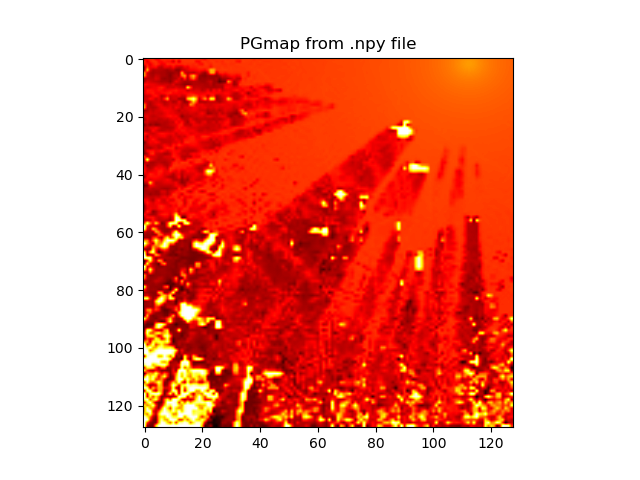

(-0.5, 127.5, 127.5, -0.5)

In [3]:
# testing PGmap
data = np.load('Training_data/PGmap/PGmap31_1.npy')
print(data.shape)
plt.clf()

plt.imshow(data, cmap='hot', interpolation='bilinear')
plt.title('PGmap from .npy file')
plt.show()
plt.colorbar()
plt.axis('off')
# plt.savefig('Sparse_SSmap_test.png', bbox_inches='tight')

(128, 128)


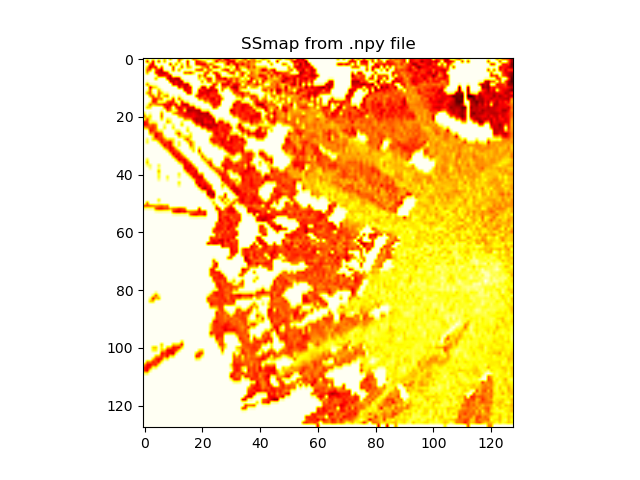

(-0.5, 127.5, 127.5, -0.5)

In [4]:
# testing SSmap
data = np.load('Training_data/SSmap/SSmap10_480_0.npy')
print(data.shape)
plt.clf()

plt.imshow(data, cmap='hot', interpolation='bilinear')
plt.title('SSmap from .npy file')
plt.show()
plt.colorbar()
plt.axis('off')
# plt.savefig('Sparse_SSmap_test.png', bbox_inches='tight')

(128, 128)


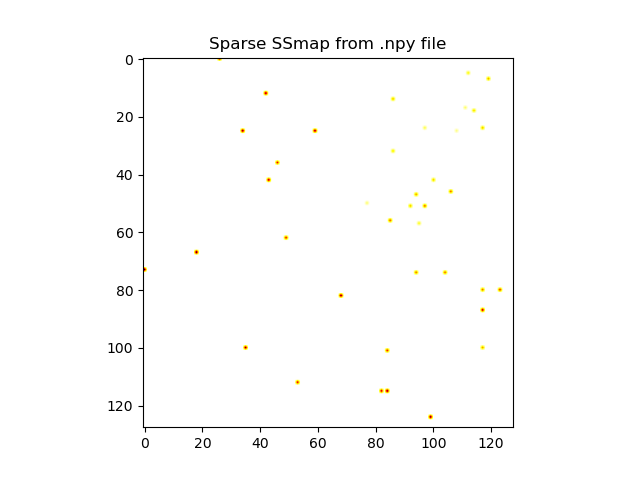

(-0.5, 127.5, 127.5, -0.5)

In [8]:
# testing Sparse SSmap
data = np.load('Training_data/Sparse_SSmap/Sparse_SSmap1_0_0.npy')
print(data.shape)

plt.clf()

plt.imshow(data, cmap='hot', interpolation='bilinear')
plt.title('Sparse SSmap from .npy file')
plt.show()
plt.colorbar()
plt.axis('off')
# plt.savefig('Sparse_SSmap_test.png', bbox_inches='tight')

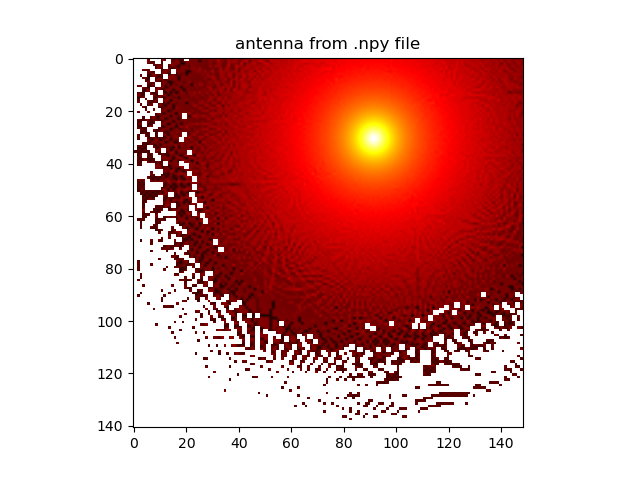

(-0.5, 148.5, 140.5, -0.5)

In [3]:
# testing Sparse SSmap
data = np.load('auto_generated_data/antenna/antenna10_100.npy')

plt.clf()

plt.imshow(data, cmap='hot', interpolation='bilinear')
plt.title('antenna from .npy file')
plt.show()
plt.colorbar()
plt.axis('off')
# plt.savefig('Sparse_SSmap_test.png', bbox_inches='tight')

(128, 128)


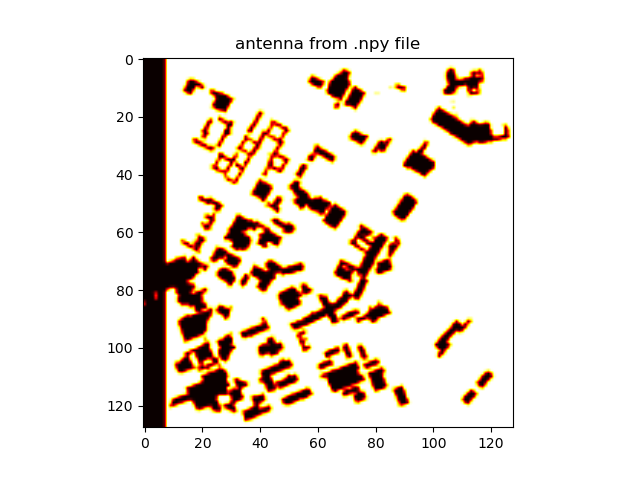

(-0.5, 127.5, 127.5, -0.5)

In [9]:
# testing Building map
data = np.load('Training_data/Building/building10_100.npy')
print(data.shape)

plt.clf()

plt.imshow(data, cmap='hot', interpolation='bilinear')
plt.title('antenna from .npy file')
plt.show()
plt.colorbar()
plt.axis('off')
# plt.savefig('Sparse_SSmap_test.png', bbox_inches='tight')